In [142]:
# preparacion del dataset por dia del ultimo año

In [804]:
# Load data using read_excel
from pandas import read_csv, read_excel, date_range, RangeIndex, DataFrame, to_datetime, Grouper, concat, DatetimeIndex
from pandas.plotting import lag_plot, scatter_matrix, autocorrelation_plot
from datetime import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from fbprophet import Prophet

In [144]:
dataset_df = read_excel('Cuenta_124075.xlsx', sheet_name='_select_TRANSACTION_DATE_cast_a')

In [145]:
dataset_df

,TRANSACTION_DATE,AMOUNT,CATEGORY_ID,CATEGORY_NAME,CATEGORY_IS_FINANCIAL,CATEGORY_IS_TRANSFER,Unnamed: 6,ID,BALANCE,BALANCE_DATE
0,2021-02-09,-120.00,115.0,category.deportes_115,False,False,NaN,124075.0,650.59,2021-02-09
1,2021-02-09,-21.00,330.0,category.cuota_330,False,False,NaN,NaN,NaN,NaT
2,2021-02-09,-35.00,330.0,category.cuota_330,False,False,NaN,NaN,NaN,NaT
3,2021-02-09,-61.80,330.0,category.cuota_330,False,False,NaN,NaN,NaN,NaT
4,2021-02-08,-300.00,461.0,category.movimiento_efectivo_461,True,False,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...
5341,2014-03-03,-123.00,330.0,category.cuota_330,False,False,NaN,NaN,NaN,NaT
5342,2014-03-03,-123.00,330.0,category.cuota_330,False,False,NaN,NaN,NaN,NaT
5343,2014-03-03,-137.04,330.0,category.cuota_330,False,False,NaN,NaN,NaN,NaT
5344,2014-03-03,-73.80,330.0,category.cuota_330,False,False,NaN,NaN,NaN,NaT


In [146]:
type(dataset_df)

pandas.core.frame.DataFrame

In [147]:
dataset_df = dataset_df.iloc[:,0:2]

In [148]:
dataset_df

,TRANSACTION_DATE,AMOUNT
0,2021-02-09,-120.00
1,2021-02-09,-21.00
2,2021-02-09,-35.00
3,2021-02-09,-61.80
4,2021-02-08,-300.00
...,...,...
5341,2014-03-03,-123.00
5342,2014-03-03,-123.00
5343,2014-03-03,-137.04
5344,2014-03-03,-73.80


In [149]:
# agregamos las transacciones por dia

In [150]:
dataset_df=dataset_df.groupby(dataset_df.TRANSACTION_DATE).sum()

In [151]:
dataset_df

,AMOUNT
TRANSACTION_DATE,
2014-03-03,32297.41
2014-03-04,-70.00
2014-03-05,-21.00
2014-03-07,-40.00
2014-03-11,-1368.75
...,...
2021-02-03,-119.00
2021-02-04,-565.11
2021-02-05,-450.86


In [152]:
dataset_df.reset_index(level=0, inplace=True)

In [153]:
dataset_df

,TRANSACTION_DATE,AMOUNT
0,2014-03-03,32297.41
1,2014-03-04,-70.00
2,2014-03-05,-21.00
3,2014-03-07,-40.00
4,2014-03-11,-1368.75
...,...,...
1447,2021-02-03,-119.00
1448,2021-02-04,-565.11
1449,2021-02-05,-450.86
1450,2021-02-08,-306.00


In [154]:
dataset_df.TRANSACTION_DATE.min(), dataset_df.TRANSACTION_DATE.max()

(Timestamp('2014-03-03 00:00:00'), Timestamp('2021-02-09 00:00:00'))

In [155]:
range_of_dates = date_range(start=dataset_df.TRANSACTION_DATE.min(), end=dataset_df.TRANSACTION_DATE.max())

In [156]:
range_of_dates

DatetimeIndex(['2014-03-03', '2014-03-04', '2014-03-05', '2014-03-06',
               '2014-03-07', '2014-03-08', '2014-03-09', '2014-03-10',
               '2014-03-11', '2014-03-12',
               ...
               '2021-01-31', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07',
               '2021-02-08', '2021-02-09'],
              dtype='datetime64[ns]', length=2536, freq='D')

In [157]:
# rellenamos los dias sin transacciones con el valor 0.00

In [158]:
dataset_df = dataset_df.set_index('TRANSACTION_DATE').reindex(range_of_dates).fillna(0.0).rename_axis('TRANSACTION_DATE').reset_index()

In [159]:
dataset_df

,TRANSACTION_DATE,AMOUNT
0,2014-03-03,32297.41
1,2014-03-04,-70.00
2,2014-03-05,-21.00
3,2014-03-06,0.00
4,2014-03-07,-40.00
...,...,...
2531,2021-02-05,-450.86
2532,2021-02-06,0.00
2533,2021-02-07,0.00
2534,2021-02-08,-306.00


In [160]:
dataset_df=dataset_df.set_index(dataset_df.iloc[:,0])

In [161]:
dataset_df

,TRANSACTION_DATE,AMOUNT
TRANSACTION_DATE,,
2014-03-03,2014-03-03,32297.41
2014-03-04,2014-03-04,-70.00
2014-03-05,2014-03-05,-21.00
2014-03-06,2014-03-06,0.00
2014-03-07,2014-03-07,-40.00
...,...,...
2021-02-05,2021-02-05,-450.86
2021-02-06,2021-02-06,0.00
2021-02-07,2021-02-07,0.00


In [162]:
dataset_df=dataset_df.drop(['TRANSACTION_DATE'], axis = 1)

In [163]:
dataset_df

,AMOUNT
TRANSACTION_DATE,
2014-03-03,32297.41
2014-03-04,-70.00
2014-03-05,-21.00
2014-03-06,0.00
2014-03-07,-40.00
...,...
2021-02-05,-450.86
2021-02-06,0.00
2021-02-07,0.00


In [164]:
dataset_df.size

2536

In [165]:
dataset_df.shape

(2536, 1)

In [166]:
dataset_ser = dataset_df.T.squeeze()

In [167]:
dataset_ser

TRANSACTION_DATE
2014-03-03    32297.41
2014-03-04      -70.00
2014-03-05      -21.00
2014-03-06        0.00
2014-03-07      -40.00
                ...   
2021-02-05     -450.86
2021-02-06        0.00
2021-02-07        0.00
2021-02-08     -306.00
2021-02-09     -237.80
Name: AMOUNT, Length: 2536, dtype: float64

In [168]:
type(dataset_ser)

pandas.core.series.Series

In [169]:
dataset_df = DataFrame(dataset_ser)

In [170]:
dataset_df

,AMOUNT
TRANSACTION_DATE,
2014-03-03,32297.41
2014-03-04,-70.00
2014-03-05,-21.00
2014-03-06,0.00
2014-03-07,-40.00
...,...
2021-02-05,-450.86
2021-02-06,0.00
2021-02-07,0.00


In [171]:
dataset_ser.describe()

count      2536.000000
mean         -9.495524
std        7789.229290
min     -170535.540000
25%        -307.125000
50%           0.000000
75%           0.000000
max      221251.090000
Name: AMOUNT, dtype: float64

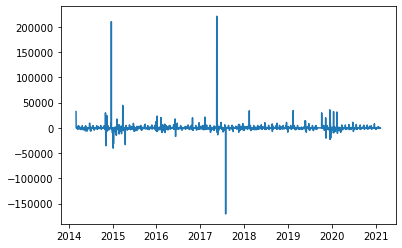

In [172]:
pyplot.plot(dataset_ser)
pyplot.show()

In [173]:
# nos quedamos con el dataset del ultimo año

In [174]:
dataset_last_year_ser = dataset_ser.truncate('2020-02-10', '2021-02-09', copy = False)

In [175]:
del(dataset_ser)

In [176]:
del(dataset_df)

In [177]:
# Lesson 02: Load Time Series Data

In [178]:
# How to Load and Explore Time Series Data in Python
# https://machinelearningmastery.com/load-explore-time-series-data-python/

In [179]:
# Load Time Series Data

In [180]:
# Exploring Time Series Data

In [181]:
# Peek at the Data

In [182]:
dataset_last_year_ser

TRANSACTION_DATE
2020-02-10     -384.64
2020-02-11        0.00
2020-02-12     -919.32
2020-02-13    31462.40
2020-02-14      361.79
                ...   
2021-02-05     -450.86
2021-02-06        0.00
2021-02-07        0.00
2021-02-08     -306.00
2021-02-09     -237.80
Name: AMOUNT, Length: 366, dtype: float64

In [183]:
# Number of Observations

In [184]:
dataset_last_year_ser.size

366

In [185]:
# Querying By Time

In [186]:
dataset_last_year_ser['2020-02']

TRANSACTION_DATE
2020-02-10     -384.64
2020-02-11        0.00
2020-02-12     -919.32
2020-02-13    31462.40
2020-02-14      361.79
2020-02-15        0.00
2020-02-16        0.00
2020-02-17   -10785.10
2020-02-18        0.00
2020-02-19        0.00
2020-02-20        0.00
2020-02-21        0.00
2020-02-22        0.00
2020-02-23        0.00
2020-02-24     1475.11
2020-02-25        0.00
2020-02-26       -3.65
2020-02-27        0.00
2020-02-28     -642.77
2020-02-29        0.00
Name: AMOUNT, dtype: float64

In [187]:
dataset_last_year_ser.shape

(366,)

In [188]:
# Descriptive Statistics

In [189]:
dataset_last_year_ser.describe()

count      366.000000
mean      -105.201339
std       2360.819422
min     -10785.100000
25%       -298.830000
50%          0.000000
75%          0.000000
max      31462.400000
Name: AMOUNT, dtype: float64

In [190]:
# Plotting Time Series

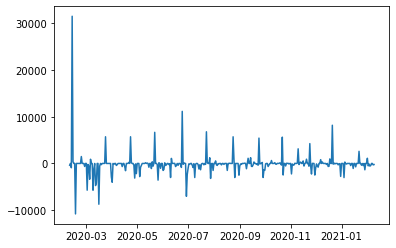

In [191]:
pyplot.plot(dataset_last_year_ser)
pyplot.show()

In [192]:
# Lesson 03: Data Visualization

In [193]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [194]:
# Time Series Visualization

In [195]:
# Minimum Daily Temperatures Dataset

In [196]:
dataset_last_year_ser

TRANSACTION_DATE
2020-02-10     -384.64
2020-02-11        0.00
2020-02-12     -919.32
2020-02-13    31462.40
2020-02-14      361.79
                ...   
2021-02-05     -450.86
2021-02-06        0.00
2021-02-07        0.00
2021-02-08     -306.00
2021-02-09     -237.80
Name: AMOUNT, Length: 366, dtype: float64

In [197]:
# 1. Time Series Line Plot

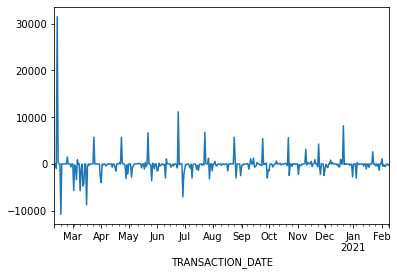

In [198]:
dataset_last_year_ser.plot()
pyplot.show()

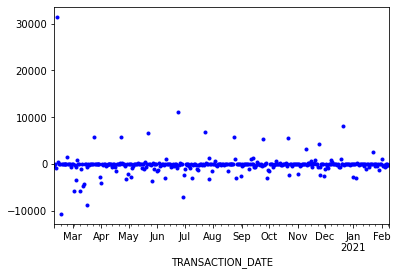

In [199]:
dataset_last_year_ser.plot(style='b.')
pyplot.show()

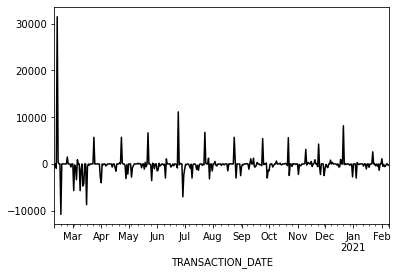

In [200]:
dataset_last_year_ser.plot(style='k-')
pyplot.show()

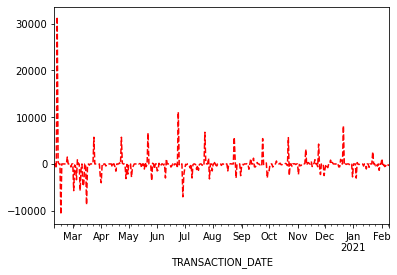

In [201]:
dataset_last_year_ser.plot(style='r--')
pyplot.show()

In [202]:
# 2. Time Series Histogram and Density Plots

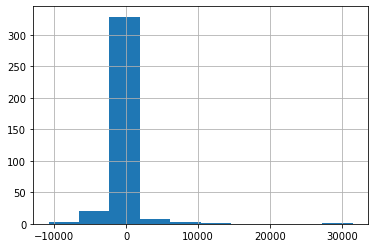

In [203]:
dataset_last_year_ser.hist()
pyplot.show()

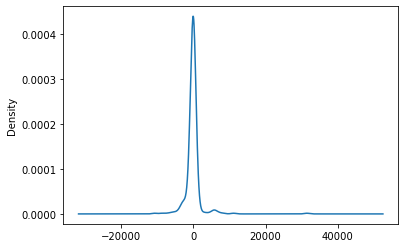

In [204]:
dataset_last_year_ser.plot(kind='kde')
pyplot.show()

In [205]:
# 3. Time Series Box and Whisker Plots by Interval

In [206]:
dataset_last_year_df=DataFrame(dataset_last_year_ser)

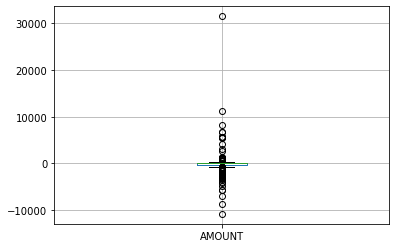

In [207]:
dataset_last_year_df.boxplot()
pyplot.show()

In [208]:
dataset_last_year_ser.describe()

count      366.000000
mean      -105.201339
std       2360.819422
min     -10785.100000
25%       -298.830000
50%          0.000000
75%          0.000000
max      31462.400000
Name: AMOUNT, dtype: float64

In [209]:
# 4. Time Series Heat Maps

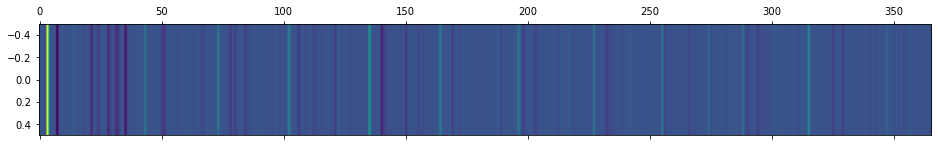

In [210]:
pyplot.matshow(dataset_last_year_df.T, interpolation=None, aspect='auto')
pyplot.show()

In [211]:
"""
podemos ver que hay cierta estacionalidad en las transacciones en las lineas amarillas y azules oscuras
"""

'\npodemos ver que hay cierta estacionalidad en las transacciones en las lineas amarillas y azules oscuras\n'

In [212]:
# 5. Time Series Lag Scatter Plots

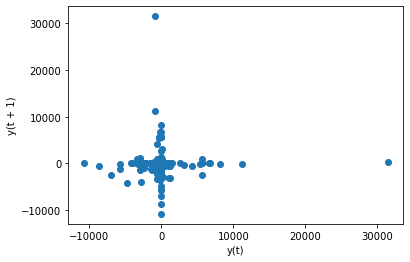

In [213]:
# create a scatter plot
lag_plot(dataset_last_year_ser)
pyplot.show()

In [214]:
"""no hay correlacion entre y(t+1) e y(t)"""

'no hay correlacion entre y(t+1) e y(t)'

In [215]:
"""
Ahora vamos a hacer lagplots entre y(t+1) y sus 60 lags anteriores hasta y(t-60)
"""

'\nAhora vamos a hacer lagplots entre y(t+1) y sus 60 lags anteriores hasta y(t-60)\n'

t+1 vs t-1


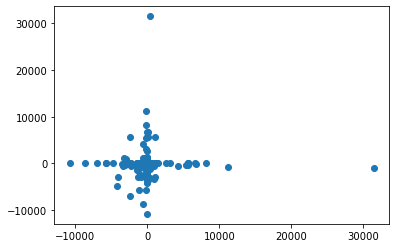

t+1 vs t-2


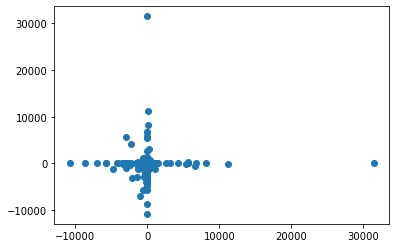

t+1 vs t-3


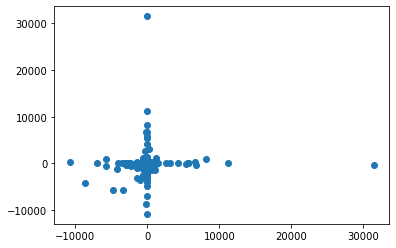

t+1 vs t-4


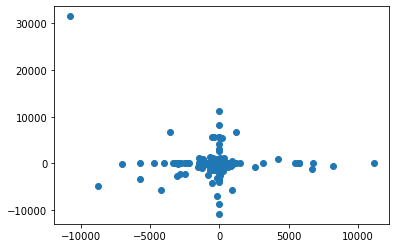

t+1 vs t-5


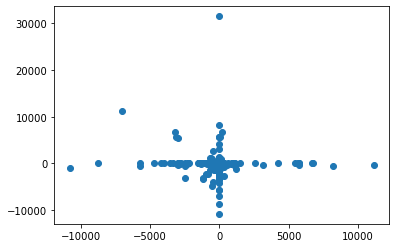

t+1 vs t-6


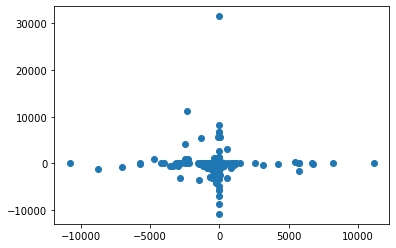

t+1 vs t-7


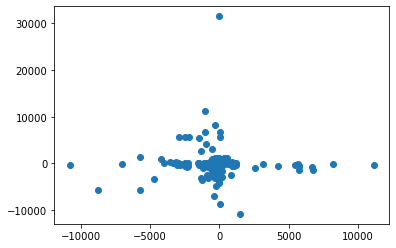

t+1 vs t-8


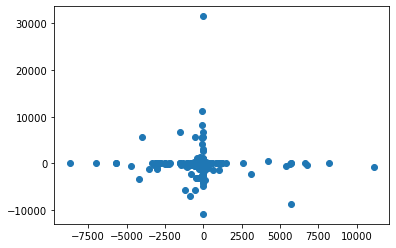

t+1 vs t-9


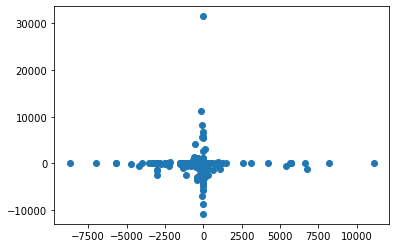

t+1 vs t-10


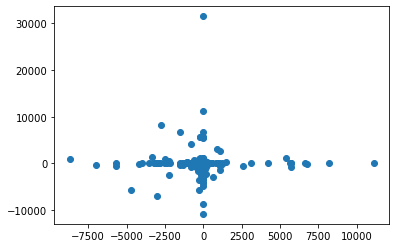

t+1 vs t-11


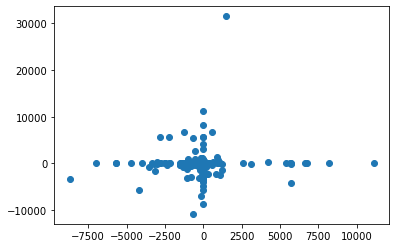

t+1 vs t-12


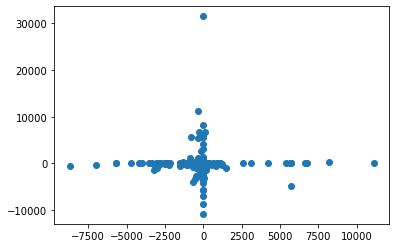

t+1 vs t-13


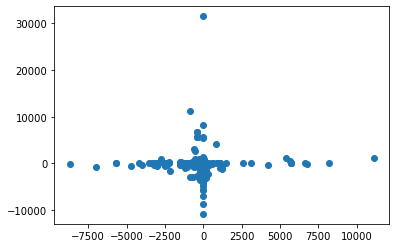

t+1 vs t-14


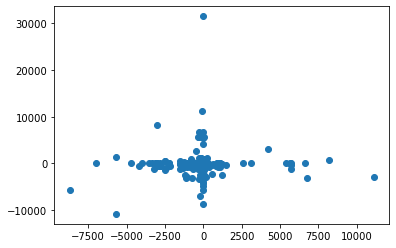

t+1 vs t-15


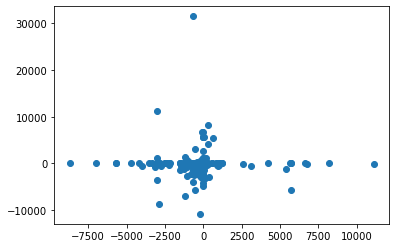

t+1 vs t-16


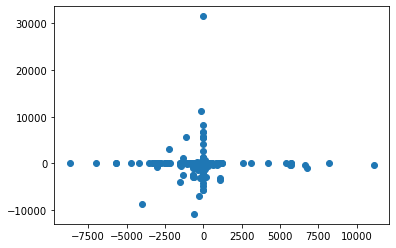

t+1 vs t-17


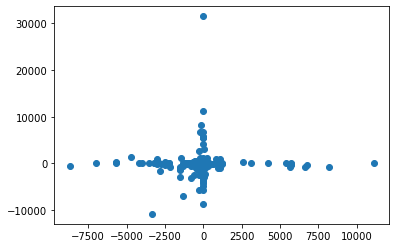

t+1 vs t-18


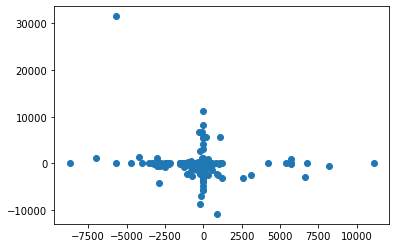

t+1 vs t-19


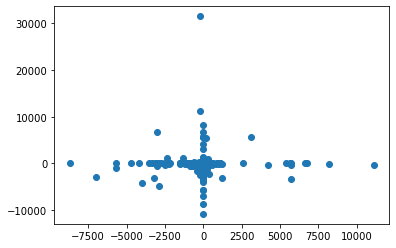

t+1 vs t-20


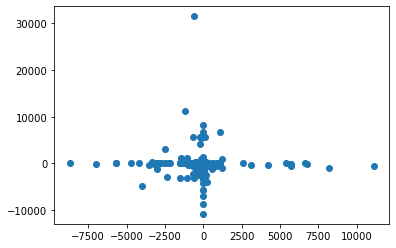

t+1 vs t-21


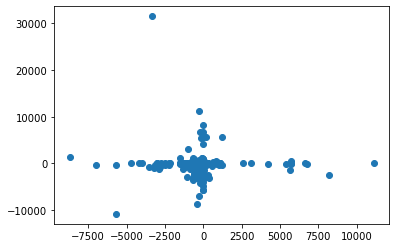

t+1 vs t-22


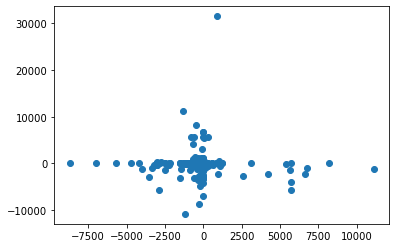

t+1 vs t-23


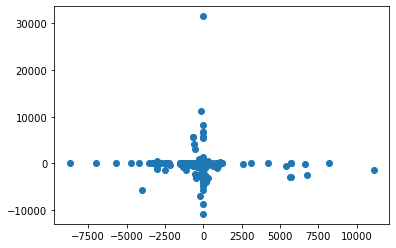

t+1 vs t-24


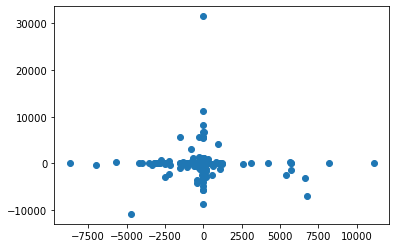

t+1 vs t-25


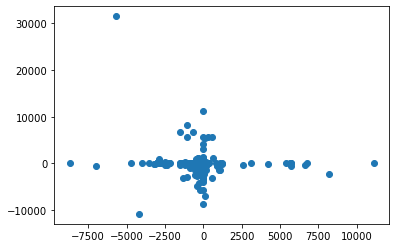

t+1 vs t-26


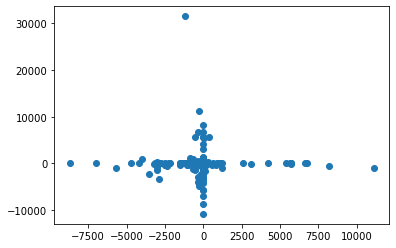

t+1 vs t-27


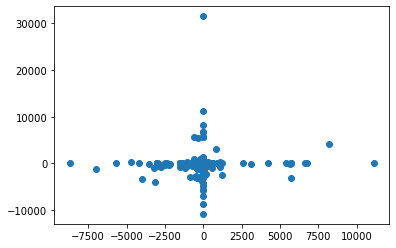

t+1 vs t-28


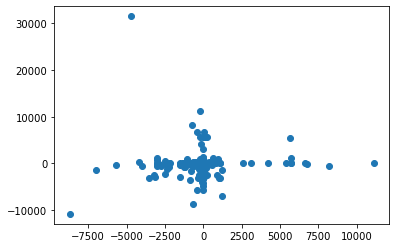

t+1 vs t-29


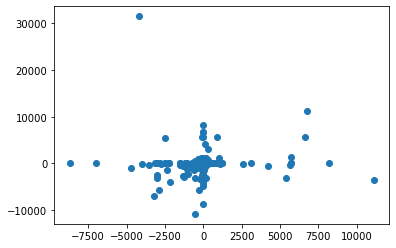

t+1 vs t-30


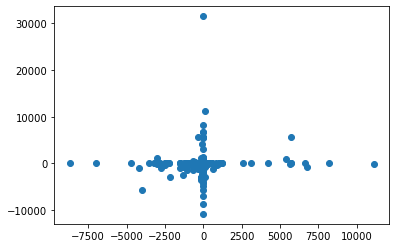

t+1 vs t-31


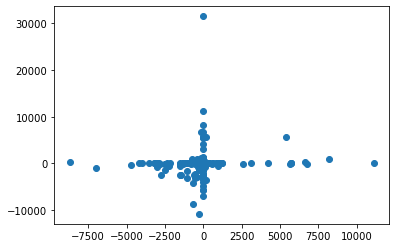

t+1 vs t-32


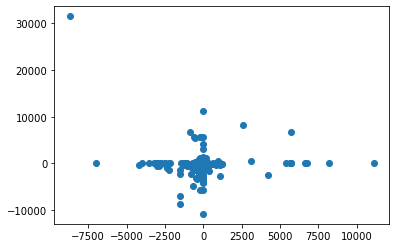

t+1 vs t-33


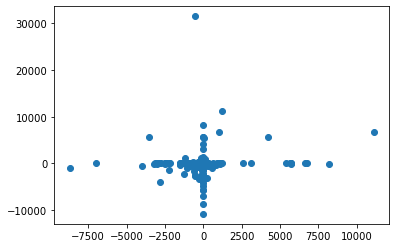

t+1 vs t-34


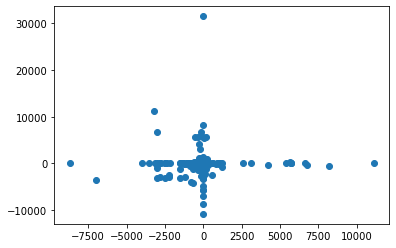

t+1 vs t-35


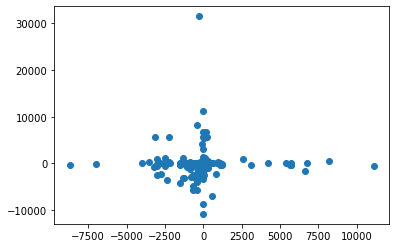

t+1 vs t-36


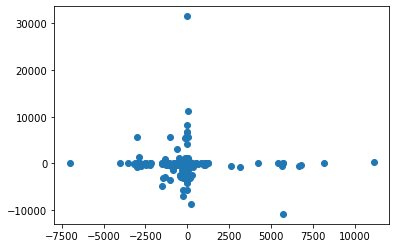

t+1 vs t-37


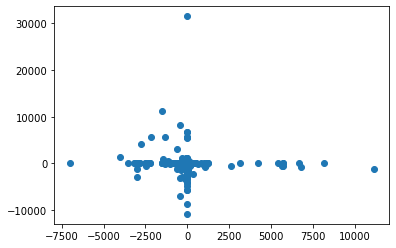

t+1 vs t-38


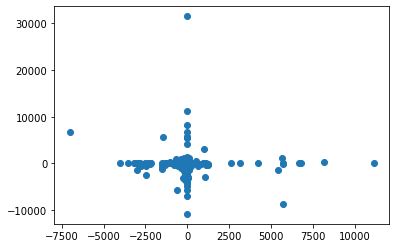

t+1 vs t-39


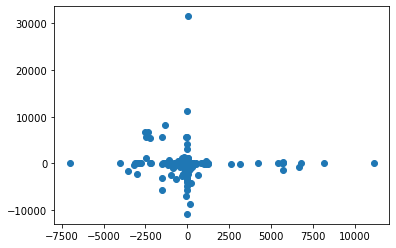

t+1 vs t-40


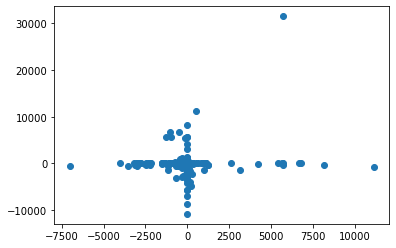

t+1 vs t-41


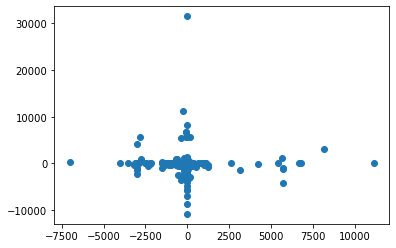

t+1 vs t-42


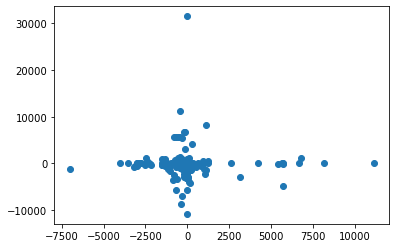

t+1 vs t-43


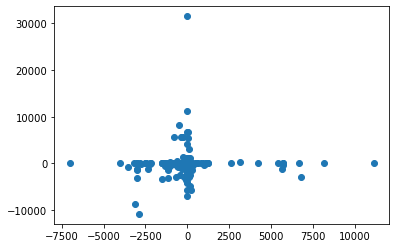

t+1 vs t-44


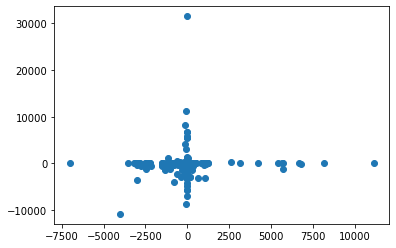

t+1 vs t-45


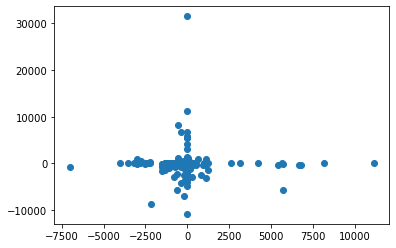

t+1 vs t-46


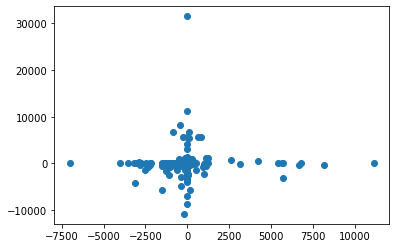

t+1 vs t-47


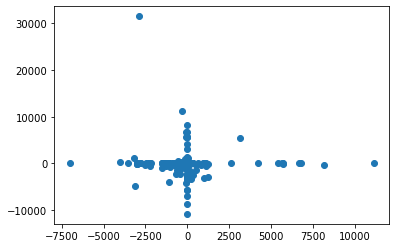

t+1 vs t-48


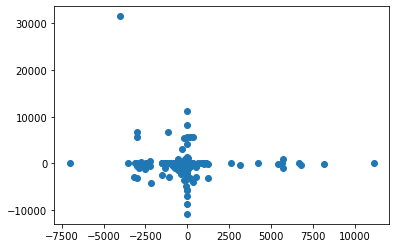

t+1 vs t-49


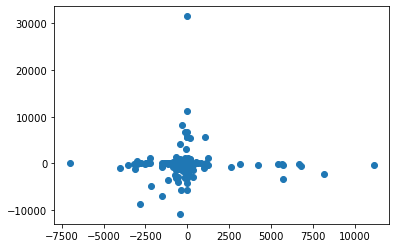

t+1 vs t-50


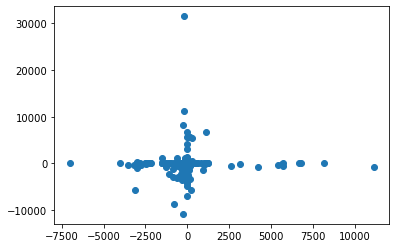

t+1 vs t-51


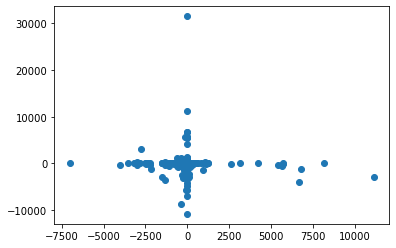

t+1 vs t-52


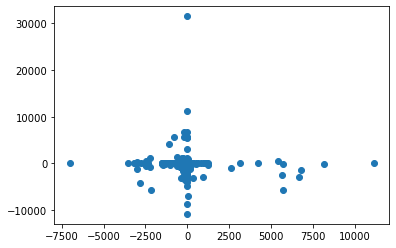

t+1 vs t-53


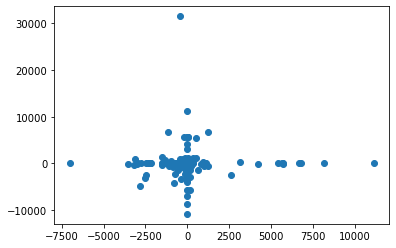

t+1 vs t-54


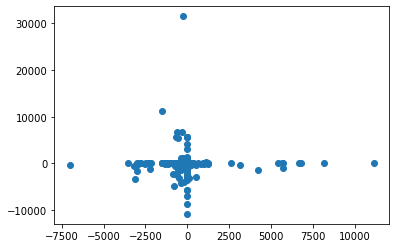

t+1 vs t-55


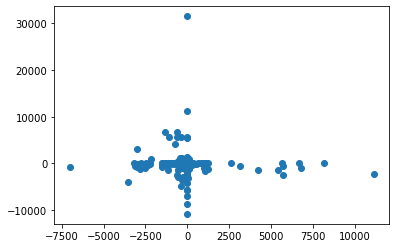

t+1 vs t-56


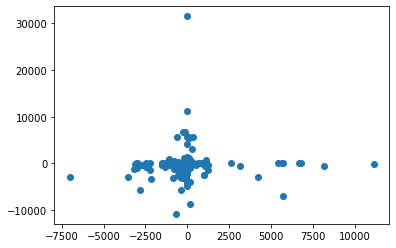

t+1 vs t-57


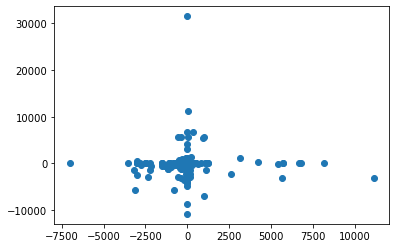

t+1 vs t-58


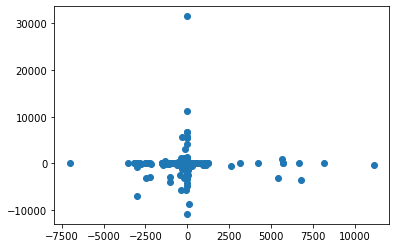

t+1 vs t-59


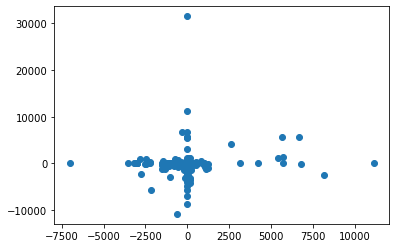

t+1 vs t-60


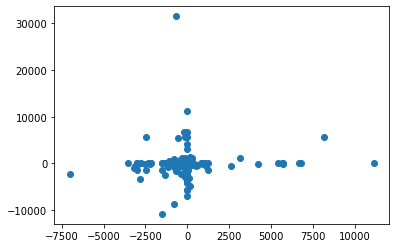

In [216]:
values = DataFrame(dataset_last_year_ser.values)
lags = 60
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
for i in range(1,(lags + 1)):
	print('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
	pyplot.show()

In [217]:
"""
Vemos que no hay correlacion entre una observacion y la misma hasta en 60 instantes anteriores teniendo todos los lag scatter
plots formas muy parecidas que no se parecen a una diagonal.
"""

'\nVemos que no hay correlacion entre una observacion y la misma hasta en 60 instantes anteriores teniendo todos los lag scatter\nplots formas muy parecidas que no se parecen a una diagonal.\n'

In [218]:
# 6. Time Series Autocorrelation Plots

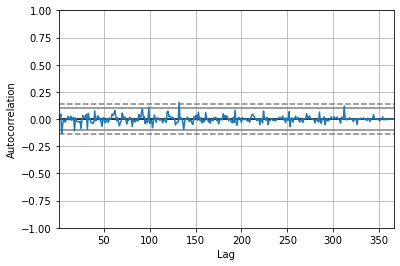

In [219]:
# create an autocorrelation plot
autocorrelation_plot(dataset_last_year_ser)
pyplot.show()

In [220]:
"""
Vamos que no hay correlacion estadisticamente significativa entre y(t+1) y sus 366 lags anteriores (valores dentro de la linea
de puntos y la linea continua) luego la serie temporal de las transacciones durante el ultimo año es inmodelizable.
"""

'\nVamos que no hay correlacion estadisticamente significativa entre y(t+1) y sus 366 lags anteriores (valores dentro de la linea\nde puntos y la linea continua) luego la serie temporal de las transacciones durante el ultimo año es inmodelizable.\n'

In [221]:
dataset_last_year_ser

TRANSACTION_DATE
2020-02-10     -384.64
2020-02-11        0.00
2020-02-12     -919.32
2020-02-13    31462.40
2020-02-14      361.79
                ...   
2021-02-05     -450.86
2021-02-06        0.00
2021-02-07        0.00
2021-02-08     -306.00
2021-02-09     -237.80
Name: AMOUNT, Length: 366, dtype: float64

In [222]:
dataset_last_year_df

,AMOUNT
TRANSACTION_DATE,
2020-02-10,-384.64
2020-02-11,0.00
2020-02-12,-919.32
2020-02-13,31462.40
2020-02-14,361.79
...,...
2021-02-05,-450.86
2021-02-06,0.00
2021-02-07,0.00


In [223]:
"""
nos guardamos este dataframe en un csv antes de continuar
"""

'\nnos guardamos este dataframe en un csv antes de continuar\n'

In [224]:
dataset_last_year_df.to_csv(path_or_buf='transactions_last_year.csv')

In [225]:
"""
a continuacion con el dataset anterior vamos a crear un dataset del balance de la cuenta sobre la que haremos un estudio 
estadisitico y aplicaremos la libreria prophet de facebook a ver si podemos sacar predicciones de la serie temporal a 3 meses
primero por dias y luego por semanas
"""

'\na continuacion con el dataset anterior vamos a crear un dataset del balance de la cuenta sobre la que haremos un estudio \nestadisitico y aplicaremos la libreria prophet de facebook a ver si podemos sacar predicciones de la serie temporal a 3 meses\nprimero por dias y luego por semanas\n'

In [226]:
del(dataset_last_year_df)
del(dataset_last_year_ser)

In [227]:
transactions_last_year_ser = read_csv('transactions_last_year.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [228]:
transactions_last_year_ser

TRANSACTION_DATE
2020-02-10     -384.64
2020-02-11        0.00
2020-02-12     -919.32
2020-02-13    31462.40
2020-02-14      361.79
                ...   
2021-02-05     -450.86
2021-02-06        0.00
2021-02-07        0.00
2021-02-08     -306.00
2021-02-09     -237.80
Name: AMOUNT, Length: 366, dtype: float64

In [229]:
transactions_last_year_df=DataFrame(transactions_last_year_ser)

In [230]:
transactions_last_year_df

,AMOUNT
TRANSACTION_DATE,
2020-02-10,-384.64
2020-02-11,0.00
2020-02-12,-919.32
2020-02-13,31462.40
2020-02-14,361.79
...,...
2021-02-05,-450.86
2021-02-06,0.00
2021-02-07,0.00


In [231]:
transactions_last_year_df.reset_index(level=0, inplace=True)

In [232]:
transactions_last_year_df

,TRANSACTION_DATE,AMOUNT
0,2020-02-10,-384.64
1,2020-02-11,0.00
2,2020-02-12,-919.32
3,2020-02-13,31462.40
4,2020-02-14,361.79
...,...,...
361,2021-02-05,-450.86
362,2021-02-06,0.00
363,2021-02-07,0.00
364,2021-02-08,-306.00


In [233]:
transactions_last_year_df["DATE"]=transactions_last_year_df["TRANSACTION_DATE"]

In [234]:
transactions_last_year_df

,TRANSACTION_DATE,AMOUNT,DATE
0,2020-02-10,-384.64,2020-02-10
1,2020-02-11,0.00,2020-02-11
2,2020-02-12,-919.32,2020-02-12
3,2020-02-13,31462.40,2020-02-13
4,2020-02-14,361.79,2020-02-14
...,...,...,...
361,2021-02-05,-450.86,2021-02-05
362,2021-02-06,0.00,2021-02-06
363,2021-02-07,0.00,2021-02-07
364,2021-02-08,-306.00,2021-02-08


In [235]:
transactions_last_year_df["BALANCE"]=0

In [236]:
transactions_last_year_df

,TRANSACTION_DATE,AMOUNT,DATE,BALANCE
0,2020-02-10,-384.64,2020-02-10,0
1,2020-02-11,0.00,2020-02-11,0
2,2020-02-12,-919.32,2020-02-12,0
3,2020-02-13,31462.40,2020-02-13,0
4,2020-02-14,361.79,2020-02-14,0
...,...,...,...,...
361,2021-02-05,-450.86,2021-02-05,0
362,2021-02-06,0.00,2021-02-06,0
363,2021-02-07,0.00,2021-02-07,0
364,2021-02-08,-306.00,2021-02-08,0


In [237]:
"""
asumo que la cuenta el 2020-02-10 tiene un balance inicial de cero euros que luego corregire con el balance de
650.59 eur el 2021-02-09 para corregir con ese valor en el dataset del balance que voy a usar para estimar su serie temporal.
"""

'\nasumo que la cuenta el 2020-02-10 tiene un balance inicial de cero euros que luego corregire con el balance de\n650.59 eur el 2021-02-09 para corregir con ese valor en el dataset del balance que voy a usar para estimar su serie temporal.\n'

In [238]:
for i in range(transactions_last_year_df.index[0],transactions_last_year_df.index[-1]):
    transactions_last_year_df.loc[i+1,'BALANCE'] = transactions_last_year_df.loc[i,'BALANCE'] + \
    transactions_last_year_df.loc[i,'AMOUNT']

In [239]:
transactions_last_year_df

,TRANSACTION_DATE,AMOUNT,DATE,BALANCE
0,2020-02-10,-384.64,2020-02-10,0.00
1,2020-02-11,0.00,2020-02-11,-384.64
2,2020-02-12,-919.32,2020-02-12,-384.64
3,2020-02-13,31462.40,2020-02-13,-1303.96
4,2020-02-14,361.79,2020-02-14,30158.44
...,...,...,...,...
361,2021-02-05,-450.86,2021-02-05,-37509.03
362,2021-02-06,0.00,2021-02-06,-37959.89
363,2021-02-07,0.00,2021-02-07,-37959.89
364,2021-02-08,-306.00,2021-02-08,-37959.89


In [240]:
transactions_last_year_df=transactions_last_year_df.drop(['TRANSACTION_DATE','AMOUNT'], axis = 1)

In [241]:
transactions_last_year_df

,DATE,BALANCE
0,2020-02-10,0.00
1,2020-02-11,-384.64
2,2020-02-12,-384.64
3,2020-02-13,-1303.96
4,2020-02-14,30158.44
...,...,...
361,2021-02-05,-37509.03
362,2021-02-06,-37959.89
363,2021-02-07,-37959.89
364,2021-02-08,-37959.89


In [243]:
balance_last_year_df=transactions_last_year_df

In [244]:
del(transactions_last_year_df)

In [246]:
del(transactions_last_year_ser)

In [247]:
balance_last_year_df

,DATE,BALANCE
0,2020-02-10,0.00
1,2020-02-11,-384.64
2,2020-02-12,-384.64
3,2020-02-13,-1303.96
4,2020-02-14,30158.44
...,...,...
361,2021-02-05,-37509.03
362,2021-02-06,-37959.89
363,2021-02-07,-37959.89
364,2021-02-08,-37959.89


In [248]:
balance_last_year_df=balance_last_year_df.set_index(balance_last_year_df.iloc[:,0])

In [249]:
balance_last_year_df

,DATE,BALANCE
DATE,,
2020-02-10,2020-02-10,0.00
2020-02-11,2020-02-11,-384.64
2020-02-12,2020-02-12,-384.64
2020-02-13,2020-02-13,-1303.96
2020-02-14,2020-02-14,30158.44
...,...,...
2021-02-05,2021-02-05,-37509.03
2021-02-06,2021-02-06,-37959.89
2021-02-07,2021-02-07,-37959.89


In [250]:
balance_last_year_df=balance_last_year_df.drop(['DATE'], axis = 1)

In [251]:
balance_last_year_df

,BALANCE
DATE,
2020-02-10,0.00
2020-02-11,-384.64
2020-02-12,-384.64
2020-02-13,-1303.96
2020-02-14,30158.44
...,...
2021-02-05,-37509.03
2021-02-06,-37959.89
2021-02-07,-37959.89


In [253]:
bias = (-38265.89 - 650.59)*(-1)

In [254]:
bias

38916.479999999996

In [255]:
"""
de acuerdo al excel 'Cuenta_124075.xlsx' el 2021-02-09 la cuenta tenia 650.59 eur luego a los -38265.89 eur que ahora tiene el 
dataframe el 2021-02-09 tengo que sumar bias = 38916.48 eur para obtener 650.59 eur ese dia.
Y esa operacion la tengo que hacer en la columna balance para todas sus filas.
"""

"\nde acuerdo al excel 'Cuenta_124075.xlsx' el 2021-02-09 la cuenta tenia 650.59 eur luego a los -38265.89 eur que ahora tiene el \ndataframe el 2021-02-09 tengo que sumar bias = 38916.48 eur para obtener 650.59 eur ese dia.\nY esa operacion la tengo que hacer en la columna balance para todas sus filas.\n"

In [256]:
balance_last_year_df['BALANCE'] = balance_last_year_df['BALANCE'] + bias

In [257]:
balance_last_year_df

,BALANCE
DATE,
2020-02-10,38916.48
2020-02-11,38531.84
2020-02-12,38531.84
2020-02-13,37612.52
2020-02-14,69074.92
...,...
2021-02-05,1407.45
2021-02-06,956.59
2021-02-07,956.59


In [258]:
del(bias)

In [260]:
# me voy a guardar este dataframe en un csv

In [262]:
balance_last_year_df.to_csv(path_or_buf='balance_last_year.csv')

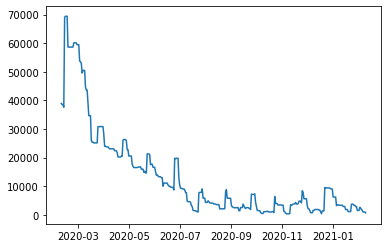

In [263]:
pyplot.plot(balance_last_year_df)
pyplot.show()

In [265]:
"""
vemos q hay 2 trends muy claros. uno de bajada hasta 2020-08 y otro plano desde 2020-08 hasta 2021-01.
Además apreciamos una estacionalidad muy clara en esta serie.
"""

'\nvemos q hay 2 trends muy claros. uno de bajada hasta 2020-08 y otro plano desde 2020-08 hasta 2021-01.\nAdemás apreciamos una estacionalidad muy clara en esta serie.\n'

In [268]:
# Lesson 02: Load Time Series Data

In [269]:
# How to Load and Explore Time Series Data in Python
# https://machinelearningmastery.com/load-explore-time-series-data-python/

In [281]:
# Peek at the Data

In [282]:
balance_last_year_ser=balance_last_year_df.squeeze()

In [283]:
balance_last_year_ser

DATE
2020-02-10    38916.48
2020-02-11    38531.84
2020-02-12    38531.84
2020-02-13    37612.52
2020-02-14    69074.92
                ...   
2021-02-05     1407.45
2021-02-06      956.59
2021-02-07      956.59
2021-02-08      956.59
2021-02-09      650.59
Name: BALANCE, Length: 366, dtype: float64

In [284]:
# Number of Observations

In [285]:
balance_last_year_ser.size

366

In [286]:
# Descriptive Statistics

In [287]:
balance_last_year_ser.describe()

count      366.000000
mean     12979.771393
std      15683.453095
min        289.820000
25%       2494.010000
50%       5793.745000
75%      19747.200000
max      69436.710000
Name: BALANCE, dtype: float64

In [288]:
balance_last_year_df.describe()

,BALANCE
count,366.000000
mean,12979.771393
std,15683.453095
min,289.820000
25%,2494.010000
50%,5793.745000
75%,19747.200000
max,69436.710000


In [289]:
# Plotting Time Series

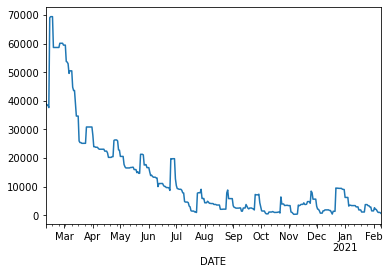

In [291]:
balance_last_year_ser.plot()
pyplot.show()

In [292]:
"""
A priori esta distribucion de datos parece más razonable y se puede parecer más a una distribución normal que es más 
fácilmente modelizable.
"""

'\nA priori esta distribucion de datos parece más razonable y se puede parecer más a una distribución normal que es más \nfácilmente modelizable.\n'

In [293]:
# Lesson 03: Data Visualization

In [294]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [295]:
# 1. Time Series Line Plot

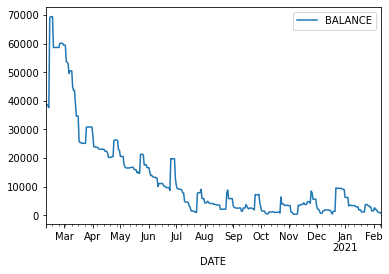

In [309]:
balance_last_year_df.plot()
pyplot.show()

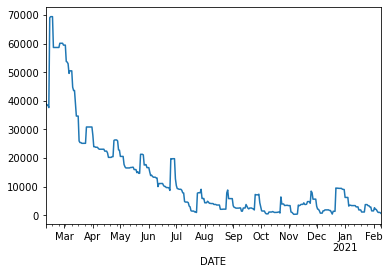

In [310]:
balance_last_year_ser.plot()
pyplot.show()

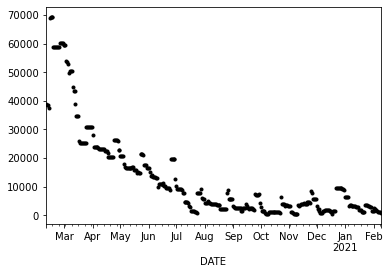

In [297]:
balance_last_year_ser.plot(style='.', color='black')
pyplot.show()

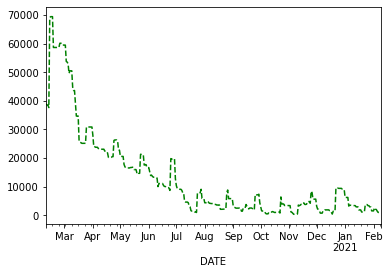

In [298]:
balance_last_year_ser.plot(style='--', color='green')
pyplot.show()

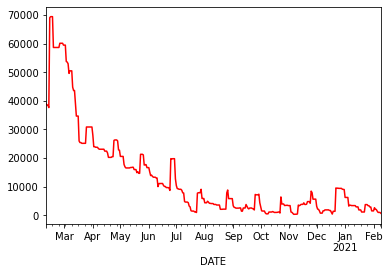

In [299]:
balance_last_year_ser.plot(style='-', color='red')
pyplot.show()

In [300]:
"""
Vemos q hay 2 trends muy claros. uno de bajada hasta 2020-08 y otro plano desde 2020-08 hasta 2021-01.
Además apreciamos una estacionalidad muy clara en esta serie.

A priori esta distribucion de datos parece más razonable y se puede parecer más a una distribución normal que es más 
fácilmente modelizable.
"""

'\nVemos q hay 2 trends muy claros. uno de bajada hasta 2020-08 y otro plano desde 2020-08 hasta 2021-01.\nAdemás apreciamos una estacionalidad muy clara en esta serie.\n\nA priori esta distribucion de datos parece más razonable y se puede parecer más a una distribución normal que es más \nfácilmente modelizable.\n'

In [301]:
# 2. Time Series Histogram and Density Plots

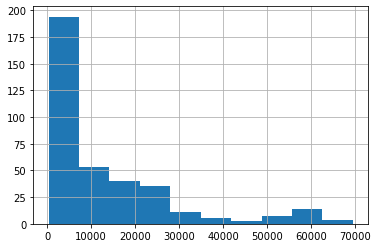

In [302]:
balance_last_year_ser.hist()
pyplot.show()

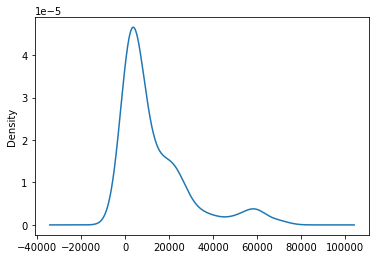

In [303]:
balance_last_year_ser.plot(kind='kde')
pyplot.show()

In [305]:
balance_last_year_ser.describe()

count      366.000000
mean     12979.771393
std      15683.453095
min        289.820000
25%       2494.010000
50%       5793.745000
75%      19747.200000
max      69436.710000
Name: BALANCE, dtype: float64

In [314]:
"""
Vemos que la distribucion es demasiado picuda para ser una gausiana y ademas es asimetrica a la derecha 
(50%: 5793 < mean: 12979) y con una larga cola a la derecha.

Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal
distribution). This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful
first check of the distribution of observations both on raw observations and after any type of data transform has been
performed.

Seeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution
is Gaussian and perhaps data preparation techniques to reshape the distribution, like the Box-Cox transform.

O quiza tambien se pueda hacer una power transform sobre los datos crei recordar en algun otro articulo anterior.
"""

'\nVemos que la distribucion es demasiado picuda para ser una gausiana y ademas es asimetrica a la derecha \n(50%: 5793 < mean: 12979) y con una larga cola a la derecha.\n\nSome linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal\ndistribution). This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful\nfirst check of the distribution of observations both on raw observations and after any type of data transform has been\nperformed.\n\nSeeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution\nis Gaussian and perhaps data preparation techniques to reshape the distribution, like the Box-Cox transform.\n\nO quiza tambien se pueda hacer una power transform sobre los datos crei recordar en algun otro articulo anterior.\n'

In [315]:
# 3. Time Series Box and Whisker Plots by Interval

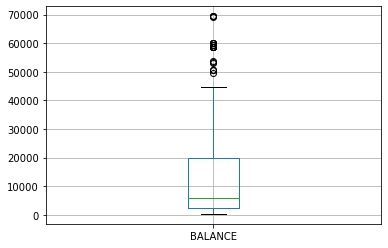

In [316]:
balance_last_year_df.boxplot()
pyplot.show()

In [317]:
balance_last_year_df.describe()

,BALANCE
count,366.000000
mean,12979.771393
std,15683.453095
min,289.820000
25%,2494.010000
50%,5793.745000
75%,19747.200000
max,69436.710000


In [318]:
"""
el boxplot indica una distribucion de datos bastante razonable y asimetrica a la derecha (hacia arriba, 
50%: 5793 < mean: 12979).
con rango intercuartilico [2494,19747] y con outliers a partir de 45000 eur q tampoco parecen muchos en comparacion con el
la cantidad del resto de valores de la distribucion.
CONCLUSION: podemos pensar q este dataset sera facilmente modelizable por prophet.
"""

'\nel boxplot indica una distribucion de datos bastante razonable y asimetrica a la derecha (hacia arriba, \n50%: 5793 < mean: 12979).\ncon rango intercuartilico [2494,19747] y con outliers a partir de 45000 eur q tampoco parecen muchos en comparacion con el\nla cantidad del resto de valores de la distribucion.\nCONCLUSION: podemos pensar q este dataset sera facilmente modelizable por prophet.\n'

In [321]:
"""
para sacar boxplots o lineplots o heatmaps por año-mes habria que:
- rellenar los dias q faltan del primer y ultimo mes con ceros --> pero eso alteraria la estadistica,
- quiza quitar el 29-02-2020 y poner su valor el 28-feb,
- quiza rellenar los valores de los meses q faltan con ceros --> pero eso alteraria la estadistica
"""

'\npara sacar boxplots o lineplots por mes habria que:\n- rellenar los dias q faltan del primer y ultimo mes con ceros --> pero eso alteraria la estadistica,\n- quiza quitar el 29-02-2020 y poner su valor el 28-feb,\n- quiza rellenar los valores de los meses q faltan con ceros --> pero eso alteraria la estadistica\n'

In [322]:
# 4. Time Series Heat Maps

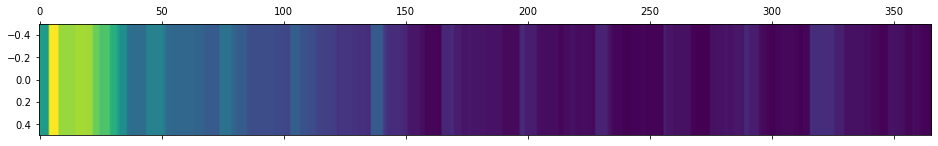

In [326]:
pyplot.matshow(balance_last_year_df.T, interpolation=None, aspect='auto')
pyplot.show()

In [327]:
"""
por los colores del heatmap apreciamos el trend a la baja con valores claros al principios que gradualmente se van oscureciendo
con el tiempo.
además apreciamos estacionalidad en la serie porque vemos lineas de valores claros aproximadamente cada 50 dias.
"""

'\npor los colores del heatmap apreciamos el trend a la baja con valores claros al principios que gradualmente se van oscureciendo\ncon el tiempo.\nademás apreciamos estacionalidad en la serie porque vemos lineas de valores claros aproximadamente cada 50 dias.\n'

In [328]:
# 5. Time Series Lag Scatter Plots

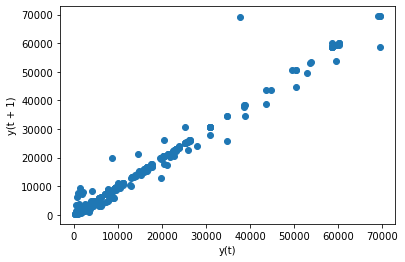

In [329]:
lag_plot(balance_last_year_ser)
pyplot.show()

In [331]:
"""
Vemos que hay una correlacion positiva clarisima entre y(t+1) e y(t)
(diagonal de abajo izquierda a arriba derecha)
"""

'\nVemos que hay una correlacion positiva clarisima entre y(t+1) e y(t)\n(diagonal de abajo izquierda a arriba derecha)\n'

In [332]:
"""
Ahora vamos a hacer lagplots entre y(t+1) y sus 60 lags anteriores hasta y(t-60)
"""

'\nAhora vamos a hacer lagplots entre y(t+1) y sus 60 lags anteriores hasta y(t-60)\n'

t+1 vs t-1


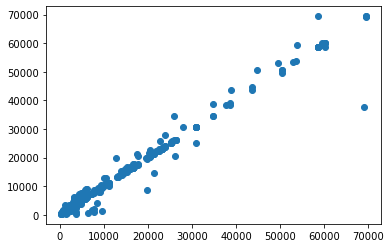

t+1 vs t-2


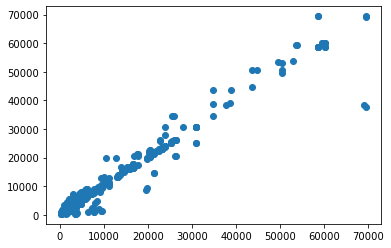

t+1 vs t-3


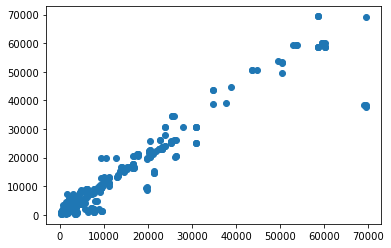

t+1 vs t-4


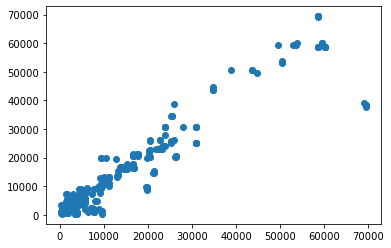

t+1 vs t-5


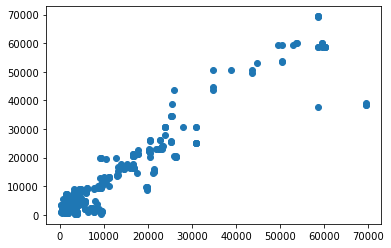

t+1 vs t-6


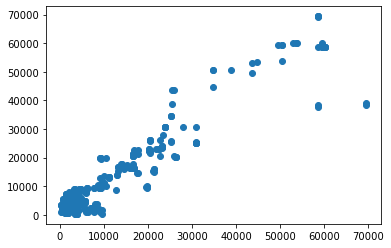

t+1 vs t-7


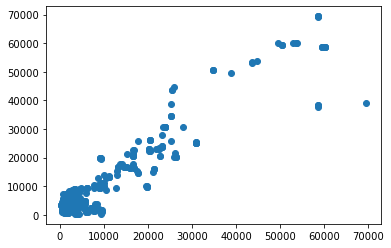

t+1 vs t-8


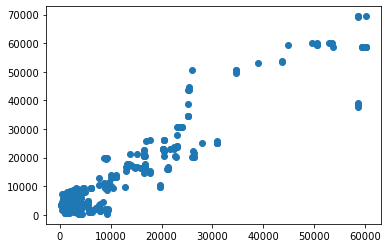

t+1 vs t-9


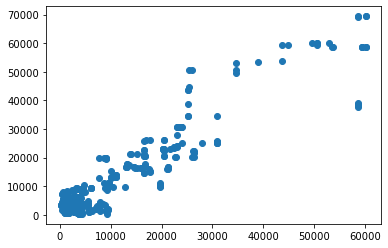

t+1 vs t-10


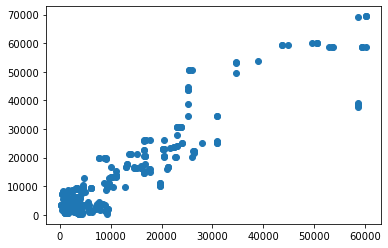

t+1 vs t-11


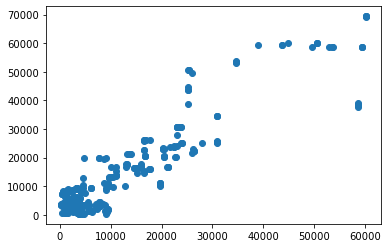

t+1 vs t-12


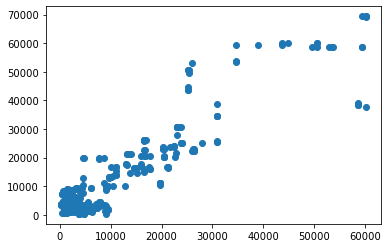

t+1 vs t-13


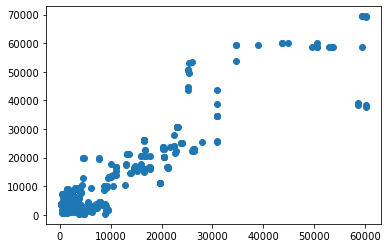

t+1 vs t-14


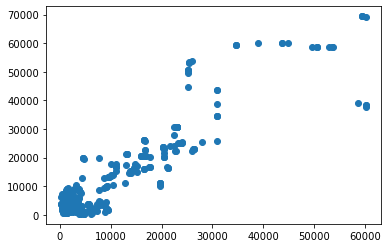

t+1 vs t-15


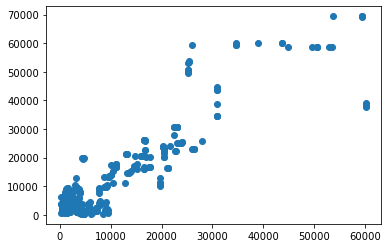

t+1 vs t-16


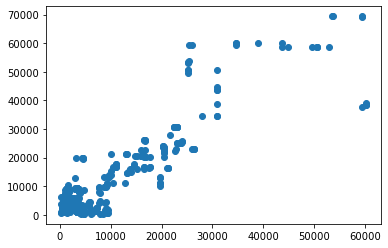

t+1 vs t-17


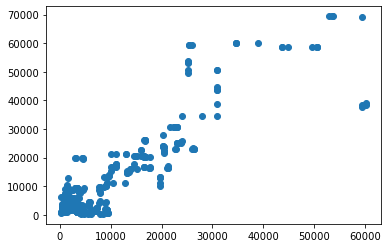

t+1 vs t-18


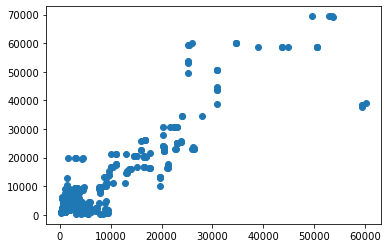

t+1 vs t-19


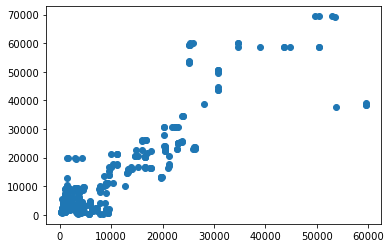

t+1 vs t-20


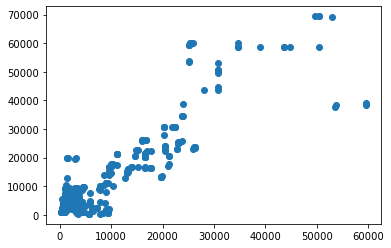

t+1 vs t-21


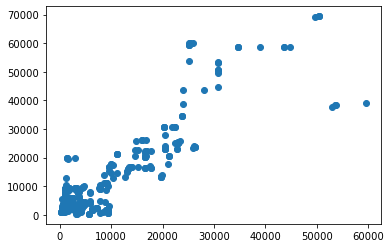

t+1 vs t-22


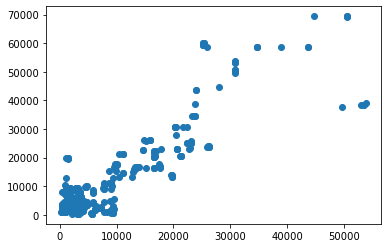

t+1 vs t-23


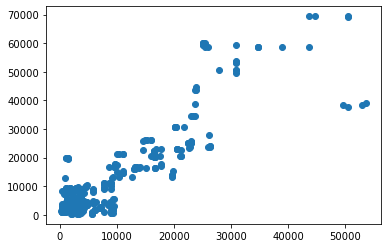

t+1 vs t-24


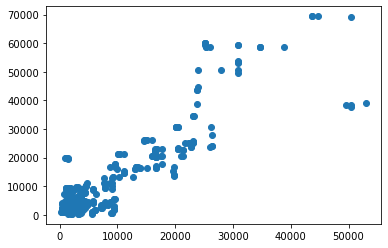

t+1 vs t-25


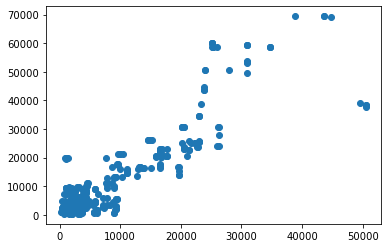

t+1 vs t-26


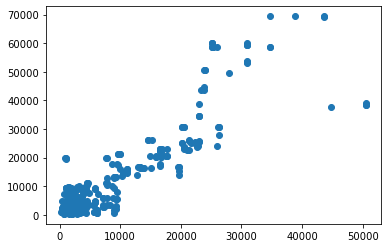

t+1 vs t-27


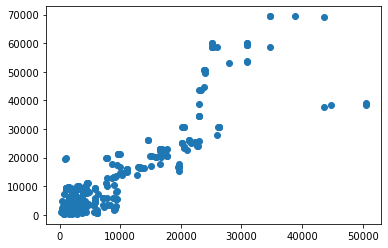

t+1 vs t-28


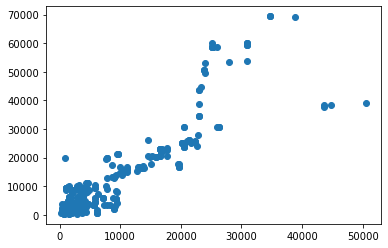

t+1 vs t-29


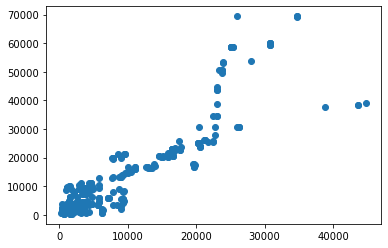

t+1 vs t-30


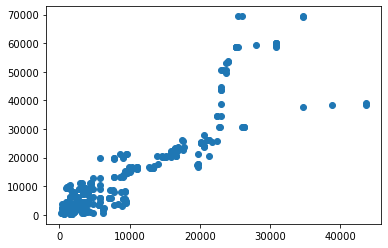

t+1 vs t-31


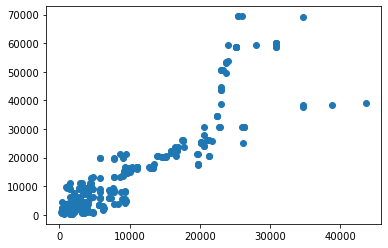

t+1 vs t-32


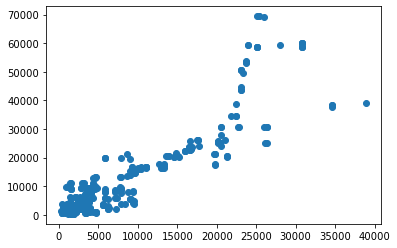

t+1 vs t-33


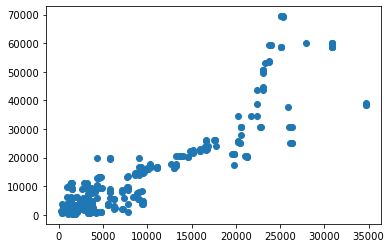

t+1 vs t-34


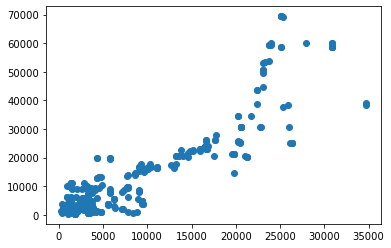

t+1 vs t-35


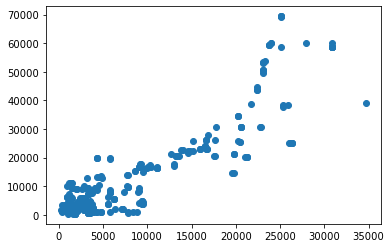

t+1 vs t-36


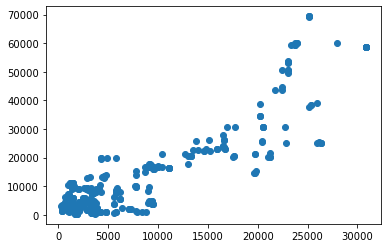

t+1 vs t-37


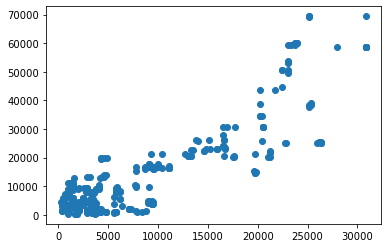

t+1 vs t-38


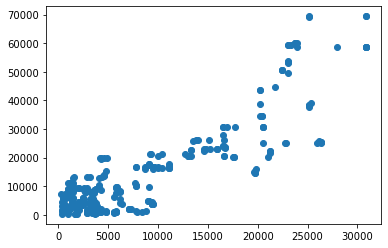

t+1 vs t-39


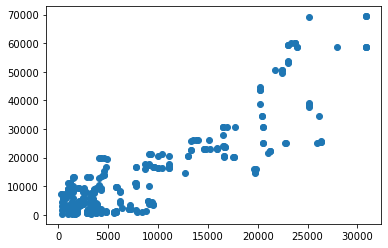

t+1 vs t-40


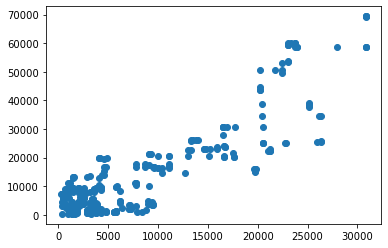

t+1 vs t-41


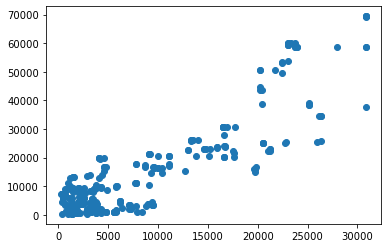

t+1 vs t-42


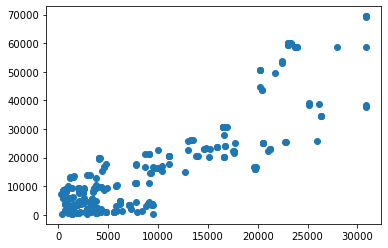

t+1 vs t-43


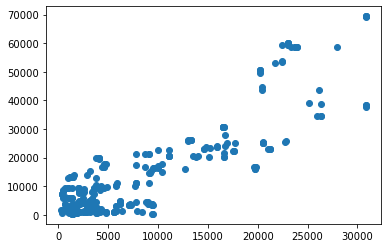

t+1 vs t-44


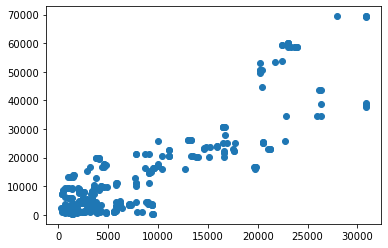

t+1 vs t-45


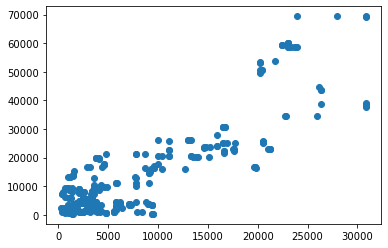

t+1 vs t-46


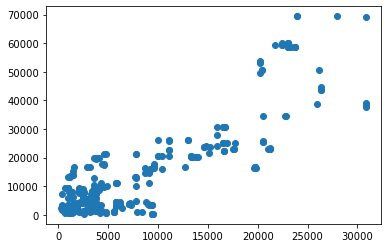

t+1 vs t-47


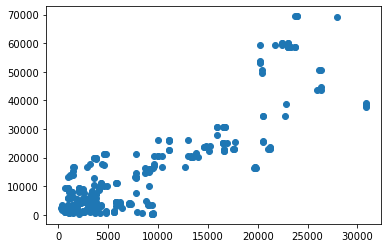

t+1 vs t-48


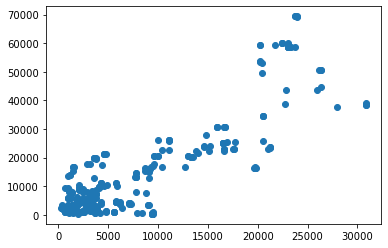

t+1 vs t-49


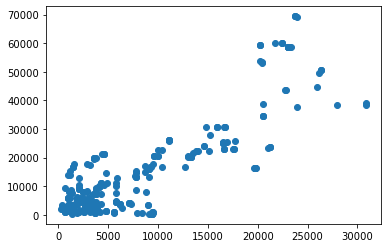

t+1 vs t-50


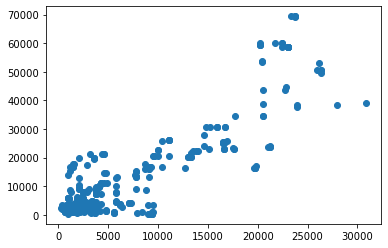

t+1 vs t-51


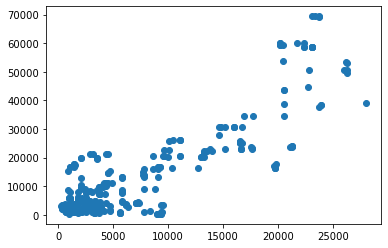

t+1 vs t-52


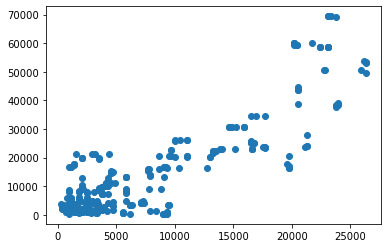

t+1 vs t-53


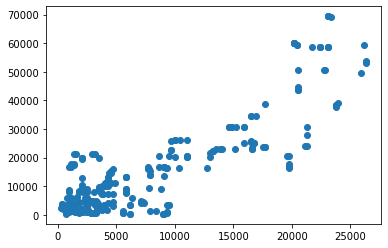

t+1 vs t-54


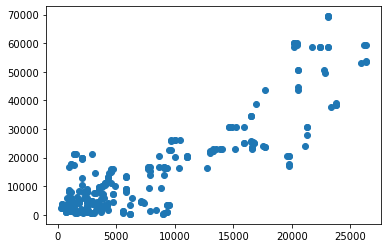

t+1 vs t-55


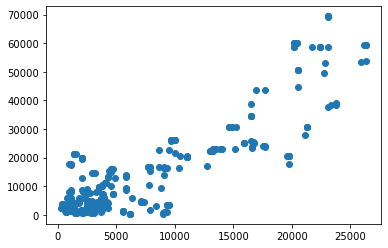

t+1 vs t-56


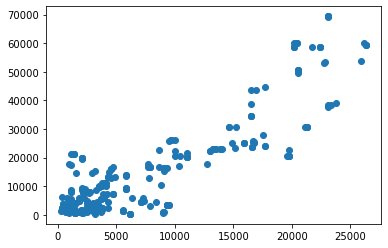

t+1 vs t-57


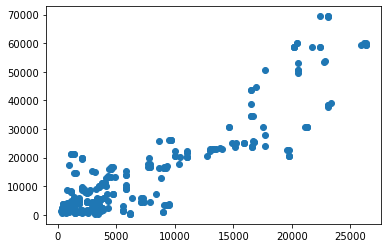

t+1 vs t-58


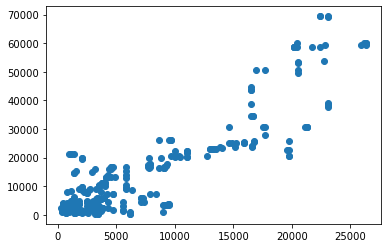

t+1 vs t-59


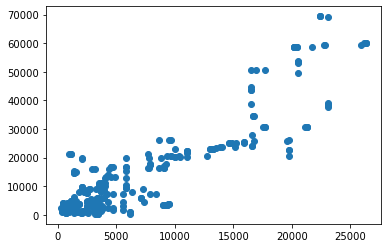

t+1 vs t-60


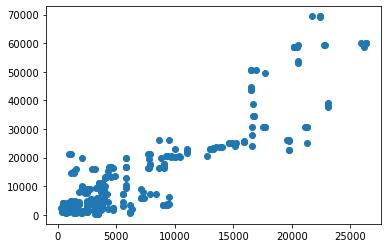

In [333]:
values = DataFrame(balance_last_year_ser.values)
lags = 60
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
for i in range(1,(lags + 1)):
	print('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
	pyplot.show()

In [334]:
"""
Vemos q hay correlacion positiva más o menos clara entre y(t+1) y desde y(t-7) hasta y(t-34) para valores de y(t+1) inferiores
a 25000 eur.
Vemos que hay correlacion postiva fuerte entre y(t+1) hasta y(t-6).
CONCLUSION: esta serie es claramente modelizable.
"""

'\nVemos q hay correlacion positiva más o menos clara entre y(t+1) y desde y(t-7) hasta y(t-34) para valores de y(t+1) inferiores\na 25000 eur.\nVemos que hay correlacion postiva fuerte entre y(t+1) hasta y(t-6).\nCONCLUSION: esta serie es claramente modelizable.\n'

In [ ]:
# 6. Time Series Autocorrelation Plots

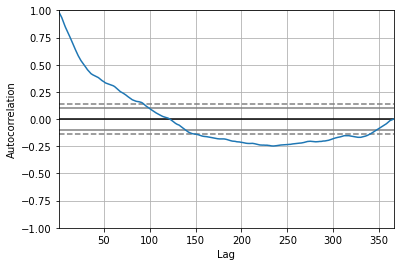

In [335]:
autocorrelation_plot(balance_last_year_ser)
pyplot.show()

In [337]:
"""
Vemos que hay correlacion positiva fuerte (corr > 0.5) entre y(t+1) y sus primeros 30 lags.
Vemos que hay correlacion positiva estadisticamente significativa desde el lag1 hasta el lag90.
Vemos que hay correlacion negativa estadisticamente significativa desde el lag140 hasta el lag340.

CONCLUSION: esta serie temporal es claramente modelizable.
"""

'\nVemos que hay correlacion positiva fuerte (corr > 0.5) entre y(t+1) y sus primeros 30 lags.\nVemos que hay correlacion positiva estadisticamente significativa desde el lag1 hasta el lag90.\nVemos qye hay correlacion negativa estadisticamente significativa desde el lag140 hasta el lag340.\n\nCONCLUSION: esta serie temporal es claramente modelizable.\n'

In [338]:
# Lesson 04: Persistence Forecast Model

In [339]:
# How to Make Baseline Predictions for Time Series Forecasting with Python
# https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/

In [340]:
"""
Vamos a hacer un persistence model con los datos.
Pero 1o vamos a transformar nuestro dataset de datos al formato admitido por prophet
"""

'\nVamos a hacer un persistence model con los datos.\nPero 1o vamos a transformar nuestro dataset de datos al formato admitido por prophet\n'

In [341]:
# Prophet Forecasting Library

In [342]:
!pip install pystan

In [343]:
!pip install fbprophet

In [346]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [347]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            0.11.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.9.1
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.5
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.pos

In [348]:
# Preparamos el dataframe al formato admitido por prophet

In [349]:
prophet_last_year_df = balance_last_year_df

In [350]:
del(balance_last_year_df)
del(balance_last_year_ser)

In [351]:
prophet_last_year_df

,BALANCE
DATE,
2020-02-10,38916.48
2020-02-11,38531.84
2020-02-12,38531.84
2020-02-13,37612.52
2020-02-14,69074.92
...,...
2021-02-05,1407.45
2021-02-06,956.59
2021-02-07,956.59


In [353]:
prophet_last_year_df.columns

Index(['BALANCE'], dtype='object')

In [354]:
prophet_last_year_df = prophet_last_year_df.reset_index()

In [355]:
prophet_last_year_df

,DATE,BALANCE
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


In [357]:
# prepare expected column names
prophet_last_year_df.columns = ['ds', 'y']

In [358]:
prophet_last_year_df

,ds,y
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


In [360]:
prophet_last_year_df['ds']= to_datetime(prophet_last_year_df['ds'])

In [361]:
prophet_last_year_df

,ds,y
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


In [362]:
prophet_last_year_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [369]:
# A continuacion vamos a obtener un dataframe de training desde 2020-02-10 hasta 2020-11-10.
# y un dataframe de test desde 2021-12-03 hasta 2020-11-11 hasta el 2021-02-09

In [370]:
prophet_last_year_df.index[prophet_last_year_df['ds'] == '2020-02-10']

Int64Index([0], dtype='int64')

In [371]:
prophet_last_year_df.index[prophet_last_year_df['ds'] == '2020-11-10']

Int64Index([274], dtype='int64')

In [372]:
prophet_last_year_df.index[prophet_last_year_df['ds'] == '2020-11-11']

Int64Index([275], dtype='int64')

In [373]:
prophet_last_year_df.index[prophet_last_year_df['ds'] == '2021-02-09']

Int64Index([365], dtype='int64')

In [374]:
prophet_train_df = prophet_last_year_df.iloc[:275,:]

In [375]:
prophet_train_df

,ds,y
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
270,2020-11-06,289.82
271,2020-11-07,326.80
272,2020-11-08,326.80
273,2020-11-09,326.80


In [377]:
prophet_test_df = prophet_last_year_df.iloc[275:,:]

In [378]:
prophet_test_df

,ds,y
275,2020-11-11,3529.48
276,2020-11-12,3299.48
277,2020-11-13,3477.48
278,2020-11-14,3768.25
279,2020-11-15,3768.25
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


In [379]:
# A continuacion vamos a calcular el error del modelo del Persistence Baseline sobre prophet_test_df

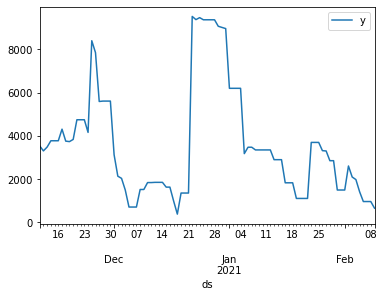

In [380]:
# gca stands for 'get current axis'
prophet_test_df.plot(kind='line', x='ds', y='y', ax=pyplot.gca())
pyplot.show()

In [381]:
# Persistence Algorithm

In [382]:
# Step 1: Define the Supervised Learning Problem

In [383]:
persistence_df=prophet_last_year_df.set_index(prophet_last_year_df.iloc[:,0])

In [384]:
persistence_df

,ds,y
ds,,
2020-02-10,2020-02-10,38916.48
2020-02-11,2020-02-11,38531.84
2020-02-12,2020-02-12,38531.84
2020-02-13,2020-02-13,37612.52
2020-02-14,2020-02-14,69074.92
...,...,...
2021-02-05,2021-02-05,1407.45
2021-02-06,2021-02-06,956.59
2021-02-07,2021-02-07,956.59


In [385]:
persistence_df=persistence_df.drop(['ds'], axis = 1)

In [386]:
persistence_df

,y
ds,
2020-02-10,38916.48
2020-02-11,38531.84
2020-02-12,38531.84
2020-02-13,37612.52
2020-02-14,69074.92
...,...
2021-02-05,1407.45
2021-02-06,956.59
2021-02-07,956.59


In [387]:
persistence_ser = persistence_df.T.squeeze()

In [388]:
persistence_ser

ds
2020-02-10    38916.48
2020-02-11    38531.84
2020-02-12    38531.84
2020-02-13    37612.52
2020-02-14    69074.92
                ...   
2021-02-05     1407.45
2021-02-06      956.59
2021-02-07      956.59
2021-02-08      956.59
2021-02-09      650.59
Name: y, Length: 366, dtype: float64

In [389]:
# Create lagged dataset
values = DataFrame(persistence_ser.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe)

          t-1       t+1
0         NaN  38916.48
1    38916.48  38531.84
2    38531.84  38531.84
3    38531.84  37612.52
4    37612.52  69074.92
..        ...       ...
361   1972.56   1407.45
362   1407.45    956.59
363    956.59    956.59
364    956.59    956.59
365    956.59    650.59

[366 rows x 2 columns]


In [390]:
dataframe

,t-1,t+1
0,NaN,38916.48
1,38916.48,38531.84
2,38531.84,38531.84
3,38531.84,37612.52
4,37612.52,69074.92
...,...,...
361,1972.56,1407.45
362,1407.45,956.59
363,956.59,956.59
364,956.59,956.59


In [391]:
# Step 2: Train and Test Sets

In [392]:
X = dataframe.values

In [393]:
X

array([[     nan, 38916.48],
       [38916.48, 38531.84],
       [38531.84, 38531.84],
       [38531.84, 37612.52],
       [37612.52, 69074.92],
       [69074.92, 69436.71],
       [69436.71, 69436.71],
       [69436.71, 69436.71],
       [69436.71, 58651.61],
       [58651.61, 58651.61],
       [58651.61, 58651.61],
       [58651.61, 58651.61],
       [58651.61, 58651.61],
       [58651.61, 58651.61],
       [58651.61, 58651.61],
       [58651.61, 60126.72],
       [60126.72, 60126.72],
       [60126.72, 60123.07],
       [60123.07, 60123.07],
       [60123.07, 59480.3 ],
       [59480.3 , 59480.3 ],
       [59480.3 , 59480.3 ],
       [59480.3 , 53768.55],
       [53768.55, 53548.55],
       [53548.55, 52957.55],
       [52957.55, 49585.14],
       [49585.14, 50483.14],
       [50483.14, 50483.14],
       [50483.14, 50483.14],
       [50483.14, 44764.88],
       [44764.88, 43594.88],
       [43594.88, 43594.88],
       [43594.88, 38868.8 ],
       [38868.8 , 34659.97],
       [34659.

In [394]:
type(X), X.shape

(numpy.ndarray, (366, 2))

In [395]:
X[0,:]

array([     nan, 38916.48])

In [397]:
X[274,:]

array([326.8, 401.8])

In [405]:
# el conjunto de train llega hasta y=401.8 - hasta la fila 275 incluida

In [398]:
X[275,:]

array([ 401.8 , 3529.48])

In [407]:
# el conjunto de test empieza en y=3529.48 - desde la fila 276 incluida

In [408]:
X[276,:]

array([3529.48, 3299.48])

In [409]:
X[365,:]

array([956.59, 650.59])

In [410]:
X[366,:]

IndexError: index 366 is out of bounds for axis 0 with size 366

In [411]:
for x in range(366): print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [414]:
# split into train and test sets
X = dataframe.values
train_size = 275
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [415]:
train

array([[38916.48, 38531.84],
       [38531.84, 38531.84],
       [38531.84, 37612.52],
       [37612.52, 69074.92],
       [69074.92, 69436.71],
       [69436.71, 69436.71],
       [69436.71, 69436.71],
       [69436.71, 58651.61],
       [58651.61, 58651.61],
       [58651.61, 58651.61],
       [58651.61, 58651.61],
       [58651.61, 58651.61],
       [58651.61, 58651.61],
       [58651.61, 58651.61],
       [58651.61, 60126.72],
       [60126.72, 60126.72],
       [60126.72, 60123.07],
       [60123.07, 60123.07],
       [60123.07, 59480.3 ],
       [59480.3 , 59480.3 ],
       [59480.3 , 59480.3 ],
       [59480.3 , 53768.55],
       [53768.55, 53548.55],
       [53548.55, 52957.55],
       [52957.55, 49585.14],
       [49585.14, 50483.14],
       [50483.14, 50483.14],
       [50483.14, 50483.14],
       [50483.14, 44764.88],
       [44764.88, 43594.88],
       [43594.88, 43594.88],
       [43594.88, 38868.8 ],
       [38868.8 , 34659.97],
       [34659.97, 34659.97],
       [34659.

In [418]:
test

array([[ 401.8 , 3529.48],
       [3529.48, 3299.48],
       [3299.48, 3477.48],
       [3477.48, 3768.25],
       [3768.25, 3768.25],
       [3768.25, 3768.25],
       [3768.25, 4304.49],
       [4304.49, 3751.38],
       [3751.38, 3728.94],
       [3728.94, 3829.94],
       [3829.94, 4740.16],
       [4740.16, 4740.16],
       [4740.16, 4740.16],
       [4740.16, 4154.79],
       [4154.79, 8396.51],
       [8396.51, 7844.07],
       [7844.07, 5585.77],
       [5585.77, 5603.77],
       [5603.77, 5603.77],
       [5603.77, 5603.77],
       [5603.77, 3121.41],
       [3121.41, 2129.63],
       [2129.63, 2028.54],
       [2028.54, 1490.68],
       [1490.68,  701.88],
       [ 701.88,  701.88],
       [ 701.88,  701.88],
       [ 701.88, 1513.6 ],
       [1513.6 , 1513.6 ],
       [1513.6 , 1834.4 ],
       [1834.4 , 1834.4 ],
       [1834.4 , 1844.4 ],
       [1844.4 , 1844.4 ],
       [1844.4 , 1844.4 ],
       [1844.4 , 1623.4 ],
       [1623.4 , 1623.4 ],
       [1623.4 ,  981.87],
 

In [419]:
train.shape, test.shape

((274, 2), (91, 2))

In [420]:
# Step 3: Persistence Algorithm

In [421]:
# Step 4: Make and Evaluate Forecast

Test MAE: 519.943
Test MSE: 1564697.169
Test RMSE: 1250.879


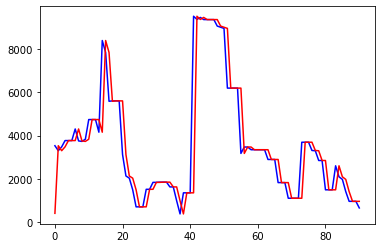

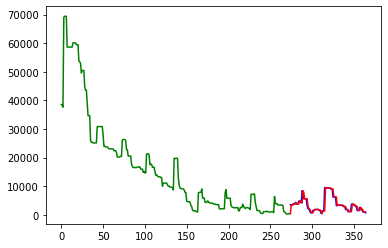

In [423]:
# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
    
mae = mean_absolute_error(test_y, predictions)
print('Test MAE: %.3f' % mae)

test_score = mean_squared_error(test_y, predictions)
root_test_score = sqrt(test_score)
print('Test MSE: %.3f' % test_score)
print('Test RMSE: %.3f' % root_test_score)

# plot predictions vs expected
pyplot.plot(test_y, color='blue') # y en test - en azul
pyplot.plot(predictions, color='red') # y en predictions - en rojo
pyplot.show()

# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in predictions], color='red') # y en predictions - en rojo
pyplot.show()

In [426]:
# Step 5: Complete Example

          t-1       t+1
0         NaN  38916.48
1    38916.48  38531.84
2    38531.84  38531.84
3    38531.84  37612.52
4    37612.52  69074.92
..        ...       ...
361   1972.56   1407.45
362   1407.45    956.59
363    956.59    956.59
364    956.59    956.59
365    956.59    650.59

[366 rows x 2 columns]
Test MAE: 519.943
Test MSE: 1564697.169
Test RMSE: 1250.879


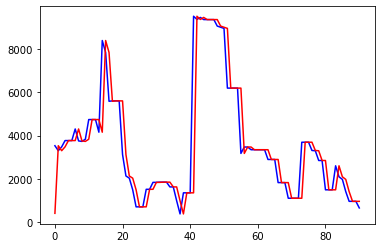

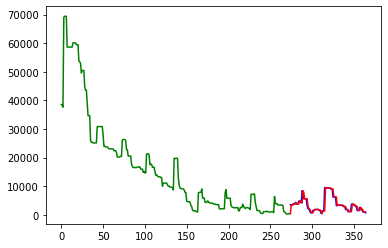

In [427]:
# Create lagged dataset
values = DataFrame(persistence_ser.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe)

# split into train and test sets
X = dataframe.values
train_size = 275
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)

mae = mean_absolute_error(test_y, predictions)
print('Test MAE: %.3f' % mae)
    
test_score = mean_squared_error(test_y, predictions)
root_test_score = sqrt(test_score)
print('Test MSE: %.3f' % test_score)
print('Test RMSE: %.3f' % root_test_score)

# plot predictions vs expected
pyplot.plot(test_y, color='blue') # y en test - en azul
pyplot.plot(predictions, color='red') # y en predictions - en rojo
pyplot.show()

# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in predictions], color='red') # y en predictions - en rojo
pyplot.show()

In [544]:
"""
Errores Persistence Baseline
Test MAE: 	519.943
Test RMSE: 	1250.879
Test MSE: 	1564697.169

del 2020-11-11 al 2021-02-09
"""

'\nErrores Persistence Baseline\nTest MAE: \t519.943\nTest RMSE: \t1250.879\nTest MSE: \t1564697.169\n\ndel 2020-11-11 al 2021-02-09\n'

In [428]:
# Lesson 05: Autoregressive Forecast Model

In [429]:
# Autoregression Models for Time Series Forecasting With Python
# https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

In [430]:
# Quick Check for Autocorrelation

In [431]:
"""
We can use a statistical test like the Pearson correlation coefficient. This produces a number to summarize how correlated two
variables are between -1 (negatively correlated) and +1 (positively correlated) with small values close to zero indicating low
correlation and high values above 0.5 or below -0.5 showing high correlation.
"""

'\nWe can use a statistical test like the Pearson correlation coefficient. This produces a number to summarize how correlated two\nvariables are between -1 (negatively correlated) and +1 (positively correlated) with small values close to zero indicating low\ncorrelation and high values above 0.5 or below -0.5 showing high correlation.\n'

In [432]:
# Autocorrelation Plots

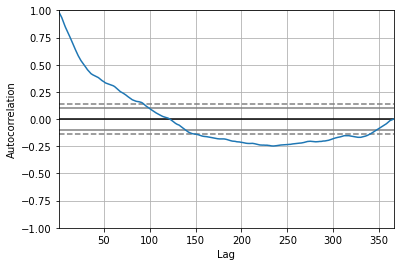

In [433]:
balance_last_year_ser = read_csv('balance_last_year.csv', header=0, parse_dates=True, index_col=0, squeeze=True)
autocorrelation_plot(balance_last_year_ser)
pyplot.show()

In [434]:
"""
The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis.
The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values.
Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for
selecting more relevant lag values.
"""

'\nThe plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis.\nThe plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values.\nCorrelation values above these lines are more significant than those below the line, providing a threshold or cutoff for\nselecting more relevant lag values.\n'

In [435]:
"""
Vemos que hay correlacion positiva fuerte (corr > 0.5) entre y(t+1) y sus primeros 30 lags.
Vemos que hay correlacion positiva estadisticamente significativa desde el lag1 hasta el lag90.
Vemos qye hay correlacion negativa estadisticamente significativa desde el lag140 hasta el lag340.

CONCLUSION: esta serie temporal es claramente modelizable.
"""

'\nVemos que hay correlacion positiva fuerte (corr > 0.5) entre y(t+1) y sus primeros 30 lags.\nVemos que hay correlacion positiva estadisticamente significativa desde el lag1 hasta el lag90.\nVemos qye hay correlacion negativa estadisticamente significativa desde el lag140 hasta el lag340.\n\nCONCLUSION: esta serie temporal es claramente modelizable.\n'

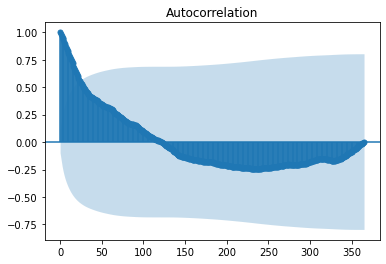

In [443]:
plot_acf(balance_last_year_ser, lags=365)
pyplot.show()

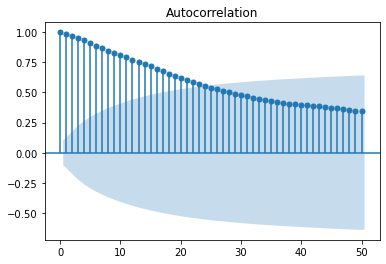

In [444]:
plot_acf(balance_last_year_ser, lags=50)
pyplot.show()

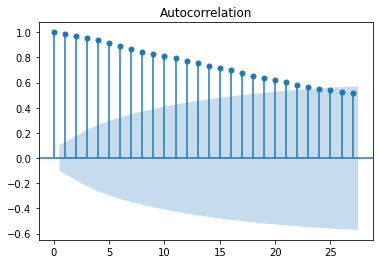

In [445]:
plot_acf(balance_last_year_ser, lags=27)
pyplot.show()

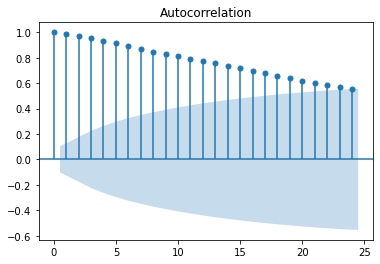

In [448]:
plot_acf(balance_last_year_ser, lags=24)
pyplot.show()

In [449]:
"""
Viendo las dos graficas anteriores vemos que hay una fuerte correlacion entre y(t+1) y sus 24 lags anteriores considerando por
tanto esta serie temporal como modelizable.
"""

'\nViendo las dos graficas anteriores vemos que hay una fuerte correlacion entre y(t+1) y sus 24 lags anteriores considerando por\ntanto esta serie temporal como modelizable.\n'

In [450]:
# Lesson 06: ARIMA Forecast Model

In [451]:
# How to Create an ARIMA Model for Time Series Forecasting in Python
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [452]:
# Lesson 07: Hello World End-to-End Project

In [453]:
# Time Series Forecast Study with Python: Monthly Sales of French Champagne
# https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/

In [454]:
# 1. Environment

In [455]:
# check the versions of key python libraries
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

scipy: 1.6.1
numpy: 1.19.2
matplotlib: 3.3.4
pandas: 1.2.2
statsmodels: 0.12.2
sklearn: 0.23.2
Prophet 0.7.1


In [456]:
# 6. ARIMA Models

In [457]:
# 6.1 Manually Configured ARIMA

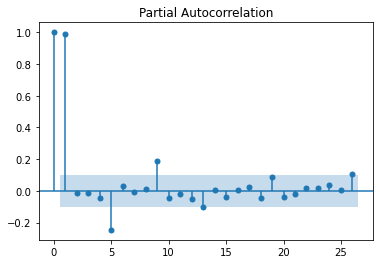

In [459]:
plot_pacf(balance_last_year_ser)
pyplot.show()

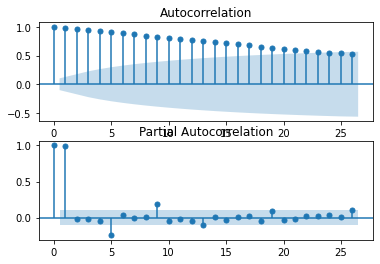

In [460]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(balance_last_year_ser, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(balance_last_year_ser, ax=pyplot.gca())
pyplot.show()

In [461]:
"""
Si fueramos a utlizar un ARIMA(p,d,q) configurado manualmente la configuracion seria la siguiente:
- Recordando el plot de los datos balance_last_year_ser en funcion del tiempo vemos q la serie tiene estacionalidad
    luego un buen valor de partida seria d=1.
- Viendo el grafico de autocorrelacion vemos que hay correlacion fuerte entre y(t+1) y sus 24 lags anteriores luego un buen
    valor para p seria p=24
- Viendo el grafico de autocorrelacion parcial vemos que hay correlacion parcial fuerte con el lag 1 y correlacion parcial
    significativa pero debil (corr < 0.5) con los lags 5, 9. Luego un buen valor para q seria q=1.
    
Luego si yo tuviera que aproximar esta serie temporal con un modelo ARIMA configurado manualmente el primer modelo que probaria
    seria ARIMA(24,1,1)
"""

'\nSi fueramos a utlizar un ARIMA(p,d,q) configurado manualmente la configuracion seria la siguiente:\n- Recordando el plot de los datos balance_last_year_ser en funcion del tiempo vemos q la serie tiene estacionalidad\n    luego un buen valor de partida seria d=1.\n- Viendo el grafico de autocorrelacion vemos que hay correlacion fuerte entre y(t+1) y sus 24 lags anteriores luego un buen\n    valor para p seria p=24\n- Viendo el grafico de autocorrelacion parcial vemos que hay correlacion parcial fuerte con el lag 1 y correlacion parcial\n    significativa pero debil (corr < 0.5) con los lags 5, 9. Luego un buen valor para q seria q=1.\n    \nLuego si yo tuviera que aproximar esta serie temporal con un modelo ARIMA configurado manualmente el primer modelo que probaria\n    seria ARIMA(24,1,1)\n'

In [462]:
"""
Terminado este analisis previo a continuacion pasamos a entrenar un validar con prophet un modelo para la serie temporal
del balance del año previo a 2021-02-09
"""

'\nTerminado este analisis previo a continuacion pasamos a entrenar un validar con prophet un modelo para la serie temporal\ndel balance del año previo a 2021-02-09\n'

In [463]:
# Time Series Forecasting With Prophet in Python
# https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [464]:
# Load and Summarize Dataset

In [465]:
"""
Prophet requires data to be in Pandas DataFrames. Therefore, we will load and summarize the data using Pandas.
"""

'\nProphet requires data to be in Pandas DataFrames. Therefore, we will load and summarize the data using Pandas.\n'

In [466]:
del(prophet_last_year_df)

In [467]:
del(prophet_train_df)

In [468]:
del(prophet_test_df)

In [493]:
prophet_last_year_df = read_csv('balance_last_year.csv', header=0, parse_dates=True, index_col=None, squeeze=False)

In [494]:
prophet_last_year_df

,DATE,BALANCE
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


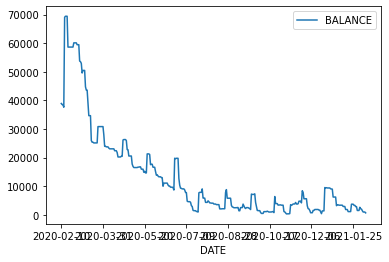

In [495]:
# gca stands for 'get current axis'
prophet_last_year_df.plot(kind='line', x='DATE', y='BALANCE', ax=pyplot.gca())
pyplot.show()

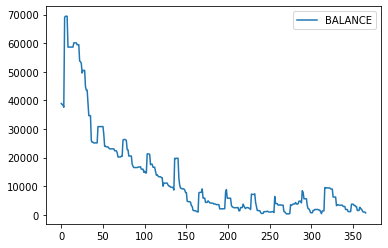

In [496]:
prophet_last_year_df.plot(kind='line', y='BALANCE', ax=pyplot.gca())
pyplot.show()

In [497]:
prophet_last_year_df.columns

Index(['DATE', 'BALANCE'], dtype='object')

In [498]:
# prepare expected column names
prophet_last_year_df.columns = ['ds', 'y']

In [499]:
prophet_last_year_df

,ds,y
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


In [500]:
prophet_last_year_df['ds']= to_datetime(prophet_last_year_df['ds'])

In [501]:
prophet_last_year_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [502]:
prophet_last_year_df.index[prophet_last_year_df['ds'] == '2020-02-10']

Int64Index([0], dtype='int64')

In [503]:
prophet_last_year_df.index[prophet_last_year_df['ds'] == '2020-11-10']

Int64Index([274], dtype='int64')

In [504]:
prophet_last_year_df.index[prophet_last_year_df['ds'] == '2020-11-11']

Int64Index([275], dtype='int64')

In [505]:
prophet_last_year_df.index[prophet_last_year_df['ds'] == '2021-02-09']

Int64Index([365], dtype='int64')

In [506]:
prophet_train_df = prophet_last_year_df.iloc[:275,:]

In [507]:
prophet_train_df

,ds,y
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
270,2020-11-06,289.82
271,2020-11-07,326.80
272,2020-11-08,326.80
273,2020-11-09,326.80


In [508]:
prophet_test_df = prophet_last_year_df.iloc[275:,:]

In [510]:
prophet_test_df

,ds,y
275,2020-11-11,3529.48
276,2020-11-12,3299.48
277,2020-11-13,3477.48
278,2020-11-14,3768.25
279,2020-11-15,3768.25
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


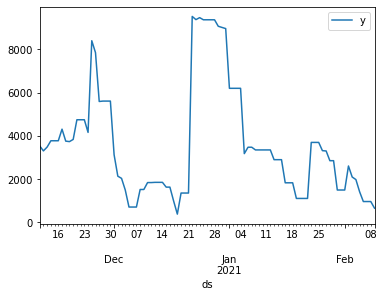

In [511]:
# gca stands for 'get current axis'
prophet_test_df.plot(kind='line', x='ds', y='y', ax=pyplot.gca())
pyplot.show()

In [512]:
# Forecast Car Sales With Prophet

In [ ]:
# Fit Prophet Model

In [516]:
from fbprophet import Prophet

# define the model
model = Prophet()
# fit the model
model.fit(prophet_train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [517]:
# Make an In-Sample Forecast

In [580]:
"""
Vamos a hacer un In-Sample Forecast de las observaciones desde el 2020-08-11 hasta el 2020-09-10
"""

'\nVamos a hacer un In-Sample Forecast de las observaciones desde el 2020-08-11 hasta el 2020-09-10\n'

In [581]:
prophet_train_df

,ds,y
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
270,2020-11-06,289.82
271,2020-11-07,326.80
272,2020-11-08,326.80
273,2020-11-09,326.80


In [582]:
prophet_train_df.index[prophet_train_df['ds'] == '2020-08-11']

Int64Index([183], dtype='int64')

In [583]:
prophet_train_df.index[prophet_train_df['ds'] == '2020-11-10']

Int64Index([274], dtype='int64')

In [586]:
future_in_sample_df=prophet_train_df.iloc[183:,:]

In [587]:
future_in_sample_df

,ds,y
183,2020-08-11,3741.27
184,2020-08-12,3741.27
185,2020-08-13,3741.27
186,2020-08-14,3541.27
187,2020-08-15,3541.27
...,...,...
270,2020-11-06,289.82
271,2020-11-07,326.80
272,2020-11-08,326.80
273,2020-11-09,326.80


In [588]:
future_in_sample_df=future_in_sample_df.drop(['y'], axis = 1)

In [589]:
future_in_sample_df

,ds
183,2020-08-11
184,2020-08-12
185,2020-08-13
186,2020-08-14
187,2020-08-15
...,...
270,2020-11-06
271,2020-11-07
272,2020-11-08
273,2020-11-09


In [590]:
future_in_sample_df.reset_index(level=0, inplace=True)

In [591]:
future_in_sample_df

,index,ds
0,183,2020-08-11
1,184,2020-08-12
2,185,2020-08-13
3,186,2020-08-14
4,187,2020-08-15
...,...,...
87,270,2020-11-06
88,271,2020-11-07
89,272,2020-11-08
90,273,2020-11-09


In [592]:
future_in_sample_df=future_in_sample_df.drop(['index'], axis = 1)

In [593]:
future_in_sample_df

,ds
0,2020-08-11
1,2020-08-12
2,2020-08-13
3,2020-08-14
4,2020-08-15
...,...
87,2020-11-06
88,2020-11-07
89,2020-11-08
90,2020-11-09


In [594]:
future_in_sample_df.dtypes, type(future_in_sample_df), future_in_sample_df.columns

(ds    datetime64[ns]
 dtype: object,
 pandas.core.frame.DataFrame,
 Index(['ds'], dtype='object'))

In [595]:
# use the model to make a forecast
forecast_df = model.predict(future_in_sample_df)

In [596]:
"""
The result of the predict() function is a DataFrame that contains many columns. Perhaps the most important columns are the
forecast date time (‘ds‘), the forecasted value (‘yhat‘), and the lower and upper bounds on the predicted value (‘yhat_lower‘
and ‘yhat_upper‘) that provide uncertainty of the forecast.
"""

'\nThe result of the predict() function is a DataFrame that contains many columns. Perhaps the most important columns are the\nforecast date time (‘ds‘), the forecasted value (‘yhat‘), and the lower and upper bounds on the predicted value (‘yhat_lower‘\nand ‘yhat_upper‘) that provide uncertainty of the forecast.\n'

In [597]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-08-11,4514.326326,-2398.853669,10314.935488,4514.326326,4514.326326,-478.807875,-478.807875,-478.807875,-478.807875,-478.807875,-478.807875,0.0,0.0,0.0,4035.518451
1,2020-08-12,4458.098041,-2143.127983,10047.409419,4458.098041,4458.098041,-791.322256,-791.322256,-791.322256,-791.322256,-791.322256,-791.322256,0.0,0.0,0.0,3666.775785
2,2020-08-13,4415.762875,-2449.707309,9792.936317,4415.762875,4415.762875,-778.446146,-778.446146,-778.446146,-778.446146,-778.446146,-778.446146,0.0,0.0,0.0,3637.316729
3,2020-08-14,4373.427709,-1704.311109,10916.826738,4373.427709,4373.427709,395.513085,395.513085,395.513085,395.513085,395.513085,395.513085,0.0,0.0,0.0,4768.940794
4,2020-08-15,4331.092543,-1126.237111,11115.065004,4331.092543,4331.092543,521.254414,521.254414,521.254414,521.254414,521.254414,521.254414,0.0,0.0,0.0,4852.346957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2020-11-06,817.416943,-5018.726385,7262.392311,817.416943,817.416943,395.513085,395.513085,395.513085,395.513085,395.513085,395.513085,0.0,0.0,0.0,1212.930028
88,2020-11-07,775.083709,-4879.553076,7865.064241,775.083709,775.083709,521.254414,521.254414,521.254414,521.254414,521.254414,521.254414,0.0,0.0,0.0,1296.338123
89,2020-11-08,732.750475,-4559.402456,7455.913943,732.750475,732.750475,731.004143,731.004143,731.004143,731.004143,731.004143,731.004143,0.0,0.0,0.0,1463.754617
90,2020-11-09,690.417240,-5027.197534,7223.253864,690.417240,690.417240,400.804635,400.804635,400.804635,400.804635,400.804635,400.804635,0.0,0.0,0.0,1091.221876


In [598]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds         yhat   yhat_lower    yhat_upper
0  2020-08-11  4035.518451 -2398.853669  10314.935488
1  2020-08-12  3666.775785 -2143.127983  10047.409419
2  2020-08-13  3637.316729 -2449.707309   9792.936317
3  2020-08-14  4768.940794 -1704.311109  10916.826738
4  2020-08-15  4852.346957 -1126.237111  11115.065004
..        ...          ...          ...           ...
87 2020-11-06  1212.930028 -5018.726385   7262.392311
88 2020-11-07  1296.338123 -4879.553076   7865.064241
89 2020-11-08  1463.754617 -4559.402456   7455.913943
90 2020-11-09  1091.221876 -5027.197534   7223.253864
91 2020-11-10   169.276131 -6249.532082   6401.352898

[92 rows x 4 columns]


In [599]:
"""
Prophet also provides a built-in tool for visualizing the prediction in the context of the training dataset.

This can be achieved by calling the plot() function on the model and passing it a result DataFrame.
It will create a plot of the training dataset and overlay the prediction with the upper and lower bounds for the forecast dates.
"""

'\nProphet also provides a built-in tool for visualizing the prediction in the context of the training dataset.\n\nThis can be achieved by calling the plot() function on the model and passing it a result DataFrame.\nIt will create a plot of the training dataset and overlay the prediction with the upper and lower bounds for the forecast dates.\n'

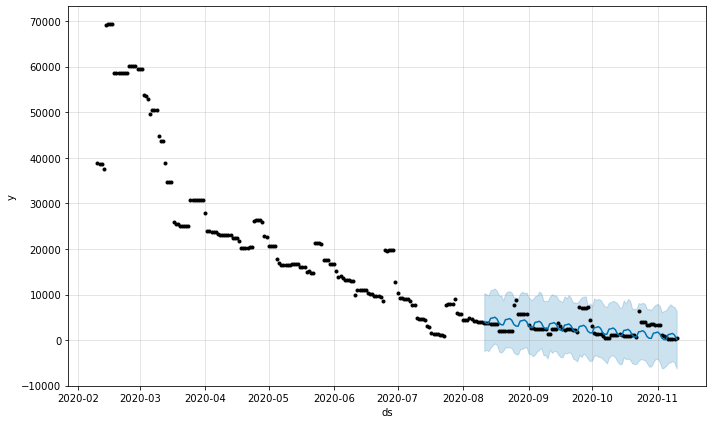

In [600]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [606]:
# Manually Evaluate Forecast Model

In [607]:
evaluate_in_sample_df=prophet_train_df.iloc[183:,:]

In [608]:
evaluate_in_sample_df.reset_index(level=0, inplace=True)

In [609]:
evaluate_in_sample_df=evaluate_in_sample_df.drop(['index'], axis = 1)

In [610]:
evaluate_in_sample_df

,ds,y
0,2020-08-11,3741.27
1,2020-08-12,3741.27
2,2020-08-13,3741.27
3,2020-08-14,3541.27
4,2020-08-15,3541.27
...,...,...
87,2020-11-06,289.82
88,2020-11-07,326.80
89,2020-11-08,326.80
90,2020-11-09,326.80


In [611]:
evaluate_in_sample_df['y'][:].values

array([3741.27, 3741.27, 3741.27, 3541.27, 3541.27, 3541.27, 3541.27,
       2050.66, 2050.66, 2050.66, 2096.66, 2096.66, 2096.66, 2096.66,
       7794.8 , 8791.32, 5781.32, 5781.32, 5781.32, 5781.32, 5781.32,
       3276.53, 2751.75, 2646.75, 2448.17, 2455.87, 2455.87, 2455.87,
       2525.87, 2519.87, 1389.87, 1389.87, 2495.88, 2495.88, 2495.88,
       3725.07, 3101.18, 2459.65, 2181.69, 2494.01, 2494.01, 2494.01,
       2294.01, 2189.13, 1814.27, 7233.27, 7111.27, 7111.27, 7111.27,
       7322.23, 4322.23, 2981.89, 1512.6 , 1437.6 , 1437.6 , 1437.6 ,
        785.8 ,  459.8 ,  459.8 ,  461.8 , 1090.8 , 1090.8 , 1090.8 ,
       1090.8 , 1263.18, 1115.68,  940.59,  964.06,  964.06,  964.06,
       1083.38, 1097.81,  747.81, 6372.39, 3903.39, 3903.39, 3903.39,
       3368.79, 3406.49, 3424.19, 3459.19, 3344.09, 3344.09, 3344.09,
       1106.83,  992.88,  614.88,  289.82,  326.8 ,  326.8 ,  326.8 ,
        401.8 ])

Train MAE: 1485.113
Train MSE: 3667000.161
Train RMSE: 1914.941


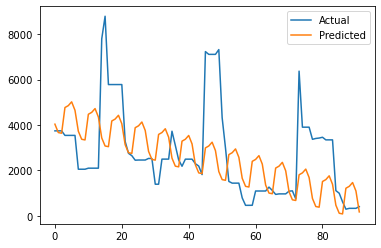

In [612]:
# calculate MAE between expected and predicted values for december
y_true = evaluate_in_sample_df['y'][:].values
y_pred = forecast_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Train MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Train MSE: %.3f' % test_score)
print('Train RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [613]:
"""
prophet - desde 2020-09-11 al 2020-11-10 con prediccion in-sample sobre datos de training q SI ha visto
Train MAE: 1485.113
Train RMSE: 1914.941
Train MSE: 3667000.161
"""

'\nprophet - desde 2020-09-11 al 2020-11-10 con prediccion in-sample sobre datos de training q SI ha visto\nTrain MAE: 1485.113\nTrain RMSE: 1914.941\nTrain MSE: 3667000.161\n'

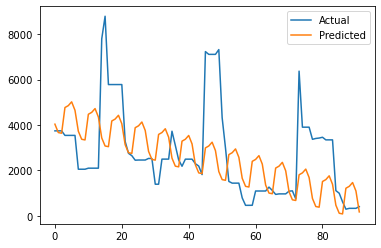

In [614]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [615]:
"""
Vemos tambien que la grafica de valores predichos frente a los valores reales sale muy bien porque captura la tendencia
de los datos reales y la presenta suavizada.
"""

'\nVemos tambien que la grafica de valores predichos frente a los valores reales sale muy bien porque captura la tendencia\nde los datos reales y la presenta suavizada.\n'

In [616]:
"""
A continuacion procedemos a la validacion final del modelo con los datos desde 2020-11-11 hasta 2021-02-09
"""

'\nA continuacion procedemos a la validacion final del modelo con los datos desde 2020-11-11 hasta 2021-02-09\n'

In [617]:
# Make an Out-of-Sample Forecast

In [618]:
prophet_test_df

,ds,y
275,2020-11-11,3529.48
276,2020-11-12,3299.48
277,2020-11-13,3477.48
278,2020-11-14,3768.25
279,2020-11-15,3768.25
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


In [619]:
future_out_sample_df=prophet_test_df

In [620]:
future_out_sample_df=future_out_sample_df.drop(['y'], axis = 1)

In [621]:
future_out_sample_df

,ds
275,2020-11-11
276,2020-11-12
277,2020-11-13
278,2020-11-14
279,2020-11-15
...,...
361,2021-02-05
362,2021-02-06
363,2021-02-07
364,2021-02-08


In [622]:
future_out_sample_df.reset_index(level=0, inplace=True)

In [623]:
future_out_sample_df

,index,ds
0,275,2020-11-11
1,276,2020-11-12
2,277,2020-11-13
3,278,2020-11-14
4,279,2020-11-15
...,...,...
86,361,2021-02-05
87,362,2021-02-06
88,363,2021-02-07
89,364,2021-02-08


In [624]:
future_out_sample_df=future_out_sample_df.drop(['index'], axis = 1)

In [625]:
future_out_sample_df

,ds
0,2020-11-11
1,2020-11-12
2,2020-11-13
3,2020-11-14
4,2020-11-15
...,...
86,2021-02-05
87,2021-02-06
88,2021-02-07
89,2021-02-08


In [626]:
future_out_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [627]:
future_out_sample_df['ds']=to_datetime(future_out_sample_df['ds'])

In [628]:
future_out_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [629]:
# use the model to make a forecast
forecast_df = model.predict(future_out_sample_df)

In [630]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-11,605.750772,-6301.579779,5778.362944,605.750772,605.750772,-791.322256,-791.322256,-791.322256,-791.322256,-791.322256,-791.322256,0.0,0.0,0.0,-185.571484
1,2020-11-12,563.417538,-6091.870249,6110.814739,563.417538,563.417538,-778.446146,-778.446146,-778.446146,-778.446146,-778.446146,-778.446146,0.0,0.0,0.0,-215.028608
2,2020-11-13,521.084303,-4841.709255,7194.545843,516.691352,526.117235,395.513085,395.513085,395.513085,395.513085,395.513085,395.513085,0.0,0.0,0.0,916.597388
3,2020-11-14,478.751069,-5051.959135,7403.529917,465.862359,493.609642,521.254414,521.254414,521.254414,521.254414,521.254414,521.254414,0.0,0.0,0.0,1000.005483
4,2020-11-15,436.417835,-4976.067279,7156.729884,411.432108,470.666487,731.004143,731.004143,731.004143,731.004143,731.004143,731.004143,0.0,0.0,0.0,1167.421977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2021-02-05,-3034.907376,-10835.734698,5125.967956,-8297.147085,1999.868307,395.513085,395.513085,395.513085,395.513085,395.513085,395.513085,0.0,0.0,0.0,-2639.394291
87,2021-02-06,-3077.240610,-11013.261662,5558.546049,-8412.539576,2031.246342,521.254414,521.254414,521.254414,521.254414,521.254414,521.254414,0.0,0.0,0.0,-2555.986196
88,2021-02-07,-3119.573844,-10744.672730,5910.051635,-8530.570436,2097.387241,731.004143,731.004143,731.004143,731.004143,731.004143,731.004143,0.0,0.0,0.0,-2388.569702
89,2021-02-08,-3161.907079,-10695.773092,5630.687549,-8648.601295,2210.943876,400.804635,400.804635,400.804635,400.804635,400.804635,400.804635,0.0,0.0,0.0,-2761.102443


In [631]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds         yhat    yhat_lower   yhat_upper
0  2020-11-11  -185.571484  -6301.579779  5778.362944
1  2020-11-12  -215.028608  -6091.870249  6110.814739
2  2020-11-13   916.597388  -4841.709255  7194.545843
3  2020-11-14  1000.005483  -5051.959135  7403.529917
4  2020-11-15  1167.421977  -4976.067279  7156.729884
..        ...          ...           ...          ...
86 2021-02-05 -2639.394291 -10835.734698  5125.967956
87 2021-02-06 -2555.986196 -11013.261662  5558.546049
88 2021-02-07 -2388.569702 -10744.672730  5910.051635
89 2021-02-08 -2761.102443 -10695.773092  5630.687549
90 2021-02-09 -3683.048188 -11738.911364  3824.305871

[91 rows x 4 columns]


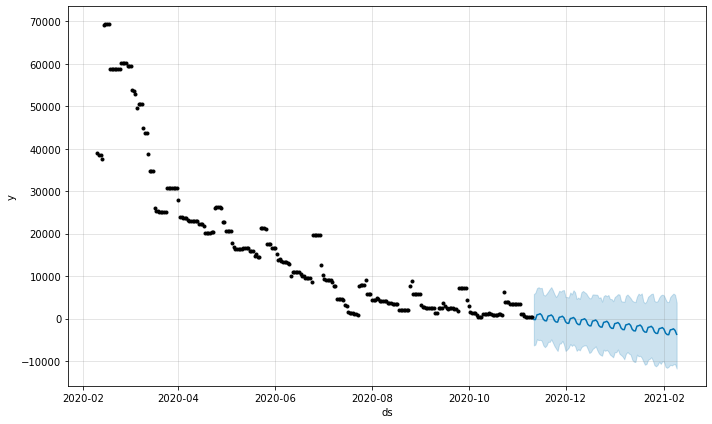

In [632]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

Test MAE: 4908.521
Test MSE: 31242425.352
Test RMSE: 5589.492


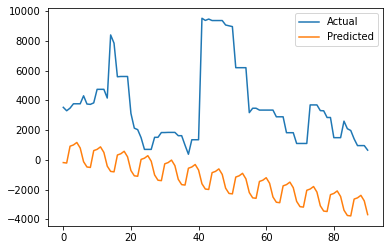

In [633]:
# calculate MAE between expected and predicted values for december
y_true = prophet_test_df['y'][:].values
y_pred = forecast_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Test MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Test MSE: %.3f' % test_score)
print('Test RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [635]:
"""
Vemos que en datos no vistos Prophet hace una prediccion aparentemente peor que el Persistence Baseline en un dataset no visto
pero eso es porque las observaciones reales tienen cambios de valor muy repentinos y ni ningun otro modelo es capaz de predecir
esos cambios y aún así sigue muy bien a la serie porque captura muy bien su tendencia.

prophet - desde 2020-09-11 al 2020-11-10 con prediccion in-sample sobre datos de training q SI ha visto
Train MAE: 1485.113
Train RMSE: 1914.941
Train MSE: 3667000.161

prophet - desde 2020-11-11 al 2021-02-09 con prediccion in-sample sobre datos de test q NO ha visto
Test MAE: 4908.521
Test RMSE: 5589.492
Test MSE: 31242425.352

Persistence Baseline - desde 2020-11-11 al 2021-02-09 sobre datos de test
Test MAE: 	519.943
Test RMSE: 	1250.879
Test MSE: 	1564697.169
"""

'\nVemos que en datos no vistos Prophet hace una prediccion aparentemente peor que el Persistence Baseline en un dataset no visto\npero eso es porque las observaciones reales tienen cambios de valor muy repentinos y ni ningun otro modelo es capaz de predecir\nesos cambios y aún así sigue muy bien a la serie porque captura muy bien su tendencia.\n\nprophet - desde 2020-09-11 al 2020-11-10 con prediccion in-sample sobre datos de training q SI ha visto\nTrain MAE: 1485.113\nTrain RMSE: 1914.941\nTrain MSE: 3667000.161\n\nprophet - desde 2020-11-11 al 2021-02-09 con prediccion in-sample sobre datos de test q NO ha visto\nTest MAE: 4908.521\nTest RMSE: 5589.492\nTest MSE: 31242425.352\n\nPersistence Baseline - desde 2020-11-11 al 2021-02-09 sobre datos de test\nTest MAE: \t519.943\nTest RMSE: \t1250.879\nTest MSE: \t1564697.169\n'

In [636]:
"""
A continuacion vamos a plotear la prediccion junto al dataset completo para ver lo bien que hemos afinado dentro del conjunto
del contexto entero de datos.
"""

'\nA continuacion vamos a plotear la prediccion junto al dataset completo para ver lo bien que hemos afinado dentro del conjunto\ndel contexto entero de datos.\n'

In [637]:
prophet_last_year_df = read_csv('balance_last_year.csv', header=0, parse_dates=True, index_col=None, squeeze=False)

In [638]:
prophet_last_year_df.shape

(366, 2)

In [639]:
prophet_last_year_df

,DATE,BALANCE
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


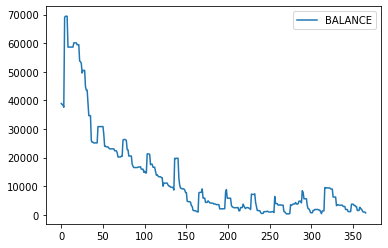

In [640]:
prophet_last_year_df.plot()
pyplot.show()

In [642]:
prophet_last_year_df.index[prophet_last_year_df['DATE'] == '2020-02-10']

Int64Index([0], dtype='int64')

In [644]:
prophet_last_year_df.index[prophet_last_year_df['DATE'] == '2020-11-10']

Int64Index([274], dtype='int64')

In [645]:
prophet_last_year_df.index[prophet_last_year_df['DATE'] == '2020-11-11']

Int64Index([275], dtype='int64')

In [646]:
prophet_last_year_df.index[prophet_last_year_df['DATE'] == '2021-02-09']

Int64Index([365], dtype='int64')

In [648]:
# split into train and test sets
X = prophet_last_year_df.values
train_size = 275
train, test = X[:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [651]:
DataFrame(train).tail()

,0,1
270,2020-11-06,289.82
271,2020-11-07,326.8
272,2020-11-08,326.8
273,2020-11-09,326.8
274,2020-11-10,401.8


In [657]:
DataFrame(test).tail()

,0,1
86,2021-02-05,1407.45
87,2021-02-06,956.59
88,2021-02-07,956.59
89,2021-02-08,956.59
90,2021-02-09,650.59


In [655]:
train_X.shape, train_y.shape

((275,), (275,))

In [656]:
test_X.shape, test_y.shape

((91,), (91,))

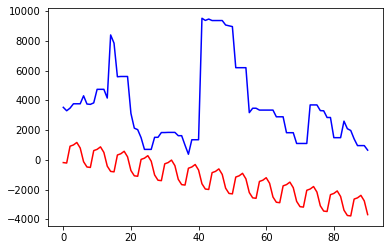

In [658]:
# plot predictions vs expected
pyplot.plot(test_y, color='blue') # y en test - en azul
pyplot.plot(y_pred, color='red') # y en predictions - en rojo
pyplot.show()

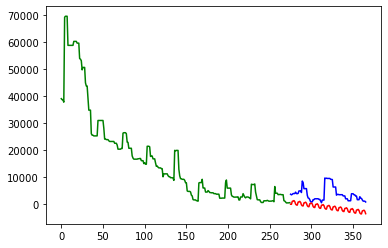

In [659]:
# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in y_pred], color='red') # y en predictions - en rojo
pyplot.show()

In [660]:
"""
en el contexto total descendente de los datos vemos q la prediccion q hace es bastante sensata porque no tiene en cuenta
esas grandes subidas repentinas de saldo
"""

'\nen el contexto total descendente de los datos vemos q la prediccion q hace es bastante sensata porque no tiene en cuenta\nesas grandes subidas repentinas de saldo\n'

In [661]:
"""
Por ultimo vamos a hacer una prediccion con prophet para el dataset entero de 1 año con el modelo entrenado hasta 2020-11-10
y vamos a representar valor real frente a predicho para poder ver de una manera más general lo bien o mal que aproxima prophet
"""

'\nPor ultimo vamos a hacer una prediccion con prophet para el dataset entero de 1 año con el modelo entrenado hasta 2020-11-10\ny vamos a representar valor real frente a predicho para poder ver de una manera más general lo bien o mal que aproxima prophet\n'

In [662]:
prophet_last_year_df = read_csv('balance_last_year.csv', header=0, parse_dates=True, index_col=None, squeeze=False)

In [663]:
prophet_last_year_df.shape

(366, 2)

In [664]:
prophet_last_year_df

,DATE,BALANCE
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


In [666]:
# prepare expected column names
prophet_last_year_df.columns = ['ds', 'y']

In [667]:
prophet_last_year_df['ds']= to_datetime(prophet_last_year_df['ds'])

In [668]:
prophet_last_year_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [669]:
future_in_out_sample_df=prophet_last_year_df

In [670]:
future_in_out_sample_df=future_in_out_sample_df.drop(['y'], axis = 1)

In [671]:
future_in_out_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [672]:
future_in_out_sample_df

,ds
0,2020-02-10
1,2020-02-11
2,2020-02-12
3,2020-02-13
4,2020-02-14
...,...
361,2021-02-05
362,2021-02-06
363,2021-02-07
364,2021-02-08


In [673]:
# use the model to make a forecast
forecast_df = model.predict(future_in_out_sample_df)

In [674]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-10,59622.010534,53858.991504,66212.990999,59622.010534,59622.010534,400.804635,400.804635,400.804635,400.804635,400.804635,400.804635,0.0,0.0,0.0,60022.815170
1,2020-02-11,59028.857258,52633.371796,64829.382954,59028.857258,59028.857258,-478.807875,-478.807875,-478.807875,-478.807875,-478.807875,-478.807875,0.0,0.0,0.0,58550.049383
2,2020-02-12,58435.703982,51965.978935,63372.701161,58435.703982,58435.703982,-791.322256,-791.322256,-791.322256,-791.322256,-791.322256,-791.322256,0.0,0.0,0.0,57644.381726
3,2020-02-13,57842.550707,50787.015733,63254.034030,57842.550707,57842.550707,-778.446146,-778.446146,-778.446146,-778.446146,-778.446146,-778.446146,0.0,0.0,0.0,57064.104561
4,2020-02-14,57249.397431,51477.934840,63828.889904,57249.397431,57249.397431,395.513085,395.513085,395.513085,395.513085,395.513085,395.513085,0.0,0.0,0.0,57644.910516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021-02-05,-3034.907376,-10499.236760,5822.749025,-8866.225967,2098.203992,395.513085,395.513085,395.513085,395.513085,395.513085,395.513085,0.0,0.0,0.0,-2639.394291
362,2021-02-06,-3077.240610,-11768.607167,5842.443460,-8984.557713,2134.023883,521.254414,521.254414,521.254414,521.254414,521.254414,521.254414,0.0,0.0,0.0,-2555.986196
363,2021-02-07,-3119.573844,-10506.953947,5990.367412,-9104.816905,2176.162159,731.004143,731.004143,731.004143,731.004143,731.004143,731.004143,0.0,0.0,0.0,-2388.569702
364,2021-02-08,-3161.907079,-11222.477849,5642.438107,-9248.498782,2216.745056,400.804635,400.804635,400.804635,400.804635,400.804635,400.804635,0.0,0.0,0.0,-2761.102443


In [675]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds          yhat    yhat_lower    yhat_upper
0   2020-02-10  60022.815170  53858.991504  66212.990999
1   2020-02-11  58550.049383  52633.371796  64829.382954
2   2020-02-12  57644.381726  51965.978935  63372.701161
3   2020-02-13  57064.104561  50787.015733  63254.034030
4   2020-02-14  57644.910516  51477.934840  63828.889904
..         ...           ...           ...           ...
361 2021-02-05  -2639.394291 -10499.236760   5822.749025
362 2021-02-06  -2555.986196 -11768.607167   5842.443460
363 2021-02-07  -2388.569702 -10506.953947   5990.367412
364 2021-02-08  -2761.102443 -11222.477849   5642.438107
365 2021-02-09  -3683.048188 -11793.202299   4653.524182

[366 rows x 4 columns]


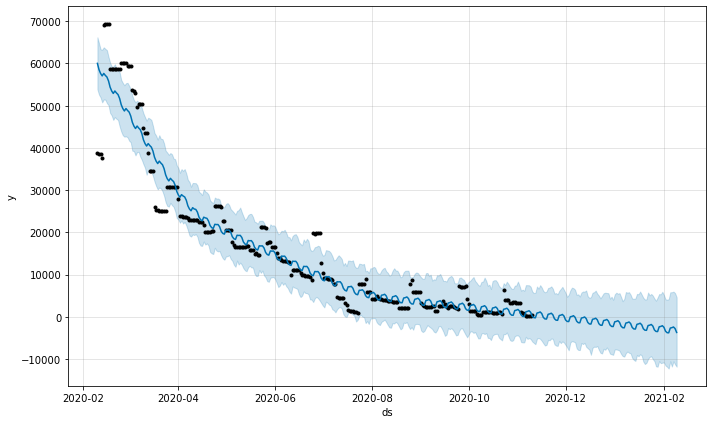

In [676]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [677]:
"""
Como podemos ver la prediccion temporal que hace con respecto a los datos con losq ha sido entrenado es bastante sensata
"""

'\nComo podemos ver la prediccion temporal que hace con respecto a los datos con losq ha sido entrenado es bastante sensata\n'

Total MAE: 3585.614
Total MSE: 25049141.183
Total RMSE: 5004.912


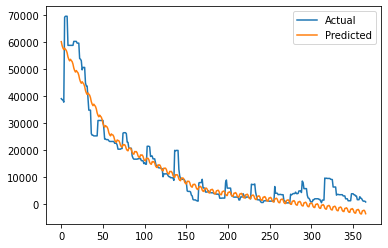

In [679]:
# calculate MAE between expected and predicted values for december
y_true = prophet_last_year_df['y'][:].values
y_pred = forecast_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Total MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Total MSE: %.3f' % test_score)
print('Total RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [680]:
"""
Como vemos la prediccion es bastante sentsate y comienza el dia 275 y la prediccion se separa del datos real porque los datos
reales tienen repentinas subidas de varios miles de euros q el modelo no puede predecir.

prophet - desde 2020-09-11 al 2020-11-10 con prediccion in-sample sobre datos de training q SI ha visto
training desde 2020-02-10 hasta 2020-11-10 
Train MAE: 1485.113
Train RMSE: 1914.941
Train MSE: 3667000.161

prophet - desde 2020-11-11 al 2021-02-09 con prediccion in-sample sobre datos de test q NO ha visto
training desde 2020-02-10 hasta 2020-11-10 
Test MAE: 4908.521
Test RMSE: 5589.492
Test MSE: 31242425.352

prophet - desde 2020-02-10 al 2021-02-09 con prediccion in-out-sample sobre de training q SI ha visto y datos de test q NO ha 
visto
training desde 2020-02-10 hasta 2020-11-10 
Test MAE: 3585.614
Test MSE: 5004.183
Test RMSE: 25049141.183

Persistence Baseline - desde 2020-11-11 al 2021-02-09 sobre datos de test
Test MAE: 	519.943
Test RMSE: 	1250.879
Test MSE: 	1564697.169
"""

'\nComo vemos la prediccion es bastante sentsate y comienza el dia 275 y la prediccion se seara del datos real porque los datos\nreales tiene repentinas subidas de varios miles de euros q el modelo no puede predecir.\n\nprophet - desde 2020-09-11 al 2020-11-10 con prediccion in-sample sobre datos de training q SI ha visto\ntraining desde 2020-02-10 hasta 2020-11-10 \nTrain MAE: 1485.113\nTrain RMSE: 1914.941\nTrain MSE: 3667000.161\n\nprophet - desde 2020-11-11 al 2021-02-09 con prediccion in-sample sobre datos de test q NO ha visto\ntraining desde 2020-02-10 hasta 2020-11-10 \nTest MAE: 4908.521\nTest RMSE: 5589.492\nTest MSE: 31242425.352\n\nprophet - desde 2020-02-10 al 2021-02-09 con prediccion in-out-sample sobre de training q SI ha visto y datos de test q NO ha visto\ntraining desde 2020-02-10 hasta 2020-11-10 \nTest MAE: 3585.614\nTest MSE: 5004.183\nTest RMSE: 25049141.183\n\nPersistence Baseline - desde 2020-11-11 al 2021-02-09 sobre datos de test\nTest MAE: \t519.943\nTest RM

In [681]:
prophet_last_year_df

,ds,y
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


In [684]:
prophet_last_year_df.index[prophet_last_year_df['ds'] == '2020-02-10']

Int64Index([0], dtype='int64')

In [685]:
prophet_last_year_df.index[prophet_last_year_df['ds'] == '2020-11-10']

Int64Index([274], dtype='int64')

In [687]:
# split into train and test sets
X = prophet_last_year_df.values
train_size = 275
train, test = X[:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [688]:
train_X.shape, train_y.shape

((275,), (275,))

In [689]:
test_X.shape, test_y.shape

((91,), (91,))

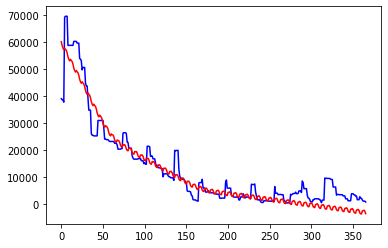

In [690]:
# plot predictions vs expected
pyplot.plot(y_true, color='blue') # y en test - en azul
pyplot.plot(y_pred, color='red') # y en predictions - en rojo
pyplot.show()

In [691]:
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-10,60022.815170,53858.991504,66212.990999
1,2020-02-11,58550.049383,52633.371796,64829.382954
2,2020-02-12,57644.381726,51965.978935,63372.701161
3,2020-02-13,57064.104561,50787.015733,63254.034030
4,2020-02-14,57644.910516,51477.934840,63828.889904
...,...,...,...,...
361,2021-02-05,-2639.394291,-10499.236760,5822.749025
362,2021-02-06,-2555.986196,-11768.607167,5842.443460
363,2021-02-07,-2388.569702,-10506.953947,5990.367412
364,2021-02-08,-2761.102443,-11222.477849,5642.438107


In [692]:
forecast_unseen_df=forecast_df[275:]

In [693]:
forecast_unseen_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
275,2020-11-11,605.750772,-6161.492358,5637.912829,605.750772,605.750772,-791.322256,-791.322256,-791.322256,-791.322256,-791.322256,-791.322256,0.0,0.0,0.0,-185.571484
276,2020-11-12,563.417538,-6469.699236,5729.588570,563.417538,563.417538,-778.446146,-778.446146,-778.446146,-778.446146,-778.446146,-778.446146,0.0,0.0,0.0,-215.028608
277,2020-11-13,521.084303,-5140.227514,7204.790299,516.643011,524.239942,395.513085,395.513085,395.513085,395.513085,395.513085,395.513085,0.0,0.0,0.0,916.597388
278,2020-11-14,478.751069,-5001.925232,6684.986119,463.599617,490.831227,521.254414,521.254414,521.254414,521.254414,521.254414,521.254414,0.0,0.0,0.0,1000.005483
279,2020-11-15,436.417835,-5214.198464,7517.907282,408.708752,464.404699,731.004143,731.004143,731.004143,731.004143,731.004143,731.004143,0.0,0.0,0.0,1167.421977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021-02-05,-3034.907376,-10499.236760,5822.749025,-8866.225967,2098.203992,395.513085,395.513085,395.513085,395.513085,395.513085,395.513085,0.0,0.0,0.0,-2639.394291
362,2021-02-06,-3077.240610,-11768.607167,5842.443460,-8984.557713,2134.023883,521.254414,521.254414,521.254414,521.254414,521.254414,521.254414,0.0,0.0,0.0,-2555.986196
363,2021-02-07,-3119.573844,-10506.953947,5990.367412,-9104.816905,2176.162159,731.004143,731.004143,731.004143,731.004143,731.004143,731.004143,0.0,0.0,0.0,-2388.569702
364,2021-02-08,-3161.907079,-11222.477849,5642.438107,-9248.498782,2216.745056,400.804635,400.804635,400.804635,400.804635,400.804635,400.804635,0.0,0.0,0.0,-2761.102443


In [694]:
y_unseen_pred = forecast_unseen_df['yhat'].values

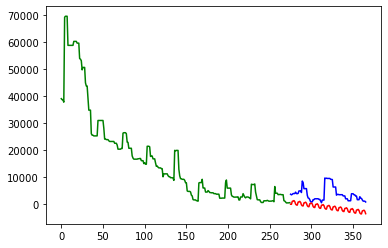

In [695]:
# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in y_unseen_pred], color='red') # y en predictions - en rojo
pyplot.show()

In [1580]:
"""
AHORA VAMOS A HACER PREDICCION SEMANALIZADA.
VAMOS A HACER MEDIA SALDO DATAFRAME POR SEMANAS
"""

'\nAHORA VAMOS A HACER PREDICCION SEMANALIZADA.\nVAMOS A HACER MEDIA SALDO DATAFRAME POR SEMANAS\n'

In [811]:
prophet_last_year_df = read_csv('balance_last_year.csv', header=0, parse_dates=True, index_col=None, squeeze=False)

In [812]:
prophet_last_year_df

,DATE,BALANCE
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


In [813]:
# Convert the date strings to date time datatype

In [814]:
prophet_last_year_weekly_df=prophet_last_year_df

In [815]:
prophet_last_year_weekly_df.dtypes

DATE        object
BALANCE    float64
dtype: object

In [816]:
prophet_last_year_weekly_df['DATE'] = to_datetime(prophet_last_year_weekly_df['DATE'])

In [817]:
prophet_last_year_weekly_df.dtypes

DATE       datetime64[ns]
BALANCE           float64
dtype: object

In [818]:
prophet_last_year_weekly_df

,DATE,BALANCE
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


In [819]:
# Using a lambda function on apply.() to separate the year, month, day components

In [820]:
prophet_last_year_weekly_df['DATE'].apply(lambda prophet_last_year_weekly_df: \
                                        datetime(year=prophet_last_year_weekly_df.year, \
                                                          month=prophet_last_year_weekly_df.month, \
                                                          day=prophet_last_year_weekly_df.day))

0     2020-02-10
1     2020-02-11
2     2020-02-12
3     2020-02-13
4     2020-02-14
         ...    
361   2021-02-05
362   2021-02-06
363   2021-02-07
364   2021-02-08
365   2021-02-09
Name: DATE, Length: 366, dtype: datetime64[ns]

In [821]:
prophet_last_year_weekly_df

,DATE,BALANCE
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


In [822]:
# Set the date as the index

In [823]:
prophet_last_year_weekly_df.index

RangeIndex(start=0, stop=366, step=1)

In [824]:
prophet_last_year_weekly_df.dtypes

DATE       datetime64[ns]
BALANCE           float64
dtype: object

In [825]:
# convert the column (if it's a string) to datetime type
datetime_series = to_datetime(prophet_last_year_weekly_df['DATE'])

In [826]:
datetime_series

0     2020-02-10
1     2020-02-11
2     2020-02-12
3     2020-02-13
4     2020-02-14
         ...    
361   2021-02-05
362   2021-02-06
363   2021-02-07
364   2021-02-08
365   2021-02-09
Name: DATE, Length: 366, dtype: datetime64[ns]

In [827]:
datetime_series.dtypes

dtype('<M8[ns]')

In [828]:
type(datetime_series)

pandas.core.series.Series

In [829]:
# create datetime index passing the datetime series
datetime_index = DatetimeIndex(datetime_series.values)

In [830]:
datetime_index

DatetimeIndex(['2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19',
               ...
               '2021-01-31', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07',
               '2021-02-08', '2021-02-09'],
              dtype='datetime64[ns]', length=366, freq=None)

In [831]:
prophet_last_year_weekly_df=prophet_last_year_weekly_df.set_index(datetime_index)

In [832]:
prophet_last_year_weekly_df

,DATE,BALANCE
2020-02-10,2020-02-10,38916.48
2020-02-11,2020-02-11,38531.84
2020-02-12,2020-02-12,38531.84
2020-02-13,2020-02-13,37612.52
2020-02-14,2020-02-14,69074.92
...,...,...
2021-02-05,2021-02-05,1407.45
2021-02-06,2021-02-06,956.59
2021-02-07,2021-02-07,956.59
2021-02-08,2021-02-08,956.59


In [833]:
prophet_last_year_weekly_df.dtypes

DATE       datetime64[ns]
BALANCE           float64
dtype: object

In [834]:
# we don't need the column DATE anymore
prophet_last_year_weekly_df.drop('DATE', axis=1, inplace=True)

In [835]:
prophet_last_year_weekly_df

,BALANCE
2020-02-10,38916.48
2020-02-11,38531.84
2020-02-12,38531.84
2020-02-13,37612.52
2020-02-14,69074.92
...,...
2021-02-05,1407.45
2021-02-06,956.59
2021-02-07,956.59
2021-02-08,956.59


In [836]:
prophet_last_year_weekly_df.index

DatetimeIndex(['2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19',
               ...
               '2021-01-31', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07',
               '2021-02-08', '2021-02-09'],
              dtype='datetime64[ns]', length=366, freq=None)

In [837]:
# Using resample() method to aggregate by weeks and add mean() to take the average

In [838]:
prophet_last_year_weekly_df = prophet_last_year_weekly_df['BALANCE'].resample('W').mean()

In [839]:
prophet_last_year_weekly_df

2020-02-16    51648.717143
2020-02-23    60192.338571
2020-03-01    59730.255714
2020-03-08    52900.910000
2020-03-15    41518.074286
2020-03-22    26672.314286
2020-03-29    29202.784286
2020-04-05    26428.320000
2020-04-12    23193.440000
2020-04-19    21774.537143
2020-04-26    22868.655714
2020-05-03    22775.012857
2020-05-10    17317.428571
2020-05-17    16460.658571
2020-05-24    16833.114286
2020-05-31    18348.968571
2020-06-07    14238.664286
2020-06-14    11775.541429
2020-06-21    10270.341429
2020-06-28    15237.572857
2020-07-05    11347.770000
2020-07-12     6735.020000
2020-07-19     2770.215714
2020-07-26     3993.122857
2020-08-02     6142.652857
2020-08-09     4306.047143
2020-08-16     3700.190000
2020-08-23     2283.318571
2020-08-30     5972.580000
2020-09-06     3116.608571
2020-09-13     2181.872857
2020-09-20     2707.355714
2020-09-27     4321.032857
2020-10-04     3732.202857
2020-10-11      826.628571
2020-10-18     1061.310000
2020-10-25     2581.747143
2

In [840]:
"""
lo que acabamos de hacer es calcular el saldo medio de cada semana y asginarselo a la fecha del ultimo dia de la semana que es
el domingo.
"""

'\nlo que acabamos de hacer es calcular el saldo medio de cada semana y asginarselo a la fecha del ultimo dia de la semana que es\nel domingo.\n'

In [841]:
type(prophet_last_year_weekly_df)

pandas.core.series.Series

In [842]:
prophet_last_year_weekly_ser=prophet_last_year_weekly_df

In [843]:
prophet_last_year_weekly_df=DataFrame(prophet_last_year_weekly_ser)

In [844]:
prophet_last_year_weekly_df

,BALANCE
2020-02-16,51648.717143
2020-02-23,60192.338571
2020-03-01,59730.255714
2020-03-08,52900.910000
2020-03-15,41518.074286
2020-03-22,26672.314286
2020-03-29,29202.784286
2020-04-05,26428.320000
2020-04-12,23193.440000
2020-04-19,21774.537143


In [846]:
prophet_last_year_weekly_df.shape

(53, 1)

In [847]:
"""
Vemos q tenemos 52 semanas completas y hasta el martes 9 de febrero de la semana 53
"""

'\nVemos q tenemos 52 semanas completas y hasta el martes 9 de febrero de la semana 53\n'

In [848]:
prophet_last_year_weekly_df.dtypes

BALANCE    float64
dtype: object

In [849]:
"""
Vamos a guardarnos este dataframe en un csv
"""

'\nVamos a guardarnos este dataframe en un csv\n'

In [850]:
prophet_last_year_weekly_df.to_csv(path_or_buf='prophet_last_year_weekly.csv')

In [851]:
"""
a continuacion rehacemos las predicciones del dataframe semanalizado con prophet
"""

'\na continuacion rehacemos las predicciones del dataframe semanalizado con prophet\n'

In [1258]:
# Time Series Forecasting With Prophet in Python
# https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [1340]:
# Load and Summarize Dataset

In [1404]:
# load data
prophet_last_year_weekly_df = read_csv('prophet_last_year_weekly.csv', header=0, parse_dates=True, index_col=0, squeeze=False)

In [1405]:
prophet_last_year_weekly_df.shape

(53, 1)

In [1406]:
prophet_last_year_weekly_df

,BALANCE
2020-02-16,51648.717143
2020-02-23,60192.338571
2020-03-01,59730.255714
2020-03-08,52900.910000
2020-03-15,41518.074286
2020-03-22,26672.314286
2020-03-29,29202.784286
2020-04-05,26428.320000
2020-04-12,23193.440000
2020-04-19,21774.537143


In [1407]:
prophet_last_year_weekly_df.columns

Index(['BALANCE'], dtype='object')

In [1408]:
prophet_last_year_weekly_df.dtypes

BALANCE    float64
dtype: object

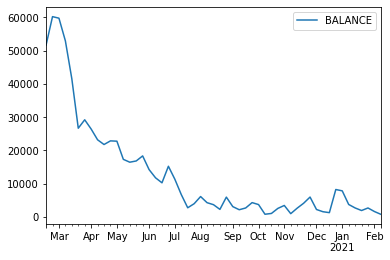

In [1409]:
prophet_last_year_weekly_df.plot()
pyplot.show()

In [1410]:
prophet_last_year_df = read_csv('balance_last_year.csv', header=0, parse_dates=True, index_col=None, squeeze=False)

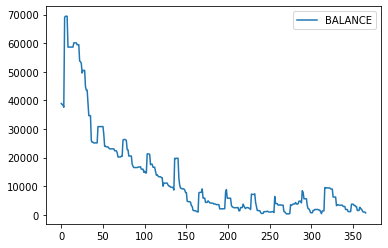

In [1411]:
prophet_last_year_df.plot()
pyplot.show()

In [1412]:
"""
Vemos que el plot semanalizado sale igual que el diario pero más suavizado
"""

'\nVemos que el plot semanalizado sale igual que el diario pero más suavizado\n'

In [1413]:
del(prophet_last_year_df)

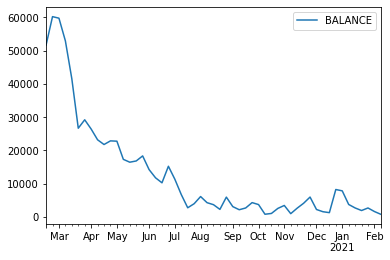

In [1414]:
prophet_last_year_weekly_df.plot()
pyplot.show()

In [1415]:
# Forecast Car Sales With Prophet

In [1416]:
# Forecast Car Sales With Prophet

In [1417]:
prophet_last_year_weekly_df.reset_index(level=0, inplace=True)

In [1418]:
prophet_last_year_weekly_df

,index,BALANCE
0,2020-02-16,51648.717143
1,2020-02-23,60192.338571
2,2020-03-01,59730.255714
3,2020-03-08,52900.910000
4,2020-03-15,41518.074286
5,2020-03-22,26672.314286
6,2020-03-29,29202.784286
7,2020-04-05,26428.320000
8,2020-04-12,23193.440000
9,2020-04-19,21774.537143


In [1419]:
# prepare expected column names
prophet_last_year_weekly_df.columns = ['ds', 'y']

In [1420]:
prophet_last_year_weekly_df

,ds,y
0,2020-02-16,51648.717143
1,2020-02-23,60192.338571
2,2020-03-01,59730.255714
3,2020-03-08,52900.910000
4,2020-03-15,41518.074286
5,2020-03-22,26672.314286
6,2020-03-29,29202.784286
7,2020-04-05,26428.320000
8,2020-04-12,23193.440000
9,2020-04-19,21774.537143


In [1421]:
prophet_last_year_weekly_df['ds']= to_datetime(prophet_last_year_weekly_df['ds'])

In [1422]:
prophet_last_year_weekly_df

,ds,y
0,2020-02-16,51648.717143
1,2020-02-23,60192.338571
2,2020-03-01,59730.255714
3,2020-03-08,52900.910000
4,2020-03-15,41518.074286
5,2020-03-22,26672.314286
6,2020-03-29,29202.784286
7,2020-04-05,26428.320000
8,2020-04-12,23193.440000
9,2020-04-19,21774.537143


In [1423]:
prophet_last_year_weekly_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [1424]:
"""
cuando estimábamos por dias el dataframe de train iba del 2020-02-10 al 2020-11-10
y el dataframe de test iba del 2020-11-11 al 2021-02-09
"""

'\ncuando estimábamos por dias el dataframe de train iba del 2020-02-10 al 2020-11-10\ny el dataframe de test iba del 2020-11-11 al 2021-02-09\n'

In [1425]:
# A continuacion vamos a obtener un dataframe de train desde 2020-02-16 hasta 2020-11-15
# y un dataframe de test desde 2020-11-22 hasta 2021-02-14

In [1426]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['ds'] == '2020-02-16']

Int64Index([0], dtype='int64')

In [1427]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['ds'] == '2020-11-15']

Int64Index([39], dtype='int64')

In [1428]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['ds'] == '2020-11-22']

Int64Index([40], dtype='int64')

In [1429]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['ds'] == '2021-02-14']

Int64Index([52], dtype='int64')

In [1430]:
prophet_train_df = prophet_last_year_weekly_df.iloc[:40,:]

In [1431]:
prophet_train_df

,ds,y
0,2020-02-16,51648.717143
1,2020-02-23,60192.338571
2,2020-03-01,59730.255714
3,2020-03-08,52900.910000
4,2020-03-15,41518.074286
5,2020-03-22,26672.314286
6,2020-03-29,29202.784286
7,2020-04-05,26428.320000
8,2020-04-12,23193.440000
9,2020-04-19,21774.537143


In [1432]:
prophet_test_df = prophet_last_year_weekly_df.iloc[40:,:]

In [1433]:
prophet_test_df

,ds,y
40,2020-11-22,4123.331429
41,2020-11-29,5989.834286
42,2020-12-06,2253.970000
43,2020-12-13,1583.811429
44,2020-12-20,1306.717143
45,2020-12-27,8257.367143
46,2021-01-03,7854.777143
47,2021-01-10,3762.627143
48,2021-01-17,2716.428571
49,2021-01-24,1943.791429


In [1434]:
prophet_train_df.shape, prophet_test_df.shape

((40, 2), (13, 2))

In [1435]:
"""
vemos que aproximadamente vamos a predecir 3 meses de datos que son 12 semanas (nosotros 13 semanas)
"""

'\nvemos que aproximadamente vamos a predecir 3 meses de datos que son 12 semanas (nosotros 13 semanas)\n'

In [1436]:
# fit prophet model on the car sales dataset

# define the model
model = Prophet()
# fit the model
model.fit(prophet_train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1204]:
"""
SI EJECUTAMOS ASI EL MODELO TIENE MUCHISIMO OVERFITTING

# fit prophet model on the car sales dataset

# define the model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
# fit the model
model.fit(prophet_train_df)
"""

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1339]:
"""
SI EJECUTAMOS ASI EL MODELO TIENE MUCHISIMO OVERFITTING --> SALE EXACTAMENTE IGUAL QUE ANTES

# fit prophet model on the car sales dataset

# define the model
model = Prophet(yearly_seasonality=True)
# fit the model
model.fit(prophet_train_df)
"""

'\nSI EJECUTAMOS ASI EL MODELO TIENE MUCHISIMO OVERFITTING --> SALE EXACTAMENTE IGUAL QUE ANTES\n\n# fit prophet model on the car sales dataset\n\n# define the model\nmodel = Prophet(yearly_seasonality=True)\n# fit the model\nmodel.fit(prophet_train_df)\n'

In [1373]:
"""
SI EJECUTAMOS ASI SALE IGUAL DE MAL QUE CUANDO NO HABILITABAMOS NINGUNA SEASONALITY: APROXIMA POR UNA RECTA
# fit prophet model on the car sales dataset

# define the model
model = Prophet(weekly_seasonality=True)
# fit the model
model.fit(prophet_train_df)
"""

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1437]:
# Make an In-Sample Forecast

In [1438]:
"""
con la prediccion diaria hicimos el in-sample forecast desde 2020-08-11 hasta 2020-11-10
con la prediccion mensual haremos forecast desde 2020-08-23 hasta 2020-11-15
"""

'\ncon la prediccion diaria hicimos el in-sample forecast desde 2020-08-11 hasta 2020-11-10\ncon la prediccion mensual haremos forecast desde 2020-08-23 hasta 2020-11-15\n'

In [1439]:
prophet_train_df

,ds,y
0,2020-02-16,51648.717143
1,2020-02-23,60192.338571
2,2020-03-01,59730.255714
3,2020-03-08,52900.910000
4,2020-03-15,41518.074286
5,2020-03-22,26672.314286
6,2020-03-29,29202.784286
7,2020-04-05,26428.320000
8,2020-04-12,23193.440000
9,2020-04-19,21774.537143


In [1440]:
prophet_train_df.index[prophet_train_df['ds'] == '2020-08-23']

Int64Index([27], dtype='int64')

In [1441]:
prophet_train_df.index[prophet_train_df['ds'] == '2020-11-15']

Int64Index([39], dtype='int64')

In [1442]:
future_in_sample_df=prophet_train_df.iloc[27:,:]

In [1443]:
future_in_sample_df

,ds,y
27,2020-08-23,2283.318571
28,2020-08-30,5972.580000
29,2020-09-06,3116.608571
30,2020-09-13,2181.872857
31,2020-09-20,2707.355714
32,2020-09-27,4321.032857
33,2020-10-04,3732.202857
34,2020-10-11,826.628571
35,2020-10-18,1061.310000
36,2020-10-25,2581.747143


In [1444]:
future_in_sample_df.shape

(13, 2)

In [1445]:
"""
vemos que, como antes, aproximadamente vamos a predecir 3 meses de datos que son 12 semanas (nosotros 13 semanas)
"""

'\nvemos que, como antes, aproximadamente vamos a predecir 3 meses de datos que son 12 semanas (nosotros 13 semanas)\n'

In [1446]:
future_in_sample_df=future_in_sample_df.drop(['y'], axis = 1)

In [1447]:
future_in_sample_df

,ds
27,2020-08-23
28,2020-08-30
29,2020-09-06
30,2020-09-13
31,2020-09-20
32,2020-09-27
33,2020-10-04
34,2020-10-11
35,2020-10-18
36,2020-10-25


In [1448]:
future_in_sample_df.reset_index(level=0, inplace=True)

In [1449]:
future_in_sample_df

,index,ds
0,27,2020-08-23
1,28,2020-08-30
2,29,2020-09-06
3,30,2020-09-13
4,31,2020-09-20
5,32,2020-09-27
6,33,2020-10-04
7,34,2020-10-11
8,35,2020-10-18
9,36,2020-10-25


In [1450]:
future_in_sample_df=future_in_sample_df.drop(['index'], axis = 1)

In [1451]:
future_in_sample_df

,ds
0,2020-08-23
1,2020-08-30
2,2020-09-06
3,2020-09-13
4,2020-09-20
5,2020-09-27
6,2020-10-04
7,2020-10-11
8,2020-10-18
9,2020-10-25


In [1452]:
future_in_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [1453]:
future_in_sample_df['ds']=to_datetime(future_in_sample_df['ds'])

In [1454]:
future_in_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [1455]:
# use the model to make a forecast
forecast_df = model.predict(future_in_sample_df)

In [1456]:
"""
The result of the predict() function is a DataFrame that contains many columns. Perhaps the most important columns are the
forecast date time (‘ds‘), the forecasted value (‘yhat‘), and the lower and upper bounds on the predicted value (‘yhat_lower‘
and ‘yhat_upper‘) that provide uncertainty of the forecast.
"""

'\nThe result of the predict() function is a DataFrame that contains many columns. Perhaps the most important columns are the\nforecast date time (‘ds‘), the forecasted value (‘yhat‘), and the lower and upper bounds on the predicted value (‘yhat_lower‘\nand ‘yhat_upper‘) that provide uncertainty of the forecast.\n'

In [1457]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-08-23,6495.192293,-4036.389455,16919.234742,6495.192293,6495.192293,0.0,0.0,0.0,0.0,0.0,0.0,6495.192293
1,2020-08-30,5250.144009,-5140.224919,14972.788257,5250.144009,5250.144009,0.0,0.0,0.0,0.0,0.0,0.0,5250.144009
2,2020-09-06,4005.095724,-5077.089939,14101.040095,4005.095724,4005.095724,0.0,0.0,0.0,0.0,0.0,0.0,4005.095724
3,2020-09-13,2760.047443,-7577.129504,13126.390371,2760.047443,2760.047443,0.0,0.0,0.0,0.0,0.0,0.0,2760.047443
4,2020-09-20,1514.999175,-8628.672102,12487.352293,1514.999175,1514.999175,0.0,0.0,0.0,0.0,0.0,0.0,1514.999175
5,2020-09-27,269.950913,-10123.270101,10867.794608,269.950913,269.950913,0.0,0.0,0.0,0.0,0.0,0.0,269.950913
6,2020-10-04,-975.097349,-11769.204433,9582.520316,-975.097349,-975.097349,0.0,0.0,0.0,0.0,0.0,0.0,-975.097349
7,2020-10-11,-2220.145611,-12520.700460,6955.311288,-2220.145611,-2220.145611,0.0,0.0,0.0,0.0,0.0,0.0,-2220.145611
8,2020-10-18,-3465.193874,-13180.203874,6479.672242,-3465.193874,-3465.193874,0.0,0.0,0.0,0.0,0.0,0.0,-3465.193874
9,2020-10-25,-4710.242136,-15439.189795,5487.231213,-4710.242136,-4710.242136,0.0,0.0,0.0,0.0,0.0,0.0,-4710.242136


In [1458]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds         yhat    yhat_lower    yhat_upper
0  2020-08-23  6495.192293  -4036.389455  16919.234742
1  2020-08-30  5250.144009  -5140.224919  14972.788257
2  2020-09-06  4005.095724  -5077.089939  14101.040095
3  2020-09-13  2760.047443  -7577.129504  13126.390371
4  2020-09-20  1514.999175  -8628.672102  12487.352293
5  2020-09-27   269.950913 -10123.270101  10867.794608
6  2020-10-04  -975.097349 -11769.204433   9582.520316
7  2020-10-11 -2220.145611 -12520.700460   6955.311288
8  2020-10-18 -3465.193874 -13180.203874   6479.672242
9  2020-10-25 -4710.242136 -15439.189795   5487.231213
10 2020-11-01 -5955.290398 -16157.508487   5518.554111
11 2020-11-08 -7200.338660 -17485.417000   2937.482422
12 2020-11-15 -8445.386922 -18235.084368   1279.004010


In [1459]:
"""
Prophet also provides a built-in tool for visualizing the prediction in the context of the training dataset.

This can be achieved by calling the plot() function on the model and passing it a result DataFrame.
It will create a plot of the training dataset and overlay the prediction with the upper and lower bounds for the forecast dates.
"""

'\nProphet also provides a built-in tool for visualizing the prediction in the context of the training dataset.\n\nThis can be achieved by calling the plot() function on the model and passing it a result DataFrame.\nIt will create a plot of the training dataset and overlay the prediction with the upper and lower bounds for the forecast dates.\n'

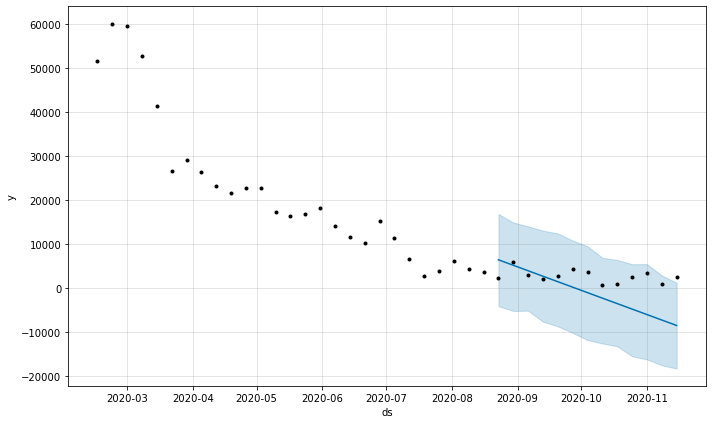

In [1460]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [1461]:
# Manually Evaluate Forecast Model

In [1462]:
evaluate_in_sample_df=prophet_train_df.iloc[27:,:]

In [1463]:
evaluate_in_sample_df.reset_index(level=0, inplace=True)

In [1464]:
evaluate_in_sample_df=evaluate_in_sample_df.drop(['index'], axis = 1)

In [1465]:
evaluate_in_sample_df

,ds,y
0,2020-08-23,2283.318571
1,2020-08-30,5972.580000
2,2020-09-06,3116.608571
3,2020-09-13,2181.872857
4,2020-09-20,2707.355714
5,2020-09-27,4321.032857
6,2020-10-04,3732.202857
7,2020-10-11,826.628571
8,2020-10-18,1061.310000
9,2020-10-25,2581.747143


Train MAE: 4610.438
Train MSE: 32421364.123
Train RMSE: 5693.976


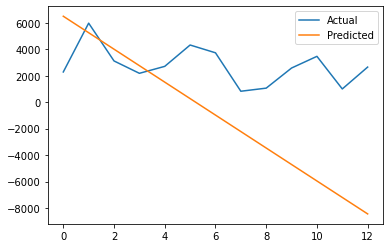

In [1466]:
# calculate MAE between expected and predicted values for december
y_true = evaluate_in_sample_df['y'][:].values
y_pred = forecast_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Train MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Train MSE: %.3f' % test_score)
print('Train RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [1467]:
"""
SEMANALIZADO

prophet - desde 2020-08-23 al 2020-11-15 con prediccion in-sample sobre datos de training q SI ha visto
training desde 2020-02-16 hasta 2020-11-15 
Train MAE: 4610.38
Train RMSE: 5693.976
Train MSE: 32421364.123
CONCLUSION: vemos que semanalizado sobre datos vistos hay un error marror que al predecir sobre datset diario (Train MAE: 1485.113 DIARIO)

Persistence Baseline DIARIO - desde 2020-11-11 al 2021-02-09 sobre datos de test
Test MAE: 	519.943
Test RMSE: 	1250.879
Test MSE: 	1564697.169
"""

'\nSEMANALIZADO\n\nprophet - desde 2020-08-23 al 2020-11-15 con prediccion in-sample sobre datos de training q SI ha visto\ntraining desde 2020-02-16 hasta 2020-11-15 \nTrain MAE: 4610.38\nTrain RMSE: 5693.976\nTrain MSE: 32421364.123\nCONCLUSION: vemos que semanalizado sobre datos vistos hay un error marror que al predecir sobre datset diario (Train MAE: 1485.113 DIARIO)\n\nPersistence Baseline DIARIO - desde 2020-11-11 al 2021-02-09 sobre datos de test\nTest MAE: \t519.943\nTest RMSE: \t1250.879\nTest MSE: \t1564697.169\n'

In [1468]:
"""
A continuacion procedemos a la validacion final del modelo con los datos desde 2020-11-22 a 2021-02-14
"""

'\nA continuacion procedemos a la validacion final del modelo con los datos desde 2020-11-22 a 2021-02-14\n'

In [1469]:
# Make an Out-of-Sample Forecast

In [1470]:
prophet_test_df

,ds,y
40,2020-11-22,4123.331429
41,2020-11-29,5989.834286
42,2020-12-06,2253.970000
43,2020-12-13,1583.811429
44,2020-12-20,1306.717143
45,2020-12-27,8257.367143
46,2021-01-03,7854.777143
47,2021-01-10,3762.627143
48,2021-01-17,2716.428571
49,2021-01-24,1943.791429


In [1471]:
future_out_sample_df=prophet_test_df

In [1472]:
future_out_sample_df

,ds,y
40,2020-11-22,4123.331429
41,2020-11-29,5989.834286
42,2020-12-06,2253.970000
43,2020-12-13,1583.811429
44,2020-12-20,1306.717143
45,2020-12-27,8257.367143
46,2021-01-03,7854.777143
47,2021-01-10,3762.627143
48,2021-01-17,2716.428571
49,2021-01-24,1943.791429


In [1473]:
future_out_sample_df=future_out_sample_df.drop(['y'], axis = 1)

In [1474]:
future_out_sample_df

,ds
40,2020-11-22
41,2020-11-29
42,2020-12-06
43,2020-12-13
44,2020-12-20
45,2020-12-27
46,2021-01-03
47,2021-01-10
48,2021-01-17
49,2021-01-24


In [1475]:
future_out_sample_df.reset_index(level=0, inplace=True)

In [1476]:
future_out_sample_df=future_out_sample_df.drop(['index'], axis = 1)

In [1477]:
future_out_sample_df

,ds
0,2020-11-22
1,2020-11-29
2,2020-12-06
3,2020-12-13
4,2020-12-20
5,2020-12-27
6,2021-01-03
7,2021-01-10
8,2021-01-17
9,2021-01-24


In [1478]:
future_out_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [1479]:
# use the model to make a forecast
forecast_df = model.predict(future_out_sample_df)

In [1480]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-22,-9690.435184,-20180.356338,816.896985,-9690.488123,-9690.394977,0.0,0.0,0.0,0.0,0.0,0.0,-9690.435184
1,2020-11-29,-10935.483447,-21391.443874,55.294316,-10935.681198,-10935.328941,0.0,0.0,0.0,0.0,0.0,0.0,-10935.483447
2,2020-12-06,-12180.531709,-22420.929484,-1802.400666,-12180.952254,-12180.221626,0.0,0.0,0.0,0.0,0.0,0.0,-12180.531709
3,2020-12-13,-13425.579971,-24232.679460,-3561.973738,-13426.198582,-13425.092747,0.0,0.0,0.0,0.0,0.0,0.0,-13425.579971
4,2020-12-20,-14670.628233,-25062.543778,-4379.931412,-14671.478713,-14669.912576,0.0,0.0,0.0,0.0,0.0,0.0,-14670.628233
5,2020-12-27,-15915.676495,-26165.327840,-6282.028903,-15916.766583,-15914.708224,0.0,0.0,0.0,0.0,0.0,0.0,-15915.676495
6,2021-01-03,-17160.724757,-27406.429051,-7370.270185,-17162.071235,-17159.516215,0.0,0.0,0.0,0.0,0.0,0.0,-17160.724757
7,2021-01-10,-18405.773020,-28421.929322,-8421.586355,-18407.487322,-18404.215831,0.0,0.0,0.0,0.0,0.0,0.0,-18405.773020
8,2021-01-17,-19650.821282,-29630.583954,-9429.899824,-19652.850304,-19648.934336,0.0,0.0,0.0,0.0,0.0,0.0,-19650.821282
9,2021-01-24,-20895.869544,-30975.416080,-11009.754960,-20898.224807,-20893.672642,0.0,0.0,0.0,0.0,0.0,0.0,-20895.869544


In [1481]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds          yhat    yhat_lower    yhat_upper
0  2020-11-22  -9690.435184 -20180.356338    816.896985
1  2020-11-29 -10935.483447 -21391.443874     55.294316
2  2020-12-06 -12180.531709 -22420.929484  -1802.400666
3  2020-12-13 -13425.579971 -24232.679460  -3561.973738
4  2020-12-20 -14670.628233 -25062.543778  -4379.931412
5  2020-12-27 -15915.676495 -26165.327840  -6282.028903
6  2021-01-03 -17160.724757 -27406.429051  -7370.270185
7  2021-01-10 -18405.773020 -28421.929322  -8421.586355
8  2021-01-17 -19650.821282 -29630.583954  -9429.899824
9  2021-01-24 -20895.869544 -30975.416080 -11009.754960
10 2021-01-31 -22140.917806 -32635.255773 -12117.968206
11 2021-02-07 -23385.966068 -33906.409823 -13268.513874
12 2021-02-14 -24631.014330 -34897.319464 -13879.693589


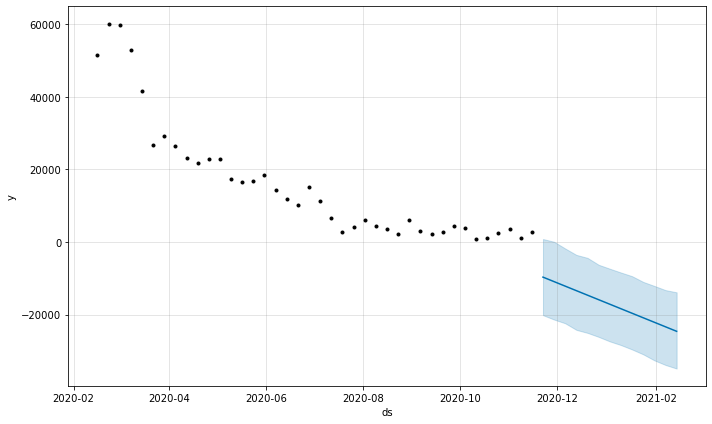

In [1482]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [1483]:
prophet_test_df

,ds,y
40,2020-11-22,4123.331429
41,2020-11-29,5989.834286
42,2020-12-06,2253.970000
43,2020-12-13,1583.811429
44,2020-12-20,1306.717143
45,2020-12-27,8257.367143
46,2021-01-03,7854.777143
47,2021-01-10,3762.627143
48,2021-01-17,2716.428571
49,2021-01-24,1943.791429


Train MAE: 20618.078
Train MSE: 444649649.971
Train RMSE: 21086.717


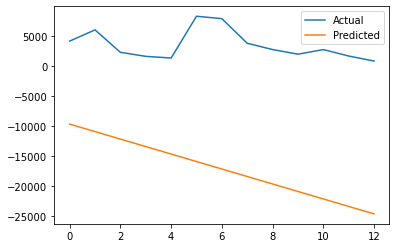

In [1484]:
# calculate MAE between expected and predicted values for december
y_true = prophet_test_df['y'][:].values
y_pred = forecast_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Train MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Train MSE: %.3f' % test_score)
print('Train RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [1485]:
"""
SEMANALIZADO

prophet - desde 2020-08-23 al 2020-11-15 con prediccion in-sample sobre datos de training q SI ha visto
training desde 2020-02-16 hasta 2020-11-15 
Train MAE: 4610.38
Train RMSE: 5693.976
Train MSE: 32421364.123
CONCLUSION: vemos que semanalizado sobre datos vistos hay un error marror que al predecir sobre dataset diario (Train MAE: 1485.113 DIARIO)

prophet - desde 2020-11-22 al 2021-02-14 con prediccion in-sample sobre datos de test q NO ha visto
training desde 2020-02-10 hasta 2020-11-10 
Test MAE: 20618.078
Test RMSE: 21086.717
Test MSE: 444649649.971
CONCLUSION: vemos que semanalizado sobre datos vistos hay un error marror que al predecir sobre dataset diario (Train MAE: 4908.521 DIARIO)

Persistence Baseline DIARIO - desde 2020-11-11 al 2021-02-09 sobre datos de test
Test MAE: 	519.943
Test RMSE: 	1250.879
Test MSE: 	1564697.169
"""

'\nSEMANALIZADO\n\nprophet - desde 2020-08-23 al 2020-11-15 con prediccion in-sample sobre datos de training q SI ha visto\ntraining desde 2020-02-16 hasta 2020-11-15 \nTrain MAE: 4610.38\nTrain RMSE: 5693.976\nTrain MSE: 32421364.123\nCONCLUSION: vemos que semanalizado sobre datos vistos hay un error marror que al predecir sobre dataset diario (Train MAE: 1485.113 DIARIO)\n\nprophet - desde 2020-11-22 al 2021-02-14 con prediccion in-sample sobre datos de test q NO ha visto\ntraining desde 2020-02-10 hasta 2020-11-10 \nTest MAE: 20618.078\nTest RMSE: 21086.717\nTest MSE: 444649649.971\nCONCLUSION: vemos que semanalizado sobre datos vistos hay un error marror que al predecir sobre dataset diario (Train MAE: 4908.521 DIARIO)\n\nPersistence Baseline DIARIO - desde 2020-11-11 al 2021-02-09 sobre datos de test\nTest MAE: \t519.943\nTest RMSE: \t1250.879\nTest MSE: \t1564697.169\n'

In [1486]:
"""
A continuacion vamos a plotear la prediccion junto al dataset completo para ver lo bien que hemos afinado dentro del conjunto
del contexto entero de datos.
"""

'\nA continuacion vamos a plotear la prediccion junto al dataset completo para ver lo bien que hemos afinado dentro del conjunto\ndel contexto entero de datos.\n'

In [1487]:
# Time Series Forecasting With Prophet in Python
# https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [1488]:
# Load and Summarize Dataset

In [1489]:
# load data
prophet_last_year_weekly_df = read_csv('prophet_last_year_weekly.csv', header=0, parse_dates=True, index_col=0, squeeze=False)

In [1490]:
prophet_last_year_weekly_df.shape

(53, 1)

In [1491]:
prophet_last_year_weekly_df

,BALANCE
2020-02-16,51648.717143
2020-02-23,60192.338571
2020-03-01,59730.255714
2020-03-08,52900.910000
2020-03-15,41518.074286
2020-03-22,26672.314286
2020-03-29,29202.784286
2020-04-05,26428.320000
2020-04-12,23193.440000
2020-04-19,21774.537143


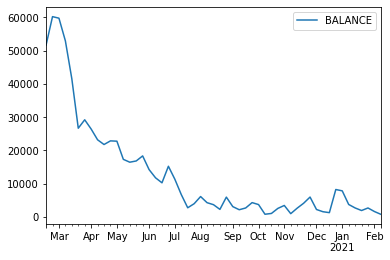

In [1492]:
prophet_last_year_weekly_df.plot()
pyplot.show()

In [1493]:
# prophet_last_year_weekly_df['DATE'] = prophet_last_year_weekly_df.index

In [1494]:
prophet_last_year_weekly_df.reset_index(level=0, inplace=True)

In [1495]:
prophet_last_year_weekly_df.head(10), prophet_last_year_weekly_df.tail(10)

(       index       BALANCE
 0 2020-02-16  51648.717143
 1 2020-02-23  60192.338571
 2 2020-03-01  59730.255714
 3 2020-03-08  52900.910000
 4 2020-03-15  41518.074286
 5 2020-03-22  26672.314286
 6 2020-03-29  29202.784286
 7 2020-04-05  26428.320000
 8 2020-04-12  23193.440000
 9 2020-04-19  21774.537143,
         index      BALANCE
 43 2020-12-13  1583.811429
 44 2020-12-20  1306.717143
 45 2020-12-27  8257.367143
 46 2021-01-03  7854.777143
 47 2021-01-10  3762.627143
 48 2021-01-17  2716.428571
 49 2021-01-24  1943.791429
 50 2021-01-31  2710.012857
 51 2021-02-07  1639.331429
 52 2021-02-14   803.590000)

In [1496]:
prophet_last_year_weekly_df=prophet_last_year_weekly_df.rename(columns={"index":"DATE"})

In [1497]:
prophet_last_year_weekly_df.head(10)

,DATE,BALANCE
0,2020-02-16,51648.717143
1,2020-02-23,60192.338571
2,2020-03-01,59730.255714
3,2020-03-08,52900.910000
4,2020-03-15,41518.074286
5,2020-03-22,26672.314286
6,2020-03-29,29202.784286
7,2020-04-05,26428.320000
8,2020-04-12,23193.440000
9,2020-04-19,21774.537143


In [1498]:
prophet_last_year_weekly_df.tail(10)

,DATE,BALANCE
43,2020-12-13,1583.811429
44,2020-12-20,1306.717143
45,2020-12-27,8257.367143
46,2021-01-03,7854.777143
47,2021-01-10,3762.627143
48,2021-01-17,2716.428571
49,2021-01-24,1943.791429
50,2021-01-31,2710.012857
51,2021-02-07,1639.331429
52,2021-02-14,803.590000


In [1499]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['DATE'] == '2020-02-16']

Int64Index([0], dtype='int64')

In [1500]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['DATE'] == '2020-11-15']

Int64Index([39], dtype='int64')

In [1501]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['DATE'] == '2020-11-22']

Int64Index([40], dtype='int64')

In [1502]:
prophet_last_year_weekly_df.index[-1]

52

In [1503]:
# split into train and test sets
X = prophet_last_year_weekly_df.values
train_size = 40
train, test = X[:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [1504]:
train_X, train_X.shape

(array([Timestamp('2020-02-16 00:00:00'), Timestamp('2020-02-23 00:00:00'),
        Timestamp('2020-03-01 00:00:00'), Timestamp('2020-03-08 00:00:00'),
        Timestamp('2020-03-15 00:00:00'), Timestamp('2020-03-22 00:00:00'),
        Timestamp('2020-03-29 00:00:00'), Timestamp('2020-04-05 00:00:00'),
        Timestamp('2020-04-12 00:00:00'), Timestamp('2020-04-19 00:00:00'),
        Timestamp('2020-04-26 00:00:00'), Timestamp('2020-05-03 00:00:00'),
        Timestamp('2020-05-10 00:00:00'), Timestamp('2020-05-17 00:00:00'),
        Timestamp('2020-05-24 00:00:00'), Timestamp('2020-05-31 00:00:00'),
        Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-14 00:00:00'),
        Timestamp('2020-06-21 00:00:00'), Timestamp('2020-06-28 00:00:00'),
        Timestamp('2020-07-05 00:00:00'), Timestamp('2020-07-12 00:00:00'),
        Timestamp('2020-07-19 00:00:00'), Timestamp('2020-07-26 00:00:00'),
        Timestamp('2020-08-02 00:00:00'), Timestamp('2020-08-09 00:00:00'),
        Time

In [1505]:
train_y, train_y.shape

(array([51648.71714285713, 60192.33857142856, 59730.25571428571,
        52900.91000000001, 41518.07428571429, 26672.31428571429,
        29202.78428571429, 26428.32, 23193.44, 21774.537142857145,
        22868.65571428572, 22775.012857142858, 17317.428571428572,
        16460.65857142858, 16833.11428571429, 18348.968571428577,
        14238.66428571429, 11775.541428571434, 10270.341428571435,
        15237.572857142866, 11347.77000000001, 6735.0200000000095,
        2770.2157142857272, 3993.122857142871, 6142.652857142871,
        4306.047142857156, 3700.190000000012, 2283.3185714285823,
        5972.580000000008, 3116.608571428577, 2181.8728571428605,
        2707.355714285722, 4321.032857142868, 3732.2028571428696,
        826.6285714285821, 1061.3100000000102, 2581.747142857156,
        3464.3185714285837, 1000.3000000000133, 2653.07714285716],
       dtype=object),
 (40,))

In [1506]:
test_X.shape, test_y.shape

((13,), (13,))

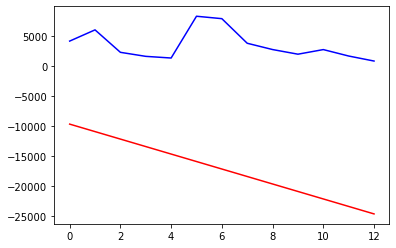

In [1507]:
# plot predictions vs expected
pyplot.plot(test_y, color='blue') # y en test - en azul
pyplot.plot(y_pred, color='red') # y en predictions - en rojo
pyplot.show()

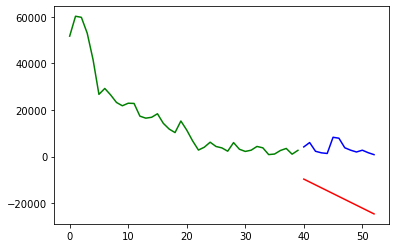

In [1508]:
# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in y_pred], color='red') # y en predictions - en rojo
pyplot.show()

In [1509]:
"""
Vemos que la prediccion semanalizada sale HORRIBLEMENTE PEOR que con respecto a la diaria
"""

'\nVemos que la prediccion semanalizada sale HORRIBLEMENTE PEOR que con respecto a la diaria\n'

In [1510]:
"""
A continuacion vamos a plotear la prediccion junto al dataset completo para ver lo bien que hemos afinado dentro del conjunto
del contexto entero de datos.
"""

'\nA continuacion vamos a plotear la prediccion junto al dataset completo para ver lo bien que hemos afinado dentro del conjunto\ndel contexto entero de datos.\n'

In [1511]:
# load the car sales dataset
# load data
prophet_last_year_weekly_df = read_csv('prophet_last_year_weekly.csv', header=0, parse_dates=True, index_col=0, squeeze=False)

In [1512]:
prophet_last_year_weekly_df.shape

(53, 1)

In [1513]:
prophet_last_year_weekly_df

,BALANCE
2020-02-16,51648.717143
2020-02-23,60192.338571
2020-03-01,59730.255714
2020-03-08,52900.910000
2020-03-15,41518.074286
2020-03-22,26672.314286
2020-03-29,29202.784286
2020-04-05,26428.320000
2020-04-12,23193.440000
2020-04-19,21774.537143


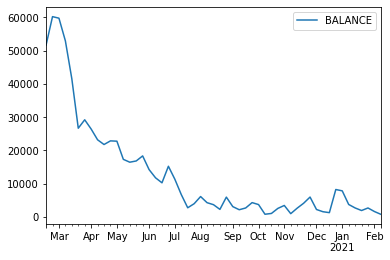

In [1514]:
prophet_last_year_weekly_df.plot()
pyplot.show()

In [1515]:
prophet_last_year_weekly_df.reset_index(level=0, inplace=True)

In [1516]:
prophet_last_year_weekly_df=prophet_last_year_weekly_df.rename(columns={"index":"DATE"})

In [1517]:
prophet_last_year_weekly_df

,DATE,BALANCE
0,2020-02-16,51648.717143
1,2020-02-23,60192.338571
2,2020-03-01,59730.255714
3,2020-03-08,52900.910000
4,2020-03-15,41518.074286
5,2020-03-22,26672.314286
6,2020-03-29,29202.784286
7,2020-04-05,26428.320000
8,2020-04-12,23193.440000
9,2020-04-19,21774.537143


In [1518]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['DATE'] == '2020-11-15']

Int64Index([39], dtype='int64')

In [1519]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['DATE'] == '2020-11-22']

Int64Index([40], dtype='int64')

In [1520]:
# split into train and test sets
X = prophet_last_year_weekly_df.values
train_size = 40
train, test = X[:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [1521]:
train_X.shape, train_y.shape

((40,), (40,))

In [1522]:
test_X.shape, test_y.shape

((13,), (13,))

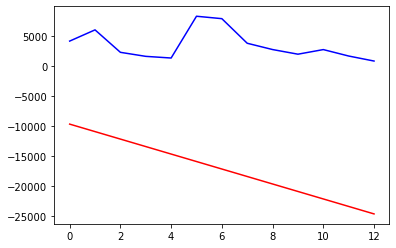

In [1523]:
# plot predictions vs expected
pyplot.plot(test_y, color='blue') # y en test - en azul
pyplot.plot(y_pred, color='red') # y en predictions - en rojo
pyplot.show()

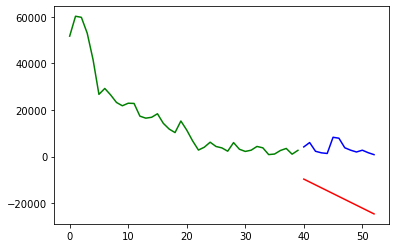

In [1524]:
# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in y_pred], color='red') # y en predictions - en rojo
pyplot.show()

In [1525]:
"""
observamos que PROPHET PREDICE HORRIBLEMENTE MAL EN EL DATASET SEMANALIZADO al tener muchos menos datos para entrenar
"""

'\nobservamos que PROPHET PREDICE HORRIBLEMENTE MAL EN EL DATASET SEMANALIZADO al tener muchos menos datos para entrenar\n'

In [1526]:
"""
Por ultimo vamos a hacer una prediccion con prophet para el dataset entero todo el año con el modelo entrenado hasta 2020-11-08
y vamos a representar valor real frente a predicho para poder ver de una manera más general lo bien o mal que aproxima prophet
"""

'\nPor ultimo vamos a hacer una prediccion con prophet para el dataset entero todo el año con el modelo entrenado hasta 2020-11-08\ny vamos a representar valor real frente a predicho para poder ver de una manera más general lo bien o mal que aproxima prophet\n'

In [1527]:
# load the car sales dataset
# load data
prophet_last_year_weekly_df = read_csv('prophet_last_year_weekly.csv', header=0, parse_dates=True, index_col=None, squeeze=False)

In [1528]:
prophet_last_year_weekly_df.shape

(53, 2)

In [1530]:
prophet_last_year_weekly_df.head()

,Unnamed: 0,BALANCE
0,2020-02-16,51648.717143
1,2020-02-23,60192.338571
2,2020-03-01,59730.255714
3,2020-03-08,52900.910000
4,2020-03-15,41518.074286


In [1531]:
prophet_last_year_weekly_df.tail()

,Unnamed: 0,BALANCE
48,2021-01-17,2716.428571
49,2021-01-24,1943.791429
50,2021-01-31,2710.012857
51,2021-02-07,1639.331429
52,2021-02-14,803.590000


In [1532]:
# prepare expected column names
prophet_last_year_weekly_df.columns = ['ds', 'y']

In [1533]:
prophet_last_year_weekly_df.head()

,ds,y
0,2020-02-16,51648.717143
1,2020-02-23,60192.338571
2,2020-03-01,59730.255714
3,2020-03-08,52900.910000
4,2020-03-15,41518.074286


In [1534]:
prophet_last_year_weekly_df.tail()

,ds,y
48,2021-01-17,2716.428571
49,2021-01-24,1943.791429
50,2021-01-31,2710.012857
51,2021-02-07,1639.331429
52,2021-02-14,803.590000


In [1535]:
prophet_last_year_weekly_df.dtypes

ds     object
y     float64
dtype: object

In [1536]:
prophet_last_year_weekly_df['ds']= to_datetime(prophet_last_year_weekly_df['ds'])

In [1537]:
prophet_last_year_weekly_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [1538]:
future_in_out_sample_df = prophet_last_year_weekly_df

In [1539]:
future_in_out_sample_df=future_in_out_sample_df.drop(['y'], axis = 1)

In [1540]:
future_in_out_sample_df.head()

,ds
0,2020-02-16
1,2020-02-23
2,2020-03-01
3,2020-03-08
4,2020-03-15


In [1541]:
future_in_out_sample_df.tail()

,ds
48,2021-01-17
49,2021-01-24
50,2021-01-31
51,2021-02-07
52,2021-02-14


In [1542]:
future_in_out_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [1543]:
# use the model to make a forecast
forecast_df = model.predict(future_in_out_sample_df)

In [1544]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-16,40157.827997,29301.810448,50455.583242,40157.827997,40157.827997,0.0,0.0,0.0,0.0,0.0,0.0,40157.827997
1,2020-02-23,38910.345780,28955.782035,49204.432884,38910.345780,38910.345780,0.0,0.0,0.0,0.0,0.0,0.0,38910.345780
2,2020-03-01,37662.863563,26934.586382,47901.422695,37662.863563,37662.863563,0.0,0.0,0.0,0.0,0.0,0.0,37662.863563
3,2020-03-08,36415.381341,26286.946954,46928.142758,36415.381341,36415.381341,0.0,0.0,0.0,0.0,0.0,0.0,36415.381341
4,2020-03-15,35167.899119,25107.965210,45664.396402,35167.899119,35167.899119,0.0,0.0,0.0,0.0,0.0,0.0,35167.899119
5,2020-03-22,33920.416894,23429.860812,44654.900504,33920.416894,33920.416894,0.0,0.0,0.0,0.0,0.0,0.0,33920.416894
6,2020-03-29,32672.934665,22559.206782,42215.115092,32672.934665,32672.934665,0.0,0.0,0.0,0.0,0.0,0.0,32672.934665
7,2020-04-05,31425.452449,20572.244535,42147.233890,31425.452449,31425.452449,0.0,0.0,0.0,0.0,0.0,0.0,31425.452449
8,2020-04-12,30177.970228,19594.069073,40815.765773,30177.970228,30177.970228,0.0,0.0,0.0,0.0,0.0,0.0,30177.970228
9,2020-04-19,28930.488007,19230.646103,39618.718581,28930.488007,28930.488007,0.0,0.0,0.0,0.0,0.0,0.0,28930.488007


In [1545]:
# summarize the forecast
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-16,40157.827997,29301.810448,50455.583242
1,2020-02-23,38910.345780,28955.782035,49204.432884
2,2020-03-01,37662.863563,26934.586382,47901.422695
3,2020-03-08,36415.381341,26286.946954,46928.142758
4,2020-03-15,35167.899119,25107.965210,45664.396402


In [1546]:
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
48,2021-01-17,-19650.821282,-29814.603436,-9727.761841
49,2021-01-24,-20895.869544,-31597.969202,-10287.732261
50,2021-01-31,-22140.917806,-32630.220403,-11869.579524
51,2021-02-07,-23385.966068,-34083.392996,-13148.045790
52,2021-02-14,-24631.014330,-35162.404058,-15055.327967


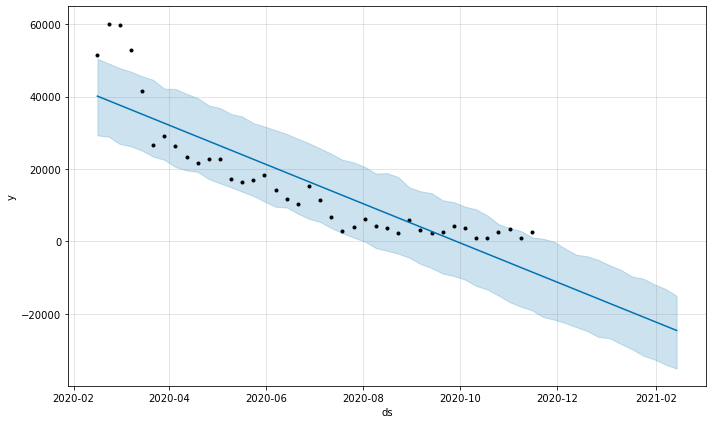

In [1547]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [1548]:
"""
predice con una linea recta lo cual es una prediccion horrible
"""

'\npredice con una linea recta lo cual es una prediccion horrible\n'

Total MAE: 10027.370
Total MSE: 158401499.135
Total RMSE: 12585.766


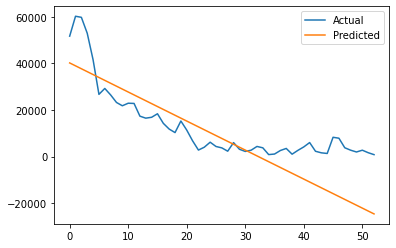

In [1549]:
# calculate MAE between expected and predicted values for december
y_true = prophet_last_year_weekly_df['y'][:].values
y_pred = forecast_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Total MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Total MSE: %.3f' % test_score)
print('Total RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [1550]:
"""
volvemos a repetir que predice con una linea recta lo cual es inadmisible.
es comprensible que lo haga asi pues con el modelizado diario entrenabamos con 270 observaciones para predecir 90
y con el modelizado mensual entrenamos con 40 observacions para predecir 13
"""

'\nvolvemos a repetir que predice con una linea recta lo cual es inadmisible.\nes comprensible que lo haga asi pues con el modelizado diario entrenabamos con 270 observaciones para predecir 90\ny con el modelizado mensual entrenamos con 40 observacions para predecir 13\n'

In [1552]:
prophet_last_year_weekly_df.head()

,ds,y
0,2020-02-16,51648.717143
1,2020-02-23,60192.338571
2,2020-03-01,59730.255714
3,2020-03-08,52900.910000
4,2020-03-15,41518.074286


In [1553]:
prophet_last_year_weekly_df.tail()

,ds,y
48,2021-01-17,2716.428571
49,2021-01-24,1943.791429
50,2021-01-31,2710.012857
51,2021-02-07,1639.331429
52,2021-02-14,803.590000


In [1554]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['ds'] == '2020-11-15']

Int64Index([39], dtype='int64')

In [1555]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['ds'] == '2020-11-22']

Int64Index([40], dtype='int64')

In [1556]:
# split into train and test sets
X = prophet_last_year_weekly_df.values
train_size = 40
train, test = X[:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [1557]:
train_X.shape, train_y.shape, type(train_X), type(train_y)

((40,), (40,), numpy.ndarray, numpy.ndarray)

In [1558]:
test_X.shape, test_y.shape, type(test_X), type(test_y)

((13,), (13,), numpy.ndarray, numpy.ndarray)

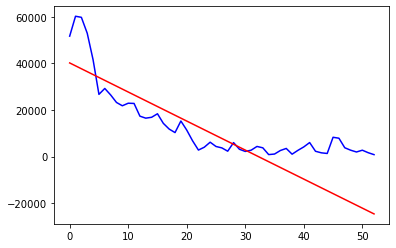

In [1559]:
# plot predictions vs expected
pyplot.plot(y_true, color='blue') # y en test - en azul
pyplot.plot(y_pred, color='red') # y en predictions - en rojo
pyplot.show()

In [1562]:
DataFrame(y_pred).head()

,0
0,40157.827997
1,38910.345780
2,37662.863563
3,36415.381341
4,35167.899119


In [1563]:
DataFrame(y_pred).tail()

,0
48,-19650.821282
49,-20895.869544
50,-22140.917806
51,-23385.966068
52,-24631.014330


In [1564]:
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-16,40157.827997,29301.810448,50455.583242
1,2020-02-23,38910.345780,28955.782035,49204.432884
2,2020-03-01,37662.863563,26934.586382,47901.422695
3,2020-03-08,36415.381341,26286.946954,46928.142758
4,2020-03-15,35167.899119,25107.965210,45664.396402
5,2020-03-22,33920.416894,23429.860812,44654.900504
6,2020-03-29,32672.934665,22559.206782,42215.115092
7,2020-04-05,31425.452449,20572.244535,42147.233890
8,2020-04-12,30177.970228,19594.069073,40815.765773
9,2020-04-19,28930.488007,19230.646103,39618.718581


In [1565]:
forecast_unseen_df=forecast_df[40:]

In [1566]:
forecast_unseen_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
40,2020-11-22,-9690.435184,-20889.108680,752.291649,-9690.479464,-9690.392132,0.0,0.0,0.0,0.0,0.0,0.0,-9690.435184
41,2020-11-29,-10935.483447,-21642.788385,-95.286950,-10935.642218,-10935.304929,0.0,0.0,0.0,0.0,0.0,0.0,-10935.483447
42,2020-12-06,-12180.531709,-22573.075376,-2019.452720,-12180.874865,-12180.168200,0.0,0.0,0.0,0.0,0.0,0.0,-12180.531709
43,2020-12-13,-13425.579971,-23736.326628,-3686.494113,-13426.141665,-13425.008343,0.0,0.0,0.0,0.0,0.0,0.0,-13425.579971
44,2020-12-20,-14670.628233,-24838.626283,-4147.518127,-14671.414670,-14669.777999,0.0,0.0,0.0,0.0,0.0,0.0,-14670.628233
45,2020-12-27,-15915.676495,-26457.005412,-5156.183842,-15916.720346,-15914.560957,0.0,0.0,0.0,0.0,0.0,0.0,-15915.676495
46,2021-01-03,-17160.724757,-26764.015050,-6621.371919,-17162.084099,-17159.251152,0.0,0.0,0.0,0.0,0.0,0.0,-17160.724757
47,2021-01-10,-18405.773020,-28386.698984,-7882.139242,-18407.450592,-18403.992292,0.0,0.0,0.0,0.0,0.0,0.0,-18405.773020
48,2021-01-17,-19650.821282,-29814.603436,-9727.761841,-19652.823500,-19648.705818,0.0,0.0,0.0,0.0,0.0,0.0,-19650.821282
49,2021-01-24,-20895.869544,-31597.969202,-10287.732261,-20898.195103,-20893.360097,0.0,0.0,0.0,0.0,0.0,0.0,-20895.869544


In [1567]:
y_unseen_pred = forecast_unseen_df['yhat'].values

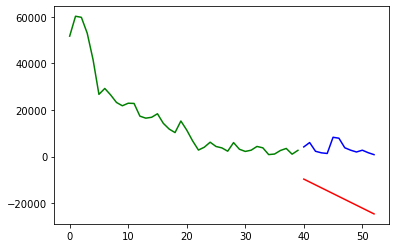

In [1570]:
# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in y_unseen_pred], color='red') # y en predictions - en rojo
pyplot.show()

In [1571]:
"""
CONCLUSION: la prediccion de prophet utilizando datos agregados por semanas es horrible ya que le estamos pidiendo que
prediga 13 observaciones entrenado con 40.

CONCLUSION: la predicciones de prophet utilizando datos agregados por dias es aceptable y le estamos pidiendo que
prediga 90 observaciones entrenando con 270.

CONCLUSION: si se quieren predicciones por semanas lo mejor que podemos hacer es obtener la prediccion por dias y luego 
calcular el dato medio de las predicciones por semana y presentar asi el resultado.
"""

'\nCONCLUSION: la prediccion de prophet utilizando datos agregados por semanas es horrible ya que le estamos pidiendo que\nprediga 13 observaciones entrenado con 40.\n\nCONCLUSION: la predicciones de prophet utilizando datos agregados por dias es aceptable y le estamos pidiendo que\nprediga 90 observaciones entrenando con 270.\n\nCONCLUSION: si se quieren predicciones por semanas lo mejor que podemos hacer es obtener la prediccion por dias y luego \ncalcular el dato medio de las predicciones por semana y presentar asi el resultado.\n'

In [1572]:
"""
De acuerdo a las conclusiones anteriores vamos a rescatar los datos reales por semana y los datos diarios predichos para
semanalizar las predicciones diarias y compararlos con los datos reales semanalizados
"""

'\nDe acuerdo a las conclusiones anteriores vamos a rescatar los datos reales por semana y los datos diarios predichos para\nsemanalizar las predicciones diarias y compararlos con los datos reales semanalizados\n'

In [1573]:
# load the car sales dataset
# load data
prophet_last_year_weekly_df = read_csv('prophet_last_year_weekly.csv', header=0, parse_dates=True, index_col=0, squeeze=False)

In [1574]:
prophet_last_year_weekly_df.head()

,BALANCE
2020-02-16,51648.717143
2020-02-23,60192.338571
2020-03-01,59730.255714
2020-03-08,52900.910000
2020-03-15,41518.074286


In [1575]:
prophet_last_year_weekly_df.tail()

,BALANCE
2021-01-17,2716.428571
2021-01-24,1943.791429
2021-01-31,2710.012857
2021-02-07,1639.331429
2021-02-14,803.590000


In [1576]:
prophet_last_year_weekly_df.shape

(53, 1)

In [1577]:
"""
prophet_last_year_weekly_df son los datos reales semanalizados.
recordemos que entrenabamos con 40 observaciones desde 2020-02-16 hasta 2020-11-10
y testeabamos con 13 observaciones desde 2020-11-17 hasta 2021-02-14
"""

'\nprophet_last_year_weekly_df son los datos reales semanalizados.\nrecordemos que entrenabamos con 40 observaciones desde 2020-02-16 hasta 2020-11-10\ny testeabamos con 13 observaciones desde 2020-11-17 hasta 2021-02-14\n'

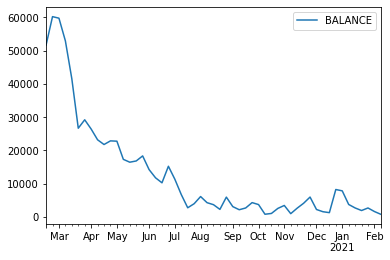

In [1578]:
prophet_last_year_weekly_df.plot()
pyplot.show()

In [1579]:
"""
A continuacion vamos a volver a calcular la prediccion diaria de datos
"""

'\nA continuacion vamos a volver a calcular la prediccion diaria de datos\n'

In [1581]:
prophet_last_year_df = read_csv('balance_last_year.csv', header=0, parse_dates=True, index_col=None, squeeze=False)

In [1582]:
prophet_last_year_df

,DATE,BALANCE
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


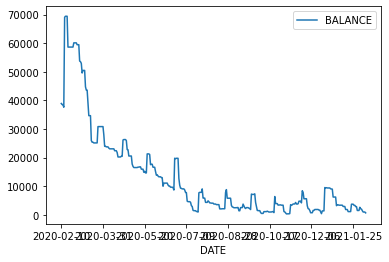

In [1583]:
# gca stands for 'get current axis'
prophet_last_year_df.plot(kind='line', x='DATE', y='BALANCE', ax=pyplot.gca())
pyplot.show()

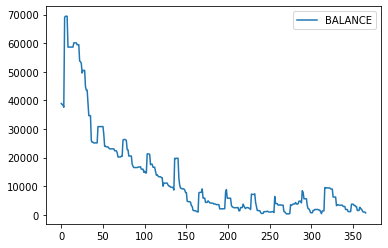

In [1584]:
prophet_last_year_df.plot(kind='line', y='BALANCE', ax=pyplot.gca())
pyplot.show()

In [1585]:
prophet_last_year_df.columns

Index(['DATE', 'BALANCE'], dtype='object')

In [1586]:
# prepare expected column names
prophet_last_year_df.columns = ['ds', 'y']

In [1587]:
prophet_last_year_df['ds']= to_datetime(prophet_last_year_df['ds'])

In [1588]:
prophet_last_year_df

,ds,y
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


In [1589]:
prophet_last_year_df.index[prophet_last_year_df['ds'] == '2020-11-10']

Int64Index([274], dtype='int64')

In [1590]:
prophet_last_year_df.index[prophet_last_year_df['ds'] == '2020-11-11']

Int64Index([275], dtype='int64')

In [1591]:
prophet_train_df = prophet_last_year_df.iloc[:275,:]

In [1592]:
prophet_train_df

,ds,y
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
270,2020-11-06,289.82
271,2020-11-07,326.80
272,2020-11-08,326.80
273,2020-11-09,326.80


In [1593]:
prophet_test_df = prophet_last_year_df.iloc[275:,:]

In [1594]:
prophet_train_df

,ds,y
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
270,2020-11-06,289.82
271,2020-11-07,326.80
272,2020-11-08,326.80
273,2020-11-09,326.80


In [1595]:
# Forecast Car Sales With Prophet

In [1596]:
# Fit Prophet Model

In [1597]:
# define the model
model = Prophet()
# fit the model
model.fit(prophet_train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1598]:
"""
por ultimo vamos a hacer una prediccion con prophet para el dataset entero de 1 año con el modelo entrenado hasta 2020-11-10
y vamos a representar valor real frente a predicho para poder ver de una manera más general lo bien o mal que aproxima prophet
"""

'\npor ultimo vamos a hacer una prediccion con prophet para el dataset entero de 1 año con el modelo entrenado hasta 2020-11-10\ny vamos a representar valor real frente a predicho para poder ver de una manera más general lo bien o mal que aproxima prophet\n'

In [1599]:
prophet_last_year_df = read_csv('balance_last_year.csv', header=0, parse_dates=True, index_col=None, squeeze=False)

In [1600]:
prophet_last_year_df.shape

(366, 2)

In [1601]:
prophet_last_year_df

,DATE,BALANCE
0,2020-02-10,38916.48
1,2020-02-11,38531.84
2,2020-02-12,38531.84
3,2020-02-13,37612.52
4,2020-02-14,69074.92
...,...,...
361,2021-02-05,1407.45
362,2021-02-06,956.59
363,2021-02-07,956.59
364,2021-02-08,956.59


In [1602]:
# prepare expected column names
prophet_last_year_df.columns = ['ds', 'y']

In [1604]:
prophet_last_year_df['ds']= to_datetime(prophet_last_year_df['ds'])

In [1605]:
prophet_last_year_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [1606]:
future_in_out_sample_df=prophet_last_year_df

In [1607]:
future_in_out_sample_df=future_in_out_sample_df.drop(['y'], axis = 1)

In [1608]:
future_in_out_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [1609]:
future_in_out_sample_df

,ds
0,2020-02-10
1,2020-02-11
2,2020-02-12
3,2020-02-13
4,2020-02-14
...,...
361,2021-02-05
362,2021-02-06
363,2021-02-07
364,2021-02-08


In [1610]:
# use the model to make a forecast
forecast_df = model.predict(future_in_out_sample_df)

In [1611]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-10,59622.010534,53789.371691,66711.500163,59622.010534,59622.010534,400.804635,400.804635,400.804635,400.804635,400.804635,400.804635,0.0,0.0,0.0,60022.815170
1,2020-02-11,59028.857258,52284.211560,64577.717029,59028.857258,59028.857258,-478.807875,-478.807875,-478.807875,-478.807875,-478.807875,-478.807875,0.0,0.0,0.0,58550.049383
2,2020-02-12,58435.703982,51433.208983,63941.910431,58435.703982,58435.703982,-791.322256,-791.322256,-791.322256,-791.322256,-791.322256,-791.322256,0.0,0.0,0.0,57644.381726
3,2020-02-13,57842.550707,51262.667658,63270.967955,57842.550707,57842.550707,-778.446146,-778.446146,-778.446146,-778.446146,-778.446146,-778.446146,0.0,0.0,0.0,57064.104561
4,2020-02-14,57249.397431,51551.390243,63706.974392,57249.397431,57249.397431,395.513085,395.513085,395.513085,395.513085,395.513085,395.513085,0.0,0.0,0.0,57644.910516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021-02-05,-3034.907376,-10977.585155,5315.094781,-8489.248752,2314.565850,395.513085,395.513085,395.513085,395.513085,395.513085,395.513085,0.0,0.0,0.0,-2639.394291
362,2021-02-06,-3077.240610,-11230.181126,5120.744347,-8612.795605,2392.829823,521.254414,521.254414,521.254414,521.254414,521.254414,521.254414,0.0,0.0,0.0,-2555.986196
363,2021-02-07,-3119.573844,-11011.605263,5713.004021,-8734.164900,2450.354326,731.004143,731.004143,731.004143,731.004143,731.004143,731.004143,0.0,0.0,0.0,-2388.569702
364,2021-02-08,-3161.907079,-11300.585097,6096.047847,-8903.401355,2498.755137,400.804635,400.804635,400.804635,400.804635,400.804635,400.804635,0.0,0.0,0.0,-2761.102443


In [1612]:
# summarize the forecast
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-10,60022.815170,53789.371691,66711.500163
1,2020-02-11,58550.049383,52284.211560,64577.717029
2,2020-02-12,57644.381726,51433.208983,63941.910431
3,2020-02-13,57064.104561,51262.667658,63270.967955
4,2020-02-14,57644.910516,51551.390243,63706.974392
...,...,...,...,...
361,2021-02-05,-2639.394291,-10977.585155,5315.094781
362,2021-02-06,-2555.986196,-11230.181126,5120.744347
363,2021-02-07,-2388.569702,-11011.605263,5713.004021
364,2021-02-08,-2761.102443,-11300.585097,6096.047847


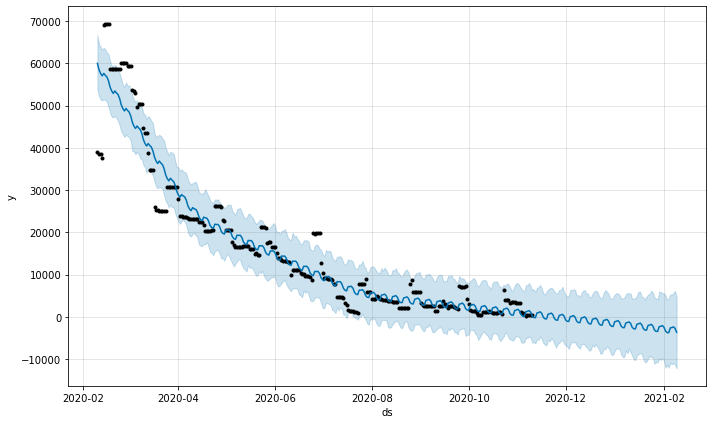

In [1613]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [1654]:
"""
A continuacion vamos a quedarnos con las columnas 'ds' e 'yhat' de forecast_df y vamos a semanalizar ese dataset
"""

"\nA continuacion vamos a quedarnos con las columnas 'ds' e 'yhat' de forecast_df y vamos a semanalizar ese dataset\n"

In [1655]:
prophet_last_year_forecast_df = forecast_df[['ds', 'yhat']]

In [1656]:
prophet_last_year_forecast_df

,ds,yhat
0,2020-02-10,60022.815170
1,2020-02-11,58550.049383
2,2020-02-12,57644.381726
3,2020-02-13,57064.104561
4,2020-02-14,57644.910516
...,...,...
361,2021-02-05,-2639.394291
362,2021-02-06,-2555.986196
363,2021-02-07,-2388.569702
364,2021-02-08,-2761.102443


In [1657]:
# Convert the date strings to date time datatype

In [1658]:
prophet_last_year_forecast_weekly_df=prophet_last_year_forecast_df

In [1659]:
prophet_last_year_forecast_weekly_df.dtypes

ds      datetime64[ns]
yhat           float64
dtype: object

In [1660]:
prophet_last_year_forecast_weekly_df['ds'] = to_datetime(prophet_last_year_forecast_weekly_df['ds'])

<ipython-input-1660-c5308c153a52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_last_year_forecast_weekly_df['ds'] = to_datetime(prophet_last_year_forecast_weekly_df['ds'])


In [1661]:
prophet_last_year_forecast_weekly_df.dtypes

ds      datetime64[ns]
yhat           float64
dtype: object

In [1662]:
prophet_last_year_forecast_weekly_df

,ds,yhat
0,2020-02-10,60022.815170
1,2020-02-11,58550.049383
2,2020-02-12,57644.381726
3,2020-02-13,57064.104561
4,2020-02-14,57644.910516
...,...,...
361,2021-02-05,-2639.394291
362,2021-02-06,-2555.986196
363,2021-02-07,-2388.569702
364,2021-02-08,-2761.102443


In [1663]:
# Using a lambda function on apply.() to separate the year, month, day components

In [1664]:
prophet_last_year_forecast_weekly_df['ds'].apply(lambda prophet_last_year_forecast_weekly_df: \
                                                 datetime(year=prophet_last_year_forecast_weekly_df.year, \
                                                          month=prophet_last_year_forecast_weekly_df.month, \
                                                          day=prophet_last_year_forecast_weekly_df.day))

0     2020-02-10
1     2020-02-11
2     2020-02-12
3     2020-02-13
4     2020-02-14
         ...    
361   2021-02-05
362   2021-02-06
363   2021-02-07
364   2021-02-08
365   2021-02-09
Name: ds, Length: 366, dtype: datetime64[ns]

In [1665]:
prophet_last_year_forecast_weekly_df

,ds,yhat
0,2020-02-10,60022.815170
1,2020-02-11,58550.049383
2,2020-02-12,57644.381726
3,2020-02-13,57064.104561
4,2020-02-14,57644.910516
...,...,...
361,2021-02-05,-2639.394291
362,2021-02-06,-2555.986196
363,2021-02-07,-2388.569702
364,2021-02-08,-2761.102443


In [1666]:
# Set the date as the index

In [1667]:
# convert the column (if it's a string) to datetime type
datetime_series = to_datetime(prophet_last_year_forecast_weekly_df['ds'])

In [1668]:
datetime_series

0     2020-02-10
1     2020-02-11
2     2020-02-12
3     2020-02-13
4     2020-02-14
         ...    
361   2021-02-05
362   2021-02-06
363   2021-02-07
364   2021-02-08
365   2021-02-09
Name: ds, Length: 366, dtype: datetime64[ns]

In [1669]:
datetime_series.dtypes

dtype('<M8[ns]')

In [1670]:
type(datetime_series)

pandas.core.series.Series

In [1671]:
# create datetime index passing the datetime series
datetime_index = DatetimeIndex(datetime_series.values)

In [1672]:
datetime_index

DatetimeIndex(['2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19',
               ...
               '2021-01-31', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07',
               '2021-02-08', '2021-02-09'],
              dtype='datetime64[ns]', length=366, freq=None)

In [1676]:
prophet_last_year_forecast_weekly_df=prophet_last_year_forecast_weekly_df.set_index(datetime_index)

In [1677]:
prophet_last_year_forecast_weekly_df

,ds,yhat
2020-02-10,2020-02-10,60022.815170
2020-02-11,2020-02-11,58550.049383
2020-02-12,2020-02-12,57644.381726
2020-02-13,2020-02-13,57064.104561
2020-02-14,2020-02-14,57644.910516
...,...,...
2021-02-05,2021-02-05,-2639.394291
2021-02-06,2021-02-06,-2555.986196
2021-02-07,2021-02-07,-2388.569702
2021-02-08,2021-02-08,-2761.102443


In [1678]:
prophet_last_year_forecast_weekly_df.dtypes

ds      datetime64[ns]
yhat           float64
dtype: object

In [1679]:
# we don't need the column DATE anymore
prophet_last_year_forecast_weekly_df.drop('ds', axis=1, inplace=True)

In [1680]:
prophet_last_year_forecast_weekly_df

,yhat
2020-02-10,60022.815170
2020-02-11,58550.049383
2020-02-12,57644.381726
2020-02-13,57064.104561
2020-02-14,57644.910516
...,...
2021-02-05,-2639.394291
2021-02-06,-2555.986196
2021-02-07,-2388.569702
2021-02-08,-2761.102443


In [1681]:
prophet_last_year_forecast_weekly_df.index

DatetimeIndex(['2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19',
               ...
               '2021-01-31', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07',
               '2021-02-08', '2021-02-09'],
              dtype='datetime64[ns]', length=366, freq=None)

In [1682]:
# Using resample() method to aggregate by weeks and add mean() to take the average

In [1683]:
prophet_last_year_forecast_weekly_ser = prophet_last_year_forecast_weekly_df['yhat'].resample('W').mean()

In [1684]:
prophet_last_year_forecast_weekly_ser

2020-02-16    57842.550707
2020-02-23    53690.477773
2020-03-01    49538.404831
2020-03-08    45386.331897
2020-03-15    41234.258973
2020-03-22    37082.186073
2020-03-29    32987.894977
2020-04-05    29149.617958
2020-04-12    25924.571477
2020-04-19    23516.216983
2020-04-26    21725.836369
2020-05-03    20382.975153
2020-05-10    19118.059633
2020-05-17    17864.324076
2020-05-24    16622.594340
2020-05-31    15394.918593
2020-06-07    14179.453255
2020-06-14    12964.037265
2020-06-21    11748.819132
2020-06-28    10533.775717
2020-07-05     9318.794989
2020-07-12     8107.675691
2020-07-19     6932.621836
2020-07-26     6029.072752
2020-08-02     5329.854075
2020-08-09     4795.467751
2020-08-16     4421.717069
2020-08-23     4119.417387
2020-08-30     3823.080002
2020-09-06     3526.745166
2020-09-13     3230.411332
2020-09-20     2934.078659
2020-09-27     2637.746017
2020-10-04     2341.413377
2020-10-11     2045.080737
2020-10-18     1748.748097
2020-10-25     1452.415457
2

In [1685]:
"""
lo que acabamos de hacer es calcular el saldo medio de cada semana y asginarselo a la fecha del ultimo dia de la semana que es
el domingo.
"""

'\nlo que acabamos de hacer es calcular el saldo medio de cada semana y asginarselo a la fecha del ultimo dia de la semana que es\nel domingo.\n'

In [1686]:
type(prophet_last_year_forecast_weekly_ser)

pandas.core.series.Series

In [1688]:
prophet_last_year_forecast_weekly_df=DataFrame(prophet_last_year_forecast_weekly_ser)

In [1690]:
prophet_last_year_forecast_weekly_ser

,yhat
2020-02-16,57842.550707
2020-02-23,53690.477773
2020-03-01,49538.404831
2020-03-08,45386.331897
2020-03-15,41234.258973
2020-03-22,37082.186073
2020-03-29,32987.894977
2020-04-05,29149.617958
2020-04-12,25924.571477
2020-04-19,23516.216983


In [1691]:
prophet_last_year_forecast_weekly_ser.shape

(53, 1)

In [1692]:
"""
Vemos q tenemos 52 semanas completas y hasta el martes 9 de febrero de la semana 53
"""

'\nVemos q tenemos 52 semanas completas y hasta el martes 9 de febrero de la semana 53\n'

In [1694]:
prophet_last_year_forecast_weekly_ser.dtypes

yhat    float64
dtype: object

In [1695]:
"""
Vamos a guardarnos este dataframe en un csv
"""

'\nVamos a guardarnos este dataframe en un csv\n'

In [1696]:
prophet_last_year_forecast_weekly_ser.to_csv(path_or_buf='prophet_last_year_forecast_weekly.csv')

In [1698]:
del(prophet_last_year_forecast_weekly_df)
del(prophet_last_year_forecast_weekly_ser)

In [1815]:
"""
A continuacion vamos a representar las graficas y calcular los errores de los datos reales y predichos semanalizados despues
de haber sido calculados mediante datos diarios
"""

'\nA continuacion vamos a representar las graficas y calcular los errores de los datos reales y predichos semanalizados despues\nde haber sido calculados mediante datos diarios\n'

In [1816]:
prophet_last_year_weekly_df = read_csv('prophet_last_year_weekly.csv', header=0, parse_dates=[0], index_col=0, squeeze=False)

In [1817]:
prophet_last_year_weekly_df.head()

,BALANCE
2020-02-16,51648.717143
2020-02-23,60192.338571
2020-03-01,59730.255714
2020-03-08,52900.910000
2020-03-15,41518.074286


In [1818]:
prophet_last_year_weekly_df.tail()

,BALANCE
2021-01-17,2716.428571
2021-01-24,1943.791429
2021-01-31,2710.012857
2021-02-07,1639.331429
2021-02-14,803.590000


In [1819]:
prophet_last_year_forecast_weekly_df = read_csv('prophet_last_year_forecast_weekly.csv', header=0, parse_dates=[0], \
                                                index_col=0, squeeze=False)

In [1820]:
prophet_last_year_forecast_weekly_df.head()

,yhat
2020-02-16,57842.550707
2020-02-23,53690.477773
2020-03-01,49538.404831
2020-03-08,45386.331897
2020-03-15,41234.258973


In [1821]:
prophet_last_year_forecast_weekly_df.tail()

,yhat
2021-01-17,-2103.576222
2021-01-24,-2399.908862
2021-01-31,-2696.241502
2021-02-07,-2992.574141
2021-02-14,-3222.075316


In [1822]:
prophet_last_year_weekly_df.shape, prophet_last_year_forecast_weekly_df.shape

((53, 1), (53, 1))

In [1823]:
"""
Hacemos una primera representacion de los datos del ultimos año semanalizados reales y predichos.
Recordemos que el training va desde el 2020-02-16 hasta el 2020-11-15,
y el test va desde el 2020-11-22 hasta el 2021-02-14.
"""

'\nHacemos una primera representacion de los datos del ultimos año semanalizados reales y predichos.\nRecordemos que el training va desde el 2020-02-16 hasta el 2020-11-15,\ny el test va desde el 2020-11-22 hasta el 2021-02-14.\n'

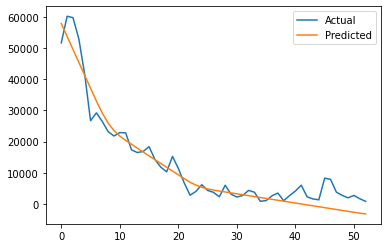

In [1824]:
y_true = prophet_last_year_weekly_df['BALANCE'][:].values
y_pred = prophet_last_year_forecast_weekly_df['yhat'].values

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [1825]:
"""
La prediccion comienza en la observacion 40
"""

'\nLa prediccion comienza en la observacion 40\n'

In [1826]:
prophet_last_year_weekly_df = prophet_last_year_weekly_df.reset_index()

In [1827]:
prophet_last_year_weekly_df.head()

,index,BALANCE
0,2020-02-16,51648.717143
1,2020-02-23,60192.338571
2,2020-03-01,59730.255714
3,2020-03-08,52900.910000
4,2020-03-15,41518.074286


In [1828]:
prophet_last_year_weekly_df.columns = ['DATE', 'BALANCE']

In [1829]:
prophet_last_year_weekly_df.head()

,DATE,BALANCE
0,2020-02-16,51648.717143
1,2020-02-23,60192.338571
2,2020-03-01,59730.255714
3,2020-03-08,52900.910000
4,2020-03-15,41518.074286


In [1830]:
prophet_last_year_weekly_df.tail()

,DATE,BALANCE
48,2021-01-17,2716.428571
49,2021-01-24,1943.791429
50,2021-01-31,2710.012857
51,2021-02-07,1639.331429
52,2021-02-14,803.590000


In [1831]:
prophet_last_year_forecast_weekly_df = prophet_last_year_forecast_weekly_df.reset_index()

In [1832]:
prophet_last_year_forecast_weekly_df.head()

,index,yhat
0,2020-02-16,57842.550707
1,2020-02-23,53690.477773
2,2020-03-01,49538.404831
3,2020-03-08,45386.331897
4,2020-03-15,41234.258973


In [1833]:
prophet_last_year_forecast_weekly_df.columns = ['DATE', 'yhat']

In [1834]:
prophet_last_year_forecast_weekly_df.head()

,DATE,yhat
0,2020-02-16,57842.550707
1,2020-02-23,53690.477773
2,2020-03-01,49538.404831
3,2020-03-08,45386.331897
4,2020-03-15,41234.258973


In [1835]:
# A continuacion vamos a obtener DOS dataframes de training desde 2020-02-16 hasta 2020-11-15.
# y DOS dataframes de test desde 2020-11-22 hasta 2020-11-11 hasta el 2021-02-14

In [1836]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['DATE'] == '2020-02-16']

Int64Index([0], dtype='int64')

In [1837]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['DATE'] == '2020-11-15']

Int64Index([39], dtype='int64')

In [1838]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['DATE'] == '2020-11-22']

Int64Index([40], dtype='int64')

In [1839]:
prophet_last_year_weekly_df.index[prophet_last_year_weekly_df['DATE'] == '2021-02-14']

Int64Index([52], dtype='int64')

In [1840]:
train_prophet_last_year_weekly_df = prophet_last_year_weekly_df.iloc[:40,:]

In [1841]:
train_prophet_last_year_weekly_df.shape

(40, 2)

In [1842]:
train_prophet_last_year_weekly_df.head()

,DATE,BALANCE
0,2020-02-16,51648.717143
1,2020-02-23,60192.338571
2,2020-03-01,59730.255714
3,2020-03-08,52900.910000
4,2020-03-15,41518.074286


In [1843]:
train_prophet_last_year_weekly_df.tail()

,DATE,BALANCE
35,2020-10-18,1061.310000
36,2020-10-25,2581.747143
37,2020-11-01,3464.318571
38,2020-11-08,1000.300000
39,2020-11-15,2653.077143


In [1844]:
test_prophet_last_year_weekly_df = prophet_last_year_weekly_df.iloc[40:,:]

In [1845]:
test_prophet_last_year_weekly_df.shape

(13, 2)

In [1846]:
test_prophet_last_year_weekly_df.head()

,DATE,BALANCE
40,2020-11-22,4123.331429
41,2020-11-29,5989.834286
42,2020-12-06,2253.970000
43,2020-12-13,1583.811429
44,2020-12-20,1306.717143


In [1847]:
test_prophet_last_year_weekly_df.tail()

,DATE,BALANCE
48,2021-01-17,2716.428571
49,2021-01-24,1943.791429
50,2021-01-31,2710.012857
51,2021-02-07,1639.331429
52,2021-02-14,803.590000


In [1848]:
train_prophet_last_year_forecast_weekly_df = prophet_last_year_forecast_weekly_df.iloc[:40,:]

In [1849]:
test_prophet_last_year_forecast_weekly_df = prophet_last_year_forecast_weekly_df.iloc[40:,:]

In [1850]:
train_prophet_last_year_forecast_weekly_df.shape, test_prophet_last_year_forecast_weekly_df.shape

((40, 2), (13, 2))

In [1851]:
train_prophet_last_year_forecast_weekly_df.head()

,DATE,yhat
0,2020-02-16,57842.550707
1,2020-02-23,53690.477773
2,2020-03-01,49538.404831
3,2020-03-08,45386.331897
4,2020-03-15,41234.258973


In [1852]:
train_prophet_last_year_forecast_weekly_df.tail()

,DATE,yhat
35,2020-10-18,1748.748097
36,2020-10-25,1452.415457
37,2020-11-01,1156.082817
38,2020-11-08,859.750178
39,2020-11-15,563.417538


In [1853]:
test_prophet_last_year_forecast_weekly_df.head()

,DATE,yhat
40,2020-11-22,267.084898
41,2020-11-29,-29.247742
42,2020-12-06,-325.580382
43,2020-12-13,-621.913022
44,2020-12-20,-918.245662


In [1854]:
test_prophet_last_year_forecast_weekly_df.tail()

,DATE,yhat
48,2021-01-17,-2103.576222
49,2021-01-24,-2399.908862
50,2021-01-31,-2696.241502
51,2021-02-07,-2992.574141
52,2021-02-14,-3222.075316


In [1855]:
# A continuacion vamos a calcular el error del modelo del Persistence Baseline sobre prophet_test_df

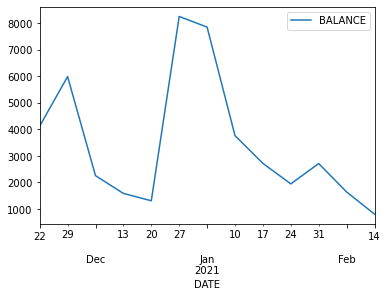

In [1856]:
# gca stands for 'get current axis'
test_prophet_last_year_weekly_df.plot(kind='line', x='DATE', y='BALANCE', ax=pyplot.gca())
pyplot.show()

Test MAE: 4963.123
Test MSE: 29616566.502
Test RMSE: 5442.110


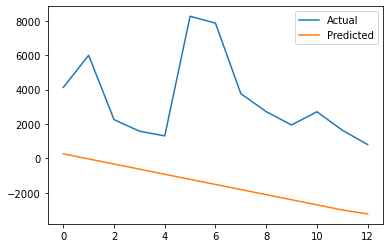

In [1857]:
# calculate MAE between expected and predicted values for the test period
y_true = test_prophet_last_year_weekly_df['BALANCE'][:].values
y_pred = test_prophet_last_year_forecast_weekly_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Test MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Test MSE: %.3f' % test_score)
print('Test RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [1858]:
"""
DIARIO
prophet - desde 2020-11-11 al 2021-02-09 con prediccion out-sample sobre datos de test q NO ha visto
training desde 2020-02-10 hasta 2020-11-10 
Test MAE: 4908.521
Test RMSE: 5589.492
Test MSE: 31242425.352

SEMANALIZADO
prophet - desde 2020-11-22 al 2021-02-14 con prediccion out-sample sobre datos de test q NO ha visto
training desde 2020-02-16 hasta 2020-11-15 
Test MAE: 20618.078
Test RMSE: 21086.717
Test MSE: 444649649.971
CONCLUSION: vemos que semanalizado sobre datos vistos hay un error MUCHO MAYOR que al predecir sobre dataset diario
(Train MAE: 4908.521 DIARIO): esto se debe a q tiene tan pocos datos de training q hace la prediccion con una recta

PREDICCION DIARIA PERO CALCULO ERRORES Y PRESENTACION GRAFICAS SEMANALIZADA
prophet - desde 2020-11-22 al 2021-02-14 con prediccion out-sample sobre datos de test q NO ha visto
training desde 2020-02-16 hasta 2020-11-15 
Test MAE: 4963.123
Test RMSE: 5442.110
Test MSE: 329616566.502
CONCLUSION: Vemos que estos errores son de aproximadamente el mismo orden que cuando hacemos los calculos con datos diarios 
de predicciones diarias. Eso quiere decir que estamos haciendo las cosas bien.
"""

'\nDIARIO\nprophet - desde 2020-11-11 al 2021-02-09 con prediccion out-sample sobre datos de test q NO ha visto\ntraining desde 2020-02-10 hasta 2020-11-10 \nTest MAE: 4908.521\nTest RMSE: 5589.492\nTest MSE: 31242425.352\n\nSEMANALIZADO\nprophet - desde 2020-11-22 al 2021-02-14 con prediccion out-sample sobre datos de test q NO ha visto\ntraining desde 2020-02-16 hasta 2020-11-15 \nTest MAE: 20618.078\nTest RMSE: 21086.717\nTest MSE: 444649649.971\nCONCLUSION: vemos que semanalizado sobre datos vistos hay un error MUCHO MAYOR que al predecir sobre dataset diario\n(Train MAE: 4908.521 DIARIO): esto se debe a q tiene tan pocos datos de training q hace la prediccion con una recta\n\nPREDICCION DIARIA PERO CALCULO ERRORES Y PRESENTACION GRAFICAS SEMANALIZADA\nprophet - desde 2020-11-22 al 2021-02-14 con prediccion out-sample sobre datos de test q NO ha visto\ntraining desde 2020-02-16 hasta 2020-11-15 \nTest MAE: 4963.123\nTest RMSE: 5442.110\nTest MSE: 329616566.502\nCONCLUSION: Vemos qu

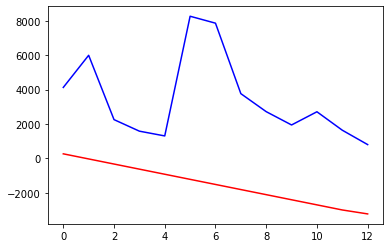

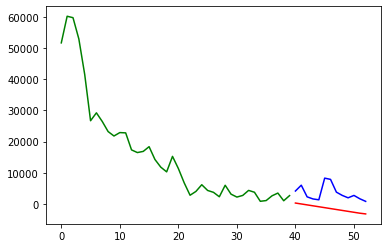

In [1859]:
# plot predictions vs expected
pyplot.plot(y_true, color='blue') # y en test - en azul
pyplot.plot(y_pred, color='red') # y en predictions - en rojo
pyplot.show()

train_y = train_prophet_last_year_weekly_df['BALANCE'][:].values

# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in y_true], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in y_pred], color='red') # y en predictions - en rojo
pyplot.show()

In [1860]:
"""
Vemos que pintando la predccion frente al dato de test en el conjunto total de los datos podemos decir que la prediccion tiene
un valor aceptable.
"""

'\nVemos que pintando la predccion frente al dato de test en el conjunto total de los datos podemos decir que la prediccion tiene\nun valor aceptable.\n'

Total MAE: 3054.185
Total MSE: 16402329.460
Total RMSE: 4049.979


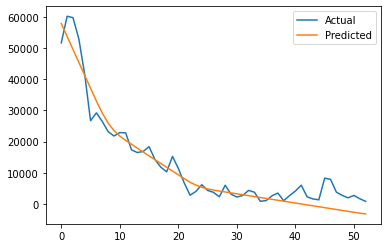

In [1861]:
# calculate MAE between expected and predicted values for the train and test periods altogether
y_true = prophet_last_year_weekly_df['BALANCE'][:].values
y_pred = prophet_last_year_forecast_weekly_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Total MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Total MSE: %.3f' % test_score)
print('Total RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [1862]:
"""
las predicciones empiezan a partir de la observacion 40.
Podemos considerar que la series predicha sigue su tedencia desde la observacion 39 con lo que podemos aceptar las prediciones
en Test a partir de la semana 40

DIARIO
prophet - desde 2020-02-10 al 2021-02-09 con prediccion in-out-sample sobre de training q SI ha visto y datos de test q NO ha
visto
training desde 2020-02-10 hasta 2020-11-10 
Test MAE: 3585.614
Test MSE: 5004.183
Test RMSE: 25049141.183

PREDICCION DIARIA PERO CALCULO ERRORES Y PRESENTACION GRAFICAS SEMANALIZADA
prophet - desde 2020-02-16 al 2021-02-14 con prediccion in-out-sample sobre de training q SI ha visto y datos de test q NO ha
visto
training desde 2020-02-16 hasta 2020-11-15
Total MAE: 3054.185
Total RMSE: 4049.979
Total MSE: 16402329.460
CONCLUSION: vemos que al calcular los errores de la prediccion diaria semanalizada estos se reducen un poco pero siguen estando
en el mismo orden. Esto es un indicativo de que estamos haciendo las cosas bien.
"""

'\nlas predicciones empiezan a partir de la observacion 40.\nPodemos considerar que la series predicha sigue su tedencia desde la observacion 39 con lo que podemos aceptar las prediciones\nen Test a partir de la semana 40\n\nDIARIO\nprophet - desde 2020-02-10 al 2021-02-09 con prediccion in-out-sample sobre de training q SI ha visto y datos de test q NO ha\nvisto\ntraining desde 2020-02-10 hasta 2020-11-10 \nTest MAE: 3585.614\nTest MSE: 5004.183\nTest RMSE: 25049141.183\n\nPREDICCION DIARIA PERO CALCULO ERRORES Y PRESENTACION GRAFICAS SEMANALIZADA\nprophet - desde 2020-02-16 al 2021-02-14 con prediccion in-out-sample sobre de training q SI ha visto y datos de test q NO ha\nvisto\ntraining desde 2020-02-16 hasta 2020-11-15\nTotal MAE: 3054.185\nTotal RMSE: 4049.979\nTotal MSE: 16402329.460\nCONCLUSION: vemos que al calcular los errores de la prediccion diaria semanalizada estos se reducen un poco pero siguen estando\nen el mismo orden. Esto es un indicativo de que estamos haciendo las 

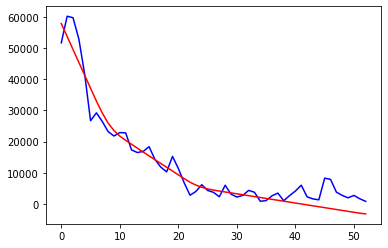

In [1867]:
y_true = prophet_last_year_weekly_df['BALANCE'][:].values
y_pred = prophet_last_year_forecast_weekly_df['yhat'].values

# plot predictions vs expected
pyplot.plot(y_true, color='blue') # y en test - en azul
pyplot.plot(y_pred, color='red') # y en predictions - en rojo
pyplot.show()

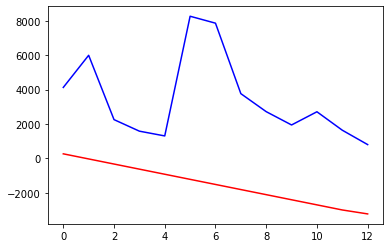

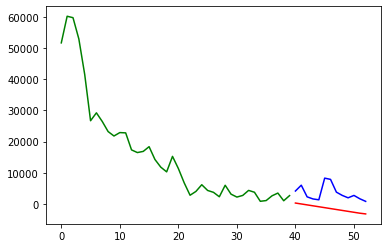

In [1868]:
y_true = test_prophet_last_year_weekly_df['BALANCE'][:].values
y_pred = test_prophet_last_year_forecast_weekly_df['yhat'].values
train_y = train_prophet_last_year_weekly_df['BALANCE'][:].values

# plot predictions vs expected
pyplot.plot(y_true, color='blue') # y en test - en azul
pyplot.plot(y_pred, color='red') # y en predictions - en rojo
pyplot.show()

# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in y_true], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in y_pred], color='red') # y en predictions - en rojo
pyplot.show()